# Import Libary

In [99]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind
import re
import matplotlib.patches as patches
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_row', 100)

# Introduction

## Latar Belakang

<div style="text-align: center;">
    <img src="1200px-AmazonWebservices_Logo_svg.png" alt="Description" width="1200" height="400">
</div>


Amazon Web Services (AWS) adalah sebuah platform komputasi cloud yang disediakan oleh Amazon, yang menawarkan berbagai layanan IT sesuai kebutuhan, mulai dari penyimpanan data, pemrosesan, analitik, keamanan, hingga machine learning. AWS adalah layanan cloud yang paling banyak digunakan di dunia dengan lebih dari 200 layanan cloud penuh fitur yang tersedia dari pusat data di seluruh dunia1. Dengan menggunakan AWS, perusahaan dapat menurunkan biaya infrastruktur IT, meningkatkan fleksibilitas dan skalabilitas, serta mempercepat inovasi. AWS mendukung berbagai industri, mulai dari pemula hingga perusahaan besar, dengan keandalan dan keamanan yang tinggi, serta komunitas yang luas.

Dataset ini berisi data penjualan dari berbagai layanan SaaS yang di-hosting menggunakan AWS. Layanan-layanan SaaS ini memanfaatkan infrastruktur AWS untuk menyediakan aplikasi berbasis cloud kepada pelanggan mereka, memungkinkan akses yang mudah dan fleksibel dari berbagai perangkat yang terhubung internet. Data ini mencakup informasi terkait berbagai aspek operasi SaaS, seperti jumlah pelanggan, pendapatan, dan metrik kinerja lainnya.

Dengan menggunakan AWS, penyedia layanan SaaS dapat mengurangi beban operasional pada infrastruktur mereka sendiri, meningkatkan efisiensi, dan fokus untuk memperbaiki layanan mereka. AWS memberikan manfaat seperti skalabilitas otomatis, manajemen penyimpanan data, dan keamanan tingkat tinggi, yang sangat penting bagi penyedia SaaS dalam melayani kebutuhan pelanggan mereka secara optimal.

Secara keseluruhan, dataset ini memberikan wawasan tentang bagaimana berbagai layanan SaaS yang memanfaatkan AWS beroperasi, berkinerja, dan berkembang seiring waktu. Hal ini memungkinkan analisis yang lebih mendalam tentang tren penggunaan dan peluang optimalisasi dalam layanan SaaS yang difasilitasi oleh AWS

## Rumusan Masalah

Stakeholder perusahaan ingin memahami dampak pandemi COVID-19 terhadap profitabilitas (Profit) dengan membandingkan profit perusahaan selama masa pandemi (2020–2021) dan pasca-pandemi (2022–2023). Fokusnya adalah untuk mengetahui apakah terdapat perbedaan signifikan dalam pola pembelian pelanggan dan profitabilitas antara kedua periode tersebut.

Berdasarkan Keinginan stakeholder dibuat rumusan masalah sebagai berikut :

1. Apakah terdapat perbedaan profitabilitas (Profit) antara tahun pandemi COVID-19 (2020–2021) dan pasca-pandemi (2022–2023)?

1. Strategi apa yang sebaiknya dikembangkan perusahaan untuk di masa yang akan datang agar perusahaan bisa menyusun strategi untuk menghadapi situasi serupa di masa depan?

1. Dari setiap Region, Industry, Segment dan Product apa saja yang memengaruhi perbedaan profitabilitas antara kedua periode tersebut?

## Tujuan

Dengan mengetahui perbedaan ini, stakeholder berharap dapat mengidentifikasi faktor-faktor yang memengaruhi performa perusahaan selama pandemi dan bagaimana perubahan tersebut terjadi setelah pandemi. Analisis ini akan menjadi dasar dalam menyusun strategi untuk menghadapi situasi serupa di masa depan.

# Read dataset

In [100]:
df = pd.read_csv("SaaS-Sales.csv")
df.head()

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


# Data cleaning

## Handling Character

In [101]:
# Fungsi untuk memeriksa karakter spesial dan mencetak karakter yang ditemukan
def check_special_characters(column):
    special_characters = re.compile(r'[^a-zA-Z0-9\s-]')
    return df[column].apply(lambda x: special_characters.findall(str(x)))

# Memeriksa setiap kolom
special_char_columns = {col: check_special_characters(col) for col in df.columns}

# Menampilkan hasil
for col, special_chars in special_char_columns.items():
    if any(special_chars):
        print(f"Kolom: {col} mengandung karakter spesial: {set([char for sublist in special_chars for char in sublist])}")
    else:
        print(f"Kolom: {col} tidak mengandung karakter spesial.")


Kolom: Row ID tidak mengandung karakter spesial.
Kolom: Order ID tidak mengandung karakter spesial.
Kolom: Order Date mengandung karakter spesial: {'/'}
Kolom: Date Key tidak mengandung karakter spesial.
Kolom: Contact Name tidak mengandung karakter spesial.
Kolom: Country tidak mengandung karakter spesial.
Kolom: City mengandung karakter spesial: {'ö', 'á', 'í', 'é', 'ã', 'ó'}
Kolom: Region tidak mengandung karakter spesial.
Kolom: Subregion tidak mengandung karakter spesial.
Kolom: Customer mengandung karakter spesial: {'.', '&'}
Kolom: Customer ID tidak mengandung karakter spesial.
Kolom: Industry tidak mengandung karakter spesial.
Kolom: Segment tidak mengandung karakter spesial.
Kolom: Product tidak mengandung karakter spesial.
Kolom: License tidak mengandung karakter spesial.
Kolom: Sales mengandung karakter spesial: {'.'}
Kolom: Quantity tidak mengandung karakter spesial.
Kolom: Discount mengandung karakter spesial: {'.'}
Kolom: Profit mengandung karakter spesial: {'.'}


Di dalam dataset tidak terdapat character

In [102]:
# Fungsi untuk memeriksa kesesuaian antara Order Date dan Date Key
def check_date_key(order_date, date_key):
    # Mengubah Order Date menjadi format YYYYMMDD
    formatted_date = pd.to_datetime(order_date).strftime('%Y%m%d')
    return formatted_date == str(date_key)

# Memeriksa setiap baris dalam dataset
df['Date_Match'] = df.apply(lambda row: check_date_key(row['Order Date'], row['Date Key']), axis=1)

# Menampilkan hasil
mismatched_rows = df[~df['Date_Match']]
if not mismatched_rows.empty:
    print("Baris yang tidak sesuai:")
    print(mismatched_rows)
else:
    print("Semua baris sesuai antara Order Date dan Date Key.")

# Menghapus kolom Date_Match 
df.drop(columns=['Date_Match'], inplace=True)

Semua baris sesuai antara Order Date dan Date Key.


## Handling Missing Value & Duplicate Data

In [103]:
# Mengecek apakah ada nilai null
def cek_null(df):
    col_na = df.isnull().sum().sort_values(ascending=True)
    percent = (col_na / len(df))*100
    
    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    
    if (missing_data[missing_data['Total'] > 0].shape[0] == 0):
        print("Tidak ditemukan missing value pada dataset")
        
    else:
        print(missing_data[missing_data['Total'] > 0])

In [104]:
cek_null(df)

Tidak ditemukan missing value pada dataset


In [105]:
df.duplicated().sum()

0

Dataset ini tidak mengandung nilai yang hilang (missing value) maupun duplikat data

## Handling Outlier

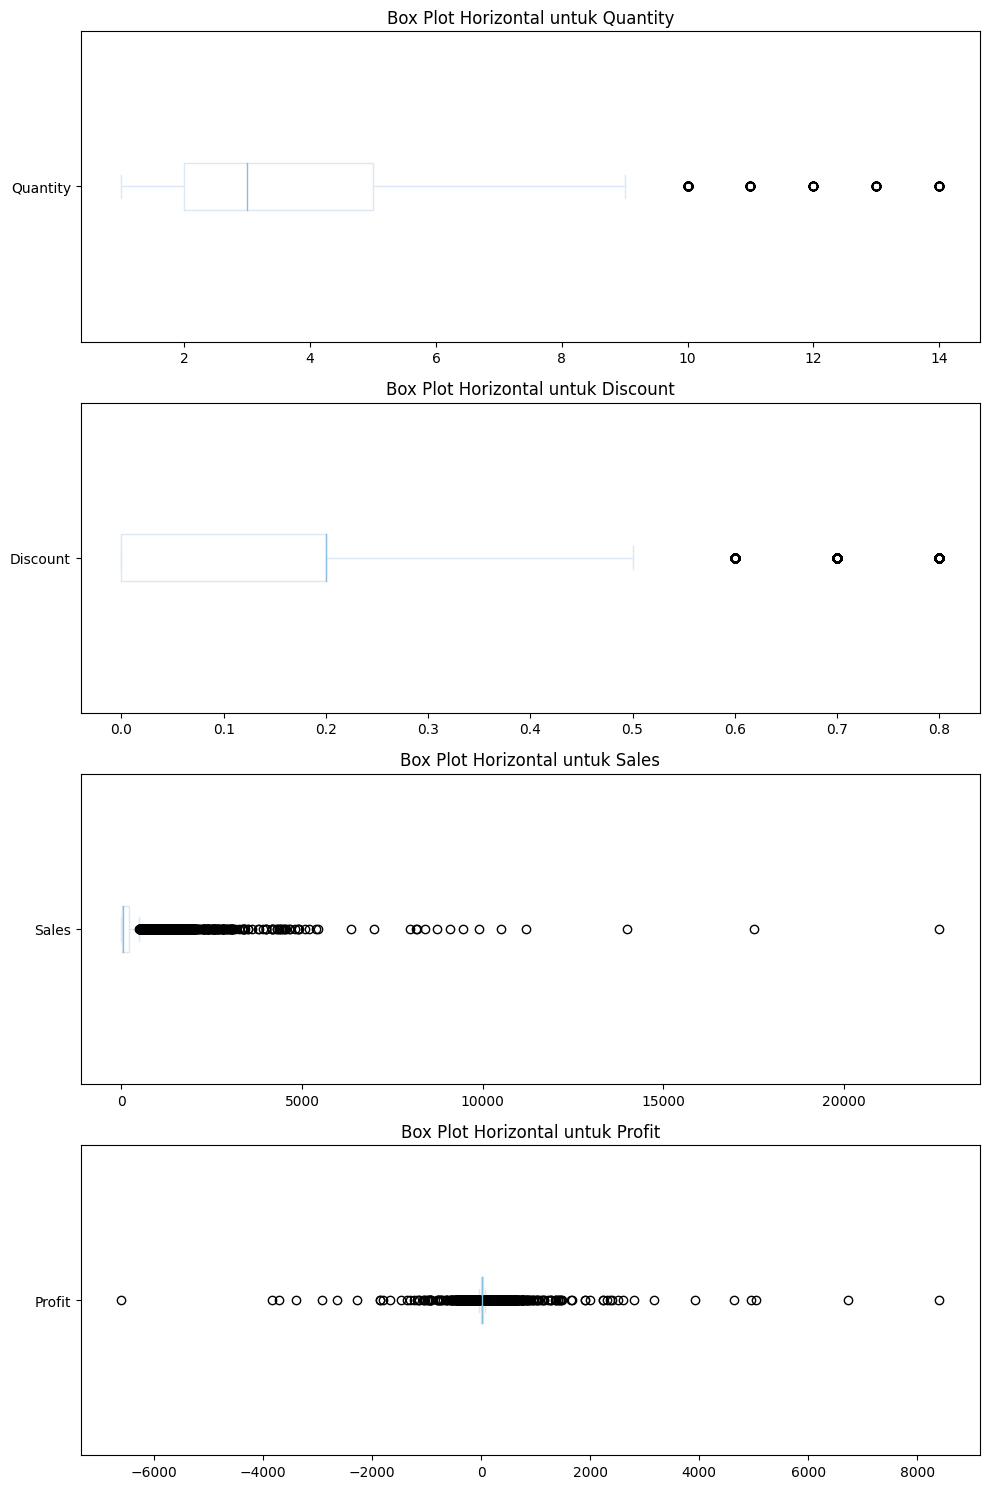

In [106]:
# Memilih kolom yang diinginkan
df_num = df[['Quantity', 'Discount', 'Sales', 'Profit']]

# Membuat 4 subplot berbeda secara vertikal
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 15))

# Box plot horizontal untuk Quantity
df_num['Quantity'].plot(kind='box', ax=axes[0], title='Box Plot Horizontal untuk Quantity', vert=False)

# Box plot horizontal untuk Discount
df_num['Discount'].plot(kind='box', ax=axes[1], title='Box Plot Horizontal untuk Discount', vert=False)

# Box plot horizontal untuk Sales
df_num['Sales'].plot(kind='box', ax=axes[2], title='Box Plot Horizontal untuk Sales', vert=False)

# Box plot horizontal untuk Profit
df_num['Profit'].plot(kind='box', ax=axes[3], title='Box Plot Horizontal untuk Profit', vert=False)

# Menampilkan plot
plt.tight_layout()
plt.show()


### Isnight Boxplot

Untuk kolom **Quantity** dan **Discount**, outlier yang ada masih masuk akal dan dapat diterima dalam konteks analisis keseluruhan. Outlier pada kolom ini tidak menunjukkan anomali yang signifikan dan dapat dianggap sebagai variasi normal dalam data (tidak ada data yang minus dan masih di rentang nilai yang masuk akal).

Untuk kolom **Sales** dan **Profit**, outlier perlu diperhatikan lebih dalam dan akan dilanjutkan dibawah ini.

## Contextual Outlier Sales & Profit

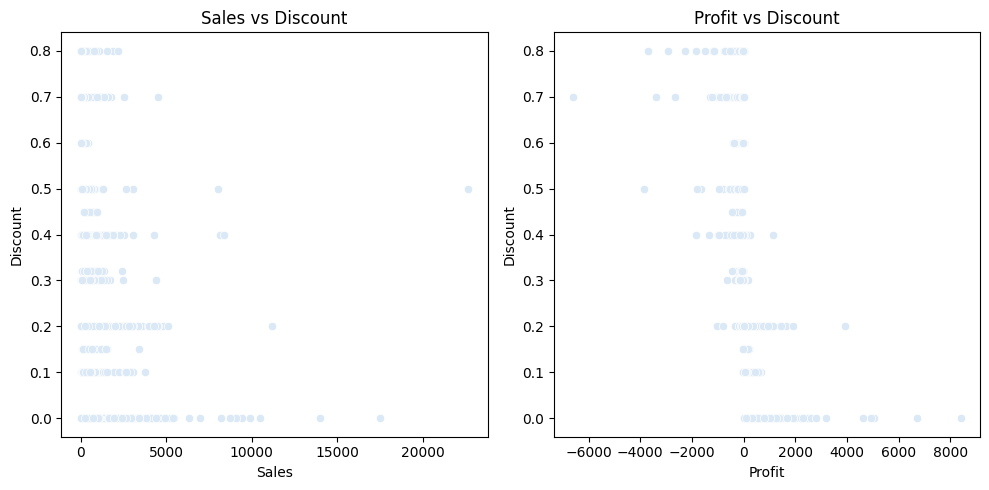

In [107]:
# Membuat subplot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Scatter plot untuk Sales vs Discount
sns.scatterplot(x=df['Sales'], y=df['Discount'], ax=axes[0])
axes[0].set_title('Sales vs Discount')

# Scatter plot untuk Profit vs Discount
sns.scatterplot(x=df['Profit'], y=df['Discount'], ax=axes[1])
axes[1].set_title('Profit vs Discount')

# Menampilkan plot
plt.tight_layout()
plt.show()


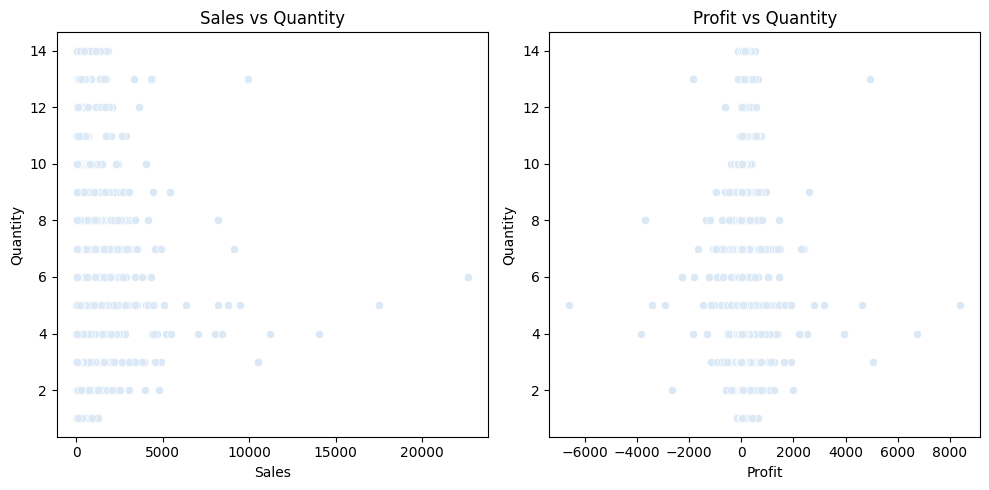

In [108]:
# Membuat subplot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Scatter plot untuk Sales vs Profit
sns.scatterplot(x=df['Sales'], y=df['Quantity'], ax=axes[0])
axes[0].set_title('Sales vs Quantity')

# Scatter plot untuk Profit vs Profit
sns.scatterplot(x=df['Profit'], y=df['Quantity'], ax=axes[1])
axes[1].set_title('Profit vs Quantity')

# Menampilkan plot
plt.tight_layout()
plt.show()

<Axes: xlabel='Sales', ylabel='Profit'>

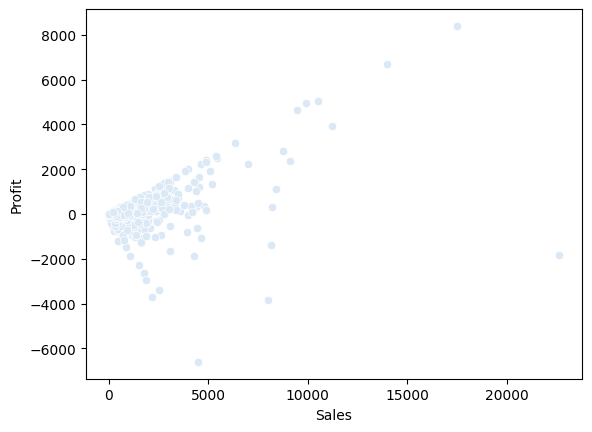

In [109]:
sns.scatterplot(x=df['Sales'],y=df["Profit"])

In [110]:
# Menyaring data dengan penjualan di atas 20.000
filtered_data = df[df['Sales'] > 20000]

# Menampilkan data yang telah difilter
display(filtered_data)

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
2697,2698,EMEA-2020-145317,3/18/2020,20200318,Diane Murray,Germany,Berlin,EMEA,EU-WEST,Anthem,1029,Healthcare,Enterprise,Big Ol Database,SGJPOTVE6H,22638.48,6,0.5,-1811.0784



Untuk kolom **Sales** dan **Profit**, saya akan membiarkan outlier tetap ada, karena saya ingin menganalisis tentang profit dan sales dan melihat apakah ada pola atau tidak untuk profit dan sales

# EDA

## Data Understanding

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

In [112]:
# Menghapus kolom Date Key
df.drop(columns=['Date Key'], inplace=True)

Kolom `Date Key` telah dihapus dari dataset karena tidak digunakan dan bersifat redundan.

Berikut merupakan penjelasan Setiap Kolom di dalam dataset :
| Nama Kolom     | Deskripsi Kolom                                           |
|----------------|-----------------------------------------------------------|
| Row ID         | Sebuah pengenal unik untuk setiap transaksi.              |
| Order ID       | Sebuah pengenal unik untuk setiap pesanan.                |
| Order Date     | Tanggal ketika pesanan dilakukan.                         |
| Contact Name   | Nama orang yang melakukan pesanan.                        |
| Country        | Negara tempat pesanan dilakukan.                          |
| City           | Kota tempat pesanan dilakukan.                            |
| Region         | Wilayah tempat pesanan dilakukan.                         |
| Subregion      | Subwilayah tempat pesanan dilakukan.                      |
| Customer       | Nama perusahaan yang melakukan pesanan.                   |
| Customer ID    | Sebuah pengenal unik untuk setiap pelanggan.              |
| Industry       | Industri tempat pelanggan berada.                         |
| Segment        | Segmen pelanggan (SMB, Strategic, Enterprise).      |
| Product        | Produk yang dipesan.                                      |
| License        | Kunci lisensi untuk produk.                               |
| Sales          | Jumlah total penjualan untuk transaksi.                   |
| Quantity       | Jumlah total barang dalam transaksi.                      |
| Discount       | Diskon yang diterapkan pada transaksi.                    |
| Profit         | Keuntungan dari transaksi.                                |


In [182]:
# Mengubah kolom Order Date menjadi tipe data datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')


Mengubah kolom order date menjadi Date time

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Row ID        9994 non-null   int64         
 1   Order ID      9994 non-null   object        
 2   Order Date    9994 non-null   datetime64[ns]
 3   Contact Name  9994 non-null   object        
 4   Country       9994 non-null   object        
 5   City          9994 non-null   object        
 6   Region        9994 non-null   object        
 7   Subregion     9994 non-null   object        
 8   Customer      9994 non-null   object        
 9   Customer ID   9994 non-null   int64         
 10  Industry      9994 non-null   object        
 11  Segment       9994 non-null   object        
 12  Product       9994 non-null   object        
 13  License       9994 non-null   object        
 14  Sales         9994 non-null   float64       
 15  Quantity      9994 non-null   int64   

Dataset ini terdiri dari 9.993 baris data dan 18 kolom.

In [115]:
df_num = df[["Order Date",'Quantity', "Discount",'Sales', "Profit"]] # Order date dianggap sementara numerika dikarenakan untuk melihat tanggal terkecil dan tanggal terbesar
df_cat = df[['Row ID',"Customer ID",'Order ID'	,'Contact Name',"Order Date",	"Country",	"City",	"Region",	"Subregion","Customer",	"Industry",	"Segment",	"Product",	'License']] # Order date digunakan untuk melihat tanggal yang paling banyak keluar dan unique value ada berapa

# Mengubah semua kolom menjadi tipe data object 
df_cat = df_cat.astype(str)

# To show each column statistic descriptive
display(df_num.describe(), df_cat.describe(include='object'))

,Order Date,Quantity,Discount,Sales,Profit
count,9994,9994.000000,9994.000000,9994.000000,9994.000000
mean,2022-05-01 00:07:12.259355648,3.789574,0.156203,229.858001,28.656896
min,2020-01-04 00:00:00,1.000000,0.000000,0.444000,-6599.978000
25%,2021-05-23 00:00:00,2.000000,0.000000,17.280000,1.728750
50%,2022-06-27 00:00:00,3.000000,0.200000,54.490000,8.666500
75%,2023-05-15 00:00:00,5.000000,0.200000,209.940000,29.364000
max,2023-12-31 00:00:00,14.000000,0.800000,22638.480000,8399.976000
std,NaN,2.225110,0.206452,623.245101,234.260108


,Row ID,Customer ID,Order ID,Contact Name,Order Date,Country,City,Region,Subregion,Customer,Industry,Segment,Product,License
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,9994,99,5009,793,1237,48,262,3,12,99,10,3,14,9994
top,1,1080,EMEA-2023-100111,Leonard Kelly,2022-09-06,United States,London,EMEA,NAMER,Allianz,Finance,SMB,ContactMatcher,16GRM07R1K
freq,1,192,14,37,38,2001,922,4219,2507,192,2127,5191,1842,1


Berdasarkan hasil script di atas, dapat disimpulkan bahwa:

1. **Order Date**: Dataset mencakup periode mulai tanggal 4 Januari 2020 hingga 31 Desember 2023. Terdapat 1.237 hari di mana transaksi terjadi. Hari dengan jumlah transaksi terbanyak adalah pada tanggal 6 September 2022, dengan 38 transaksi yang dilakukan pada hari tersebut.
2. **Row ID & License**: Terdapat 9.994 data unik dalam kolom ini, yang menunjukkan setiap baris memiliki Row ID dan License yang berbeda dan terdapat sebanyak 9.994 transasksi yang berbeda.
3. **Country**: Dataset mencakup 48 negara, dengan United States sebagai negara yang paling banyak bertransaksi.
4. **City**: Dataset mencakup 262 kota, dengan London sebagai kota yang paling banyak melakukan transaksi.
5. **Region**: Dataset mencakup 3 region, dengan EMEA sebagai region yang paling banyak melakukan transaksi.
6. **Subregion**: Dataset mencakup 12 subregion, dengan NAMER sebagai subregion yang paling banyak melakukan transaksi.
7. **Customer & Customer ID**: Terdapat 99 nama pelanggan yang berbeda, dengan Allianz sebagai pelanggan yang paling banyak bertransaksi, yakni sebanyak 192 transaksi.
8. **Segment**: Dataset mencakup 3 segmen, dengan SMB sebagai segmen yang paling banyak melakukan transaksi.
9. **Product**: Terdapat 14 produk yang ditawarkan oleh AWS SaaS, dengan ContactMatcher sebagai produk terlaris yang dibeli sebanyak 1.842 kali.
10. **Order ID**: terdapat 5009 pesanan yang berbeda


In [116]:
df['Region'].unique()

array(['EMEA', 'AMER', 'APJ'], dtype=object)

Dataset ini mencakup tiga region yang berbeda, yaitu `EMEA` (Europe, Middle East, and Africa), `AMER` (Americas) dan `APJ` (Asia Pacific and Japan)

In [117]:
df.groupby('Region')['Subregion'].unique().reset_index()

,Region,Subregion
0,AMER,"[NAMER, LATAM]"
1,APJ,"[JAPN, ANZ, APAC, IND]"
2,EMEA,"[UKIR, EU-WEST, NOR, EU, MEA, EU-EAST]"


Dataset ini mencakup tiga region yang berbeda, yaitu `EMEA` (Europe, Middle East, and Africa), `AMER` (Americas) dan `APJ` (Asia Pacific and Japan)

In [118]:
df.groupby('Region')['Country'].unique().reset_index()

,Region,Country
0,AMER,"[United States, Canada, Costa Rica, Brazil, Chile, Colombia, Mexico, Argentina]"
1,APJ,"[Japan, Australia, Philippines, India, Singapore, New Zealand, South Korea, China, Indonesia, Taiwan]"
2,EMEA,"[Ireland, Germany, Sweden, Italy, Turkey, France, Luxembourg, United Kingdom, Spain, South Africa, Portugal, Belgium, Russia, Netherlands, Poland, Czech Republic, Saudi Arabia, Finland, Israel, Norway, Ukraine, United Arab Emirates, Greece, Austria, Egypt, Denmark, Croatia, Qatar, Slovenia, Iceland]"


In [119]:
df.groupby('Subregion')['Country'].unique().reset_index()

,Subregion,Country
0,ANZ,"[Australia, New Zealand]"
1,APAC,"[Philippines, Singapore, South Korea, China, Indonesia, Taiwan]"
2,EU,[Italy]
3,EU-EAST,"[Russia, Czech Republic, Israel, Ukraine, Greece]"
4,EU-WEST,"[Germany, France, Luxembourg, Spain, Portugal, Belgium, Netherlands, Poland, Austria, Denmark, Croatia, Slovenia, Iceland]"
5,IND,[India]
6,JAPN,[Japan]
7,LATAM,"[Costa Rica, Brazil, Chile, Colombia, Mexico, Argentina]"
8,MEA,"[Turkey, South Africa, Saudi Arabia, United Arab Emirates, Egypt, Qatar]"
9,NAMER,"[United States, Canada]"


In [120]:
df["Segment"].unique()

array(['SMB', 'Strategic', 'Enterprise'], dtype=object)

Di dalam dataset terdapat tiga segmentasi yaitu `SMB` (small and medium business), `strategic` dan `Enterprise`

In [121]:
display(df["Industry"].unique(), df["Industry"].nunique())

array(['Energy', 'Finance', 'Tech', 'Healthcare', 'Manufacturing',
       'Retail', 'Consumer Products', 'Misc', 'Transportation',
       'Communications'], dtype=object)

10

Pelanggan dari AWS bergerak di dalam 10 industri yang berbeda yaitu 'Energy', 'Finance', 'Tech', 'Healthcare', 'Manufacturing',
       'Retail', 'Consumer Products', 'Misc', 'Transportation',
       dan 'Communications'

In [122]:
display(df["Product"].unique(), df["Product"].nunique())

array(['Marketing Suite', 'FinanceHub', 'ContactMatcher',
       'Marketing Suite - Gold', 'SaaS Connector Pack', 'ChatBot Plugin',
       'Site Analytics', 'OneView', 'Support', 'Data Smasher',
       'SaaS Connector Pack - Gold', 'Storage', 'Big Ol Database',
       'Alchemy'], dtype=object)

14

Produk yang ditawarkan AWS ada 14 Saas yang berbeda yaitu 'Marketing Suite', 'FinanceHub', 'ContactMatcher',
       'Marketing Suite - Gold', 'SaaS Connector Pack', 'ChatBot Plugin',
       'Site Analytics', 'OneView', 'Support', 'Data Smasher',
       'SaaS Connector Pack - Gold', 'Storage', 'Big Ol Database' dan
       'Alchemy'

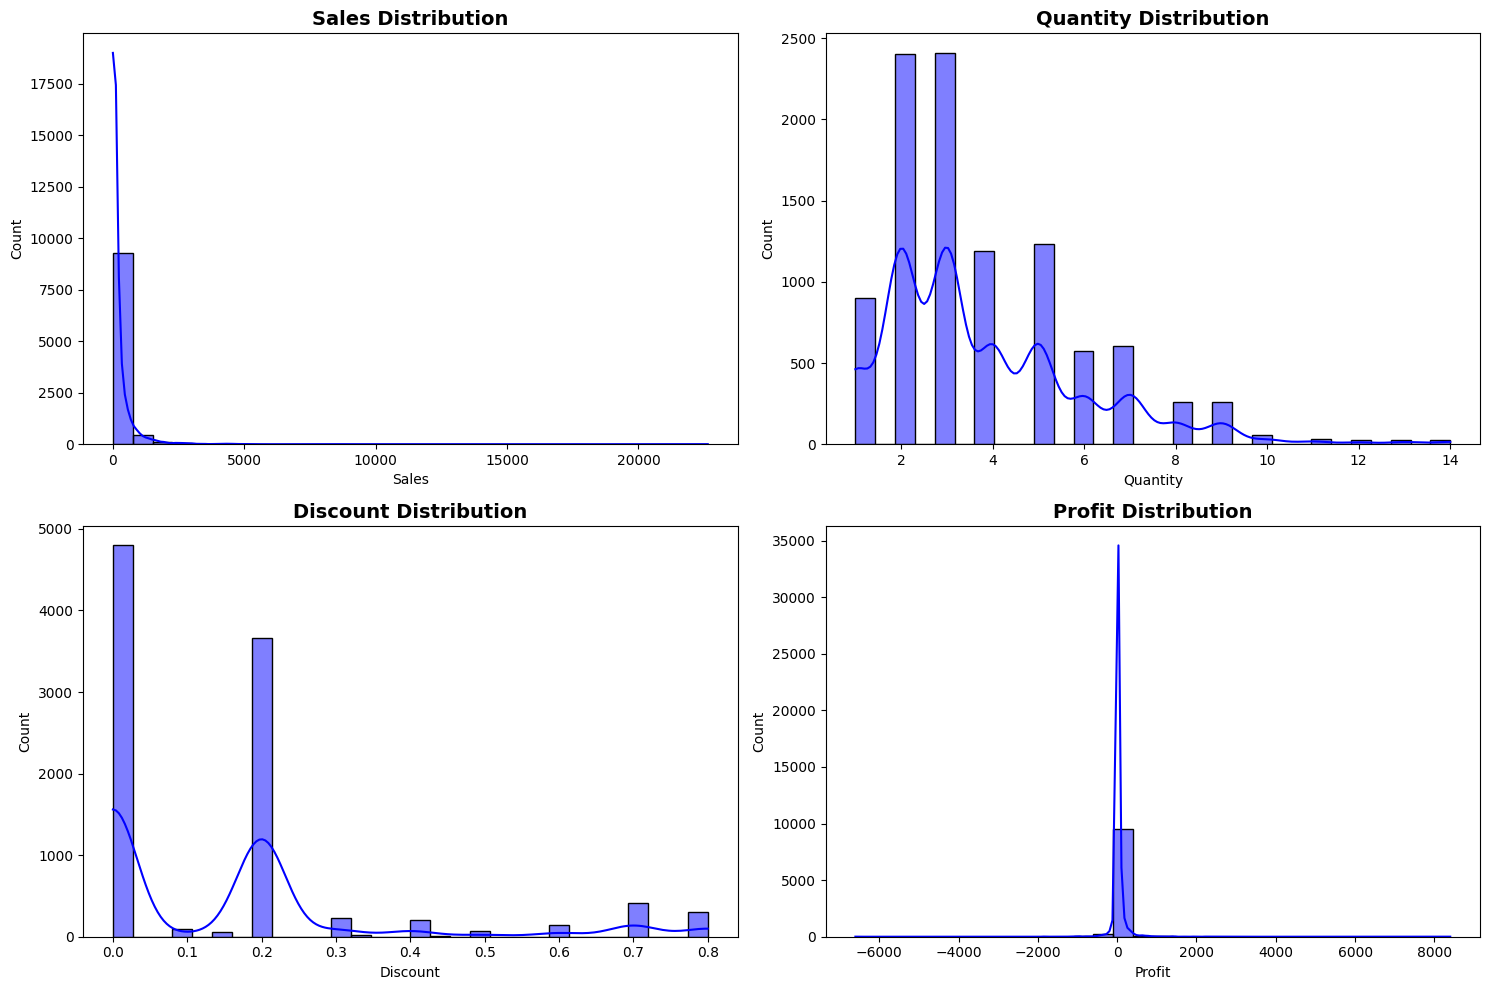

In [123]:
# Analyzing distribution of numerical data consist of Sales, Discount, Quantity, and Profit

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Sales Distribution
sns.histplot(df['Sales'], bins=30, kde=True, ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Sales Distribution', fontdict={'fontsize': 14, 'fontweight': 'bold'})

# Quantity Distribution
sns.histplot(df['Quantity'], bins=30, kde=True, ax=axes[0, 1], color='blue')
axes[0, 1].set_title('Quantity Distribution', fontdict={'fontsize': 14, 'fontweight': 'bold'})

# Discount Distribution
sns.histplot(df['Discount'], bins=30, kde=True, ax=axes[1, 0], color='blue')
axes[1, 0].set_title('Discount Distribution', fontdict={'fontsize': 14, 'fontweight': 'bold'})

# Profit Distribution
sns.histplot(df['Profit'], bins=30, kde=True, ax=axes[1, 1], color='blue')
axes[1, 1].set_title('Profit Distribution', fontdict={'fontsize': 14, 'fontweight': 'bold'})

plt.tight_layout()
plt.show()


In [124]:
import scipy.stats as stats

# List of numerical columns to test
numerical_columns = ['Sales', 'Discount', 'Quantity', 'Profit']

# Dictionary to store the results
normaltest_results = {}

# Perform normality test for each numerical column
for column in numerical_columns:
    stat, p_value = stats.normaltest(df[column])
    normaltest_results[column] = {'statistic': stat, 'p_value': p_value}

# Display the results
for column, result in normaltest_results.items():
    print(f"Column: {column}, Statistic: {result['statistic']:.2f}, P-Value: {result['p_value']:.4f}")
    if result['p_value'] < 0.05:
        print(f"The data in the {column} column is not normally distributed.")
    else:
        print(f"The data in the {column} column is normally distributed.")



Column: Sales, Statistic: 18033.31, P-Value: 0.0000
The data in the Sales column is not normally distributed.
Column: Discount, Statistic: 2977.82, P-Value: 0.0000
The data in the Discount column is not normally distributed.
Column: Quantity, Statistic: 2148.02, P-Value: 0.0000
The data in the Quantity column is not normally distributed.
Column: Profit, Statistic: 14363.74, P-Value: 0.0000
The data in the Profit column is not normally distributed.


Setelah dilakukan uji normalitas, hasil menunjukkan bahwa persebaran data pada ke Empat kolom tidak normal.

In [183]:
# Mengubah kolom Order Date menjadi tipe data datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')

# Membuat kolom baru untuk menandakan periode transaksi
df['Periode'] = df['Order Date'].apply(lambda x: 'Pandemi' if x.year in [2020, 2021] else 'Pasca-Pandemi')

Membuat kolom untuk jika ada transaksi atau pesanan pada tahun 2020 sampai 2021 dianggap sebagai tahun pandemi dan pasca pandemi untuk setelahnya

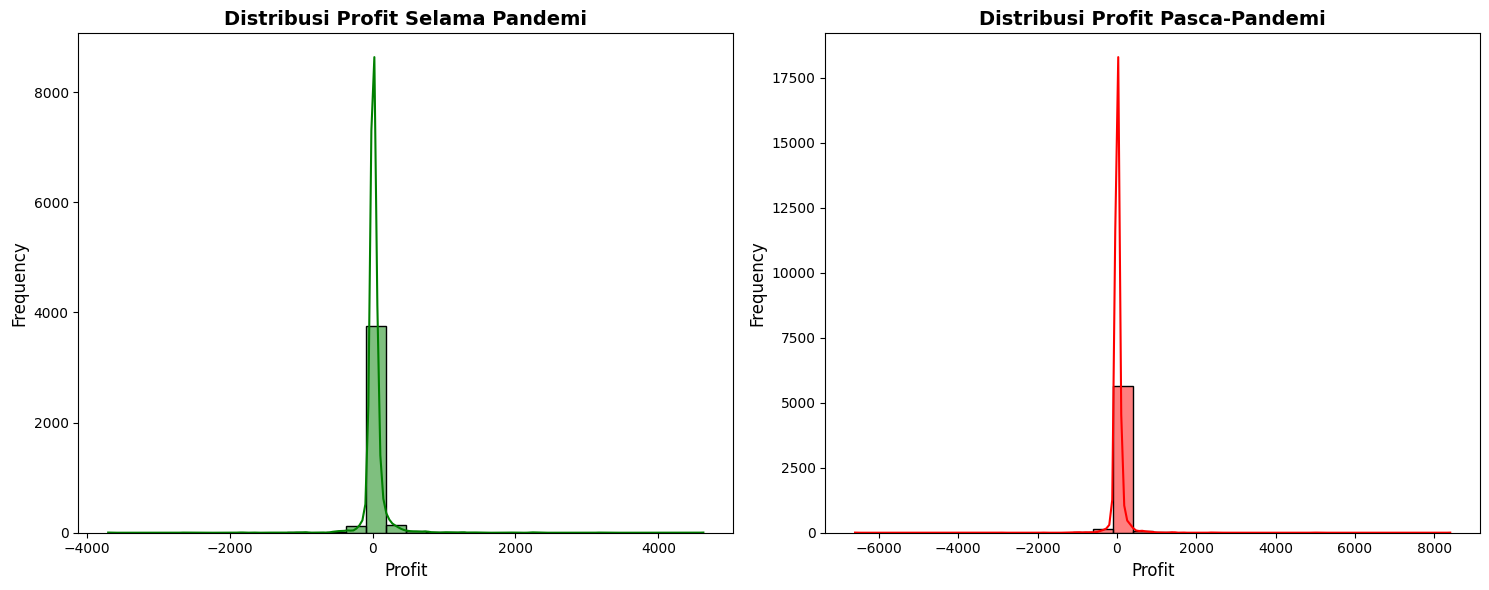

Periode: Pandemi, Statistic: 3919.58, P-Value: 0.0000
Data profit pada periode Pandemi tidak berdistribusi normal.
Periode: Pasca-Pandemi, Statistic: 8940.94, P-Value: 0.0000
Data profit pada periode Pasca-Pandemi tidak berdistribusi normal.


In [128]:
# Filter dataframe berdasarkan periode
pandemic_profit = df[df['Periode'] == 'Pandemi']['Profit']
post_pandemic_profit = df[df['Periode'] == 'Pasca-Pandemi']['Profit']

# Visualisasi Distribusi Profit
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Distribusi Profit selama pandemi
sns.histplot(pandemic_profit, bins=30, kde=True, ax=axes[0], color='green')
axes[0].set_title('Distribusi Profit Selama Pandemi', fontdict={'fontsize': 14, 'fontweight': 'bold'})
axes[0].set_xlabel('Profit', fontdict={'fontsize': 12})
axes[0].set_ylabel('Frequency', fontdict={'fontsize': 12})

# Distribusi Profit pasca-pandemi
sns.histplot(post_pandemic_profit, bins=30, kde=True, ax=axes[1], color='red')
axes[1].set_title('Distribusi Profit Pasca-Pandemi', fontdict={'fontsize': 14, 'fontweight': 'bold'})
axes[1].set_xlabel('Profit', fontdict={'fontsize': 12})
axes[1].set_ylabel('Frequency', fontdict={'fontsize': 12})

plt.tight_layout()
plt.show()

# Uji Normalitas untuk profit selama pandemi dan pasca-pandemi
normaltest_results = {}

# Uji Normalitas selama pandemi
stat_pandemic, p_value_pandemic = stats.normaltest(pandemic_profit)
normaltest_results['Pandemi'] = {'statistic': stat_pandemic, 'p_value': p_value_pandemic}

# Uji Normalitas pasca-pandemi
stat_post_pandemic, p_value_post_pandemic = stats.normaltest(post_pandemic_profit)
normaltest_results['Pasca-Pandemi'] = {'statistic': stat_post_pandemic, 'p_value': p_value_post_pandemic}

# Menampilkan hasil uji normalitas
for period, result in normaltest_results.items():
    print(f"Periode: {period}, Statistic: {result['statistic']:.2f}, P-Value: {result['p_value']:.4f}")
    if result['p_value'] < 0.05:
        print(f"Data profit pada periode {period} tidak berdistribusi normal.")
    else:
        print(f"Data profit pada periode {period} berdistribusi normal.")


Setelah dilakukan uji normalitas, hasil menunjukkan bahwa persebaran data pada ke Empat kolom tidak normal.

# Data Analysis

## Analysis Profit Tahun Pandemi vs Pasca Pandemi

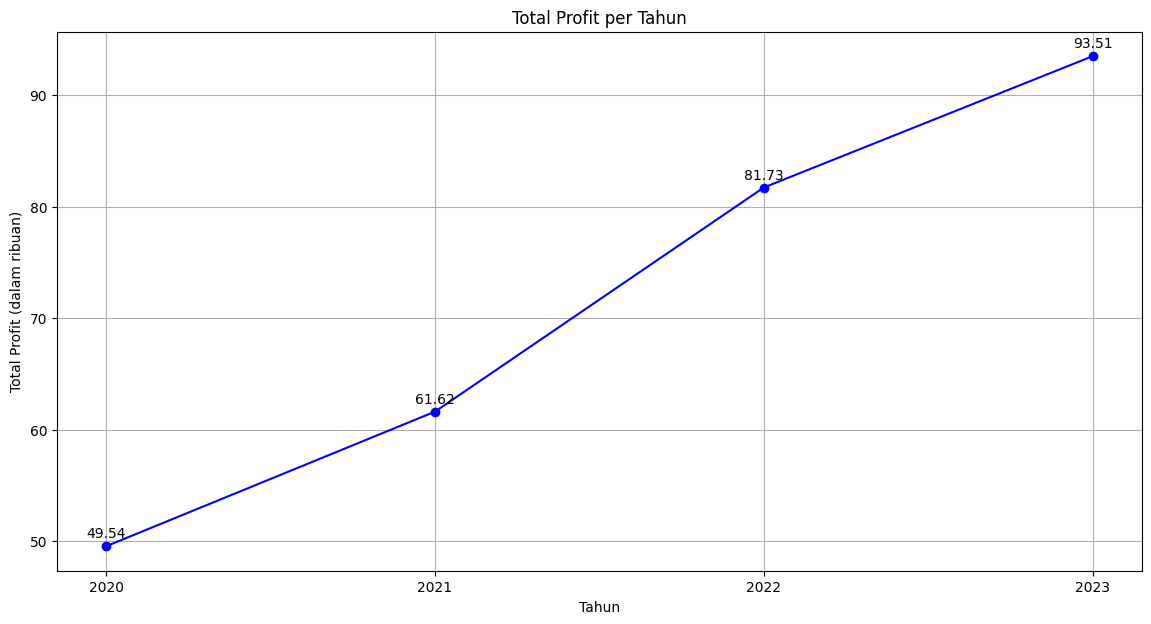

In [129]:
# Mengubah kolom Order Date menjadi tipe data datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')

# Menambahkan kolom tahun
df['Year'] = df['Order Date'].dt.year

# Mengelompokkan data berdasarkan tahun dan menghitung total profit
yearly_profit = df.groupby('Year')['Profit'].sum().reset_index()

# Mengubah nilai profit menjadi ribuan
yearly_profit['Profit'] = yearly_profit['Profit'] / 1000

# Mengatur tema seaborn menjadi blues
sns.set_palette("Blues")

# Membuat line plot
plt.figure(figsize=(14, 7))
plt.plot(yearly_profit['Year'], yearly_profit['Profit'], marker='o', color='blue')
plt.xlabel('Tahun')
plt.ylabel('Total Profit (dalam ribuan)')
plt.title('Total Profit per Tahun')
plt.grid(True)
plt.xticks(yearly_profit['Year'])

# Menampilkan nilai profit di atas setiap titik
for i, txt in enumerate(yearly_profit['Profit']):
    plt.text(yearly_profit['Year'][i], txt + 0.5, f'{round(txt, 2)}', ha='center', va='bottom', color='black')

plt.show()


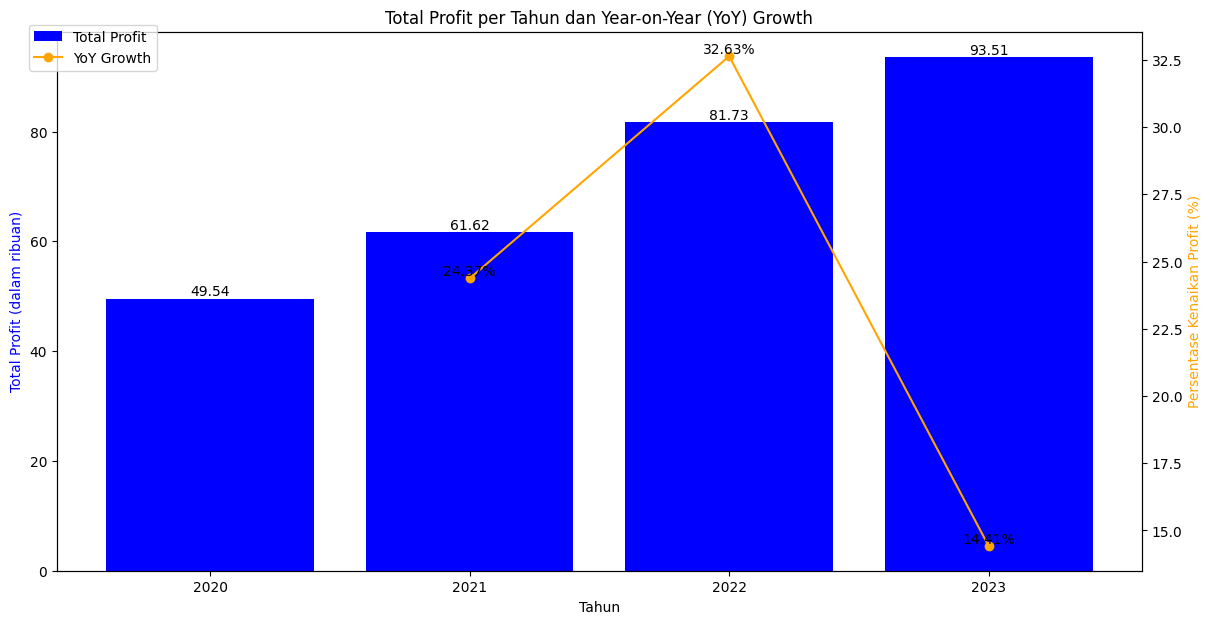

In [130]:
# Mengubah kolom Order Date menjadi tipe data datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')

# Menambahkan kolom tahun
df['Year'] = df['Order Date'].dt.year

# Mengelompokkan data berdasarkan tahun dan menghitung total profit
yearly_profit = df.groupby('Year')['Profit'].sum().reset_index()

# Menghitung persentase kenaikan profit dari tahun ke tahun
yearly_profit['YoY Growth (%)'] = yearly_profit['Profit'].pct_change() * 100

# Mengubah nilai profit menjadi ribuan
yearly_profit['Profit'] = yearly_profit['Profit'] / 1000

# Mengatur tema seaborn menjadi blues
sns.set_palette("Blues")

# Membuat subplot
fig, ax1 = plt.subplots(figsize=(14, 7))

# Bar chart untuk total profit per tahun
bars = ax1.bar(yearly_profit['Year'], yearly_profit['Profit'], color='blue', label='Total Profit')
ax1.set_xlabel('Tahun')
ax1.set_ylabel('Total Profit (dalam ribuan)', color='blue')
ax1.set_title('Total Profit per Tahun dan Year-on-Year (YoY) Growth')
ax1.set_xticks(yearly_profit['Year'])

# Menampilkan nilai profit di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', color='black')

# Line chart untuk persentase kenaikan profit
ax2 = ax1.twinx()
ax2.plot(yearly_profit['Year'], yearly_profit['YoY Growth (%)'], color='orange', marker='o', label='YoY Growth')
ax2.set_ylabel('Persentase Kenaikan Profit (%)', color='orange')

# Menampilkan nilai persentase kenaikan di atas setiap titik
for i, txt in enumerate(yearly_profit['YoY Growth (%)'][1:]):
    ax2.text(yearly_profit['Year'][i+1], txt, f'{round(txt, 2)}%', ha='center', va='bottom', color='black')

# Menambahkan legenda
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))

plt.show()


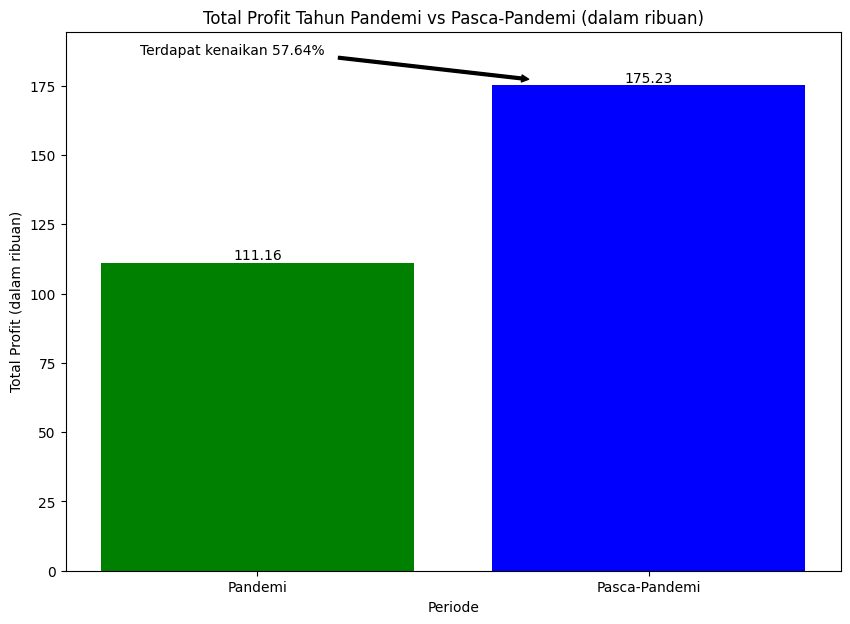

In [131]:
# Menghitung total profit untuk tahun pandemi
pandemic_profit = df[df['Periode'] == 'Pandemi']['Profit'].sum() / 1000

# Menghitung total profit untuk tahun pasca-pandemi
post_pandemic_profit = df[df['Periode'] == 'Pasca-Pandemi']['Profit'].sum() / 1000

# Menghitung persentase kenaikan profit dari pandemi ke pasca-pandemi
profit_increase_percentage = ((post_pandemic_profit - pandemic_profit) / pandemic_profit) * 100

# Membuat dataframe untuk visualisasi
profit_data = pd.DataFrame({
    'Periode': ['Pandemi', 'Pasca-Pandemi'],
    'Total Profit (dalam ribuan)': [pandemic_profit, post_pandemic_profit]
})

# Membuat bar chart
plt.figure(figsize=(10, 7))
bars = plt.bar(profit_data['Periode'], profit_data['Total Profit (dalam ribuan)'], color=['green', 'blue'])

# Menampilkan nilai profit di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Menambahkan teks yang menunjukkan persentase kenaikan profit
plt.text(-0.3, post_pandemic_profit + 10, f'Terdapat kenaikan {round(profit_increase_percentage, 2)}%', ha='left', va='bottom', color='black')

# Menambahkan panah yang mengarah ke bar chart
arrow = patches.FancyArrowPatch((0.2, post_pandemic_profit + 10), (0.7, post_pandemic_profit + 2), mutation_scale=10, color='black')
plt.gca().add_patch(arrow)

plt.xlabel('Periode')
plt.ylabel('Total Profit (dalam ribuan)')
plt.title('Total Profit Tahun Pandemi vs Pasca-Pandemi (dalam ribuan)')
plt.show()


## Insight
Setelah dilakukan analisis, terlihat bahwa tren profit perusahaan mengalami kenaikan setiap tahunnya. Terdapat perbedaan signifikan dalam profitabilitas antara tahun pandemi COVID-19 (2020–2021) dan pasca-pandemi (2022–2023). Selama periode pandemi, profitabilitas yang didapatkan perusahaan lebih rendah dibandingkan dengan periode pasca-pandemi. Profit yang didapatkan pada periode pasca-pandemi menunjukkan peningkatan yang signifikan sebesar 57,64% dibandingkan dengan periode pandemi dan sebelum pandemi.

### Analysis Pola Industry dan Profit Saat Pandemi dan Setelah Pandemi 

In [132]:
# Menghitung total profit dan persentase profit untuk setiap industri selama periode pandemi
pandemic_df = df[df['Periode'] == 'Pandemi']
pandemic_profit_percent = pandemic_df.groupby("Industry")[["Profit"]].sum()
total_pandemic_profit = pandemic_profit_percent["Profit"].sum()
pandemic_profit_percent["Profit_Percentage"] = (pandemic_profit_percent["Profit"] / total_pandemic_profit) * 100

# Menghitung total profit dan persentase profit untuk setiap industri selama periode pasca-pandemi
post_pandemic_df = df[df['Periode'] == 'Pasca-Pandemi']
post_pandemic_profit_percent = post_pandemic_df.groupby("Industry")[["Profit"]].sum()
total_post_pandemic_profit = post_pandemic_profit_percent["Profit"].sum()
post_pandemic_profit_percent["Profit_Percentage"] = (post_pandemic_profit_percent["Profit"] / total_post_pandemic_profit) * 100

# Menghitung persentase kenaikan profit
increase_percent = (post_pandemic_profit_percent["Profit"] - pandemic_profit_percent["Profit"]) / pandemic_profit_percent["Profit"] * 100

# Menambahkan kolom persentase kenaikan profit
post_pandemic_profit_percent["Increase_Percentage"] = increase_percent.round(2)

# Membulatkan ke dua tempat desimal
pandemic_profit_percent["Profit_Percentage"] = pandemic_profit_percent["Profit_Percentage"].round(2)
post_pandemic_profit_percent["Profit_Percentage"] = post_pandemic_profit_percent["Profit_Percentage"].round(2)

# Format kolom Profit supaya memiliki separator ribuan dan dua tempat desimal
pandemic_profit_percent["Profit"] = pandemic_profit_percent["Profit"].map('{:,.2f}'.format)
post_pandemic_profit_percent["Profit"] = post_pandemic_profit_percent["Profit"].map('{:,.2f}'.format)

# Menyortir berdasarkan persentase profit dalam urutan menurun
pandemic_profit_percent = pandemic_profit_percent.sort_values("Profit_Percentage", ascending=False)
post_pandemic_profit_percent = post_pandemic_profit_percent.sort_values("Profit_Percentage", ascending=False)

# Menampilkan hasil dalam bentuk dataframe
pandemic_profit_percent_df = pandemic_profit_percent.reset_index()
post_pandemic_profit_percent_df = post_pandemic_profit_percent.reset_index()

# Menampilkan dataframes
print("Profit dan Persentase Profit Selama Pandemi:")
display(pandemic_profit_percent_df)
print("\nProfit dan Persentase Profit Selama Pasca-Pandemi:")
display(post_pandemic_profit_percent_df)


Profit dan Persentase Profit Selama Pandemi:


,Industry,Profit,Profit_Percentage
0,Energy,"20,823.24",18.73
1,Finance,"19,036.89",17.13
2,Manufacturing,"18,543.47",16.68
3,Healthcare,"15,218.52",13.69
4,Retail,"9,816.77",8.83
5,Consumer Products,"8,593.43",7.73
6,Tech,"7,125.09",6.41
7,Communications,"7,094.13",6.38
8,Transportation,"2,621.07",2.36
9,Misc,"2,289.99",2.06



Profit dan Persentase Profit Selama Pasca-Pandemi:


,Industry,Profit,Profit_Percentage,Increase_Percentage
0,Finance,"31,312.08",17.87,64.48
1,Consumer Products,"28,424.58",16.22,230.77
2,Energy,"24,459.07",13.96,17.46
3,Retail,"20,391.06",11.64,107.72
4,Manufacturing,"19,869.64",11.34,7.15
5,Tech,"17,489.95",9.98,145.47
6,Healthcare,"16,750.57",9.56,10.07
7,Communications,"6,882.22",3.93,-2.99
8,Misc,"4,873.64",2.78,112.82
9,Transportation,"4,781.63",2.73,82.43


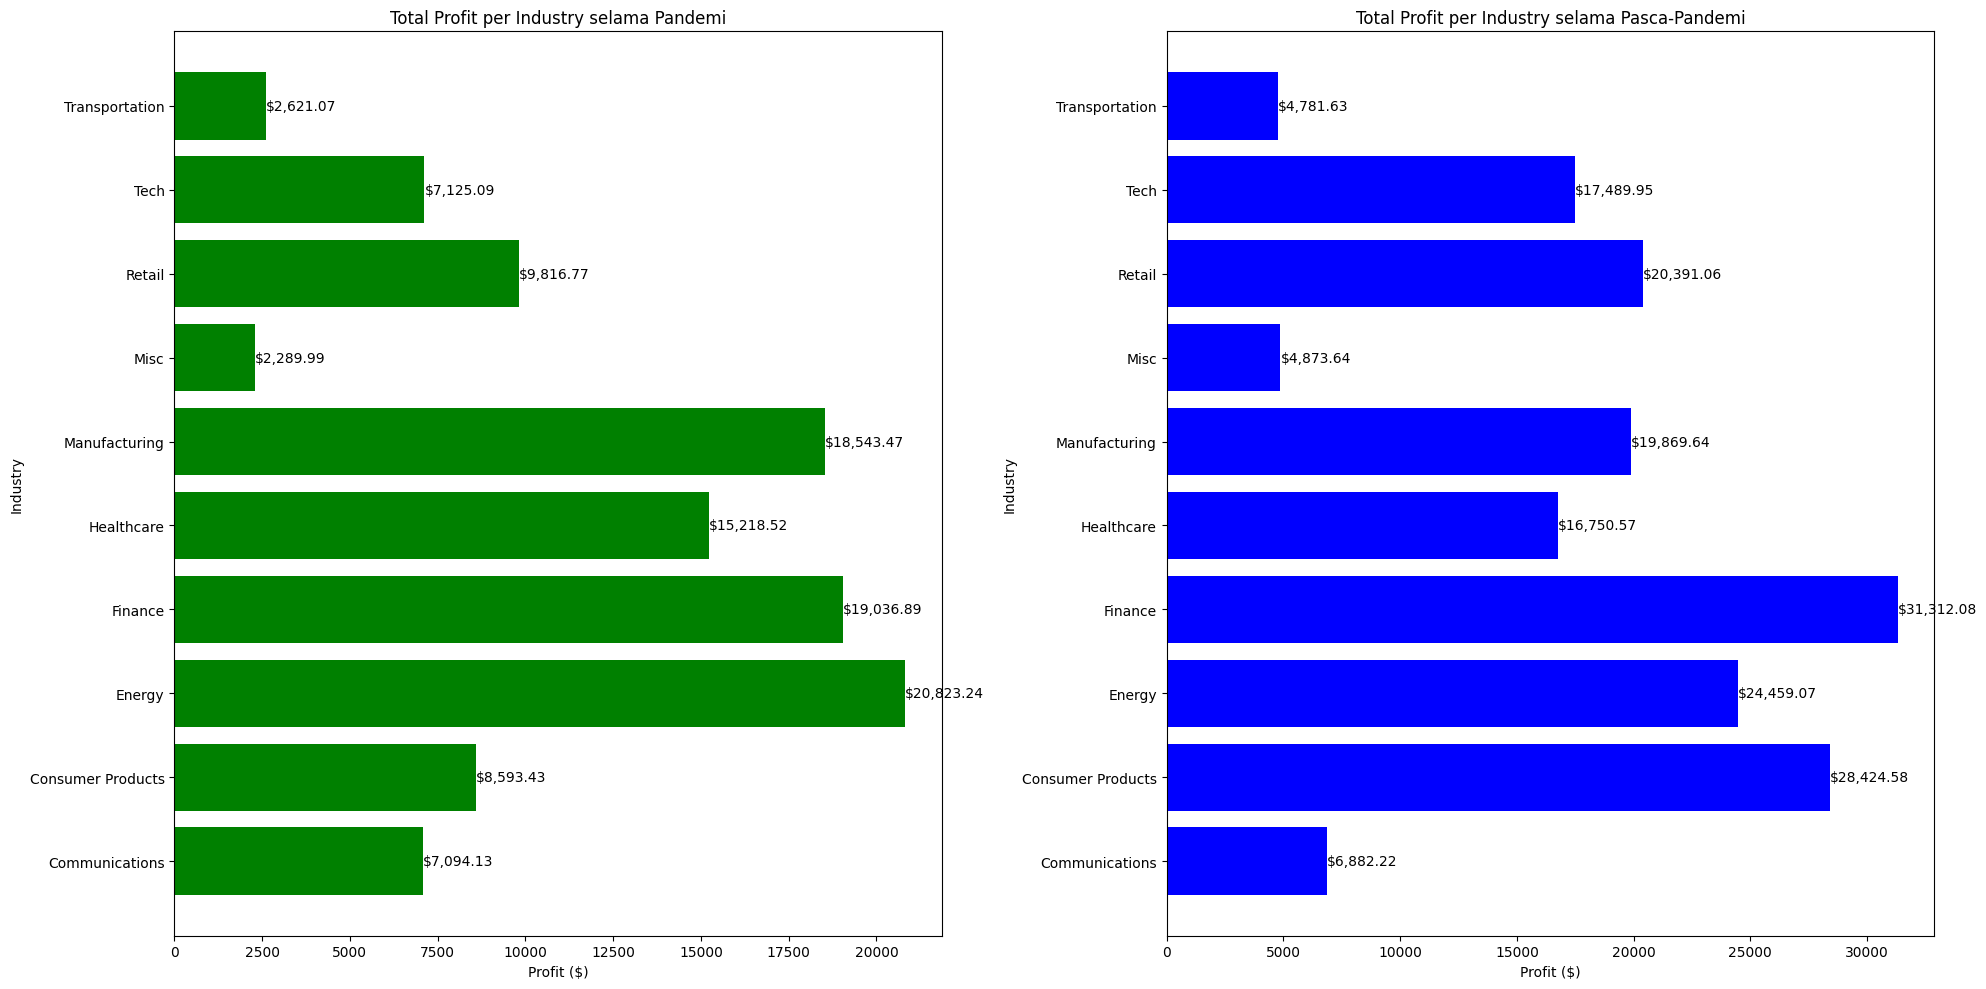

In [133]:
# Menghitung total profit untuk setiap industry selama periode pandemi
pandemic_df = df[df['Periode'] == 'Pandemi']
pandemic_profit = pandemic_df.groupby("Industry")[["Profit"]].sum().sort_values(by="Profit", ascending=False)

# Menghitung total profit untuk setiap industry selama periode pasca-pandemi
post_pandemic_df = df[df['Periode'] == 'Pasca-Pandemi']
post_pandemic_profit = post_pandemic_df.groupby("Industry")[["Profit"]].sum().sort_values(by="Profit", ascending=False)

# Menyelaraskan industry untuk kedua periode
combined_industries = pandemic_profit.index.union(post_pandemic_profit.index)
pandemic_profit = pandemic_profit.reindex(combined_industries, fill_value=0)
post_pandemic_profit = post_pandemic_profit.reindex(combined_industries, fill_value=0)

# Menampilkan hasil dalam bentuk dataframe
pandemic_profit_df = pandemic_profit.reset_index()
post_pandemic_profit_df = post_pandemic_profit.reset_index()

# Membuat subplot untuk periode pandemi dan pasca-pandemi
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# Barplot horizontal untuk periode pandemi
axes[0].barh(pandemic_profit_df['Industry'], pandemic_profit['Profit'], color='green')
axes[0].set_xlabel('Profit ($)')
axes[0].set_ylabel('Industry')
axes[0].set_title('Total Profit per Industry selama Pandemi')

# Menampilkan nilai profit di atas setiap bar
for index, value in enumerate(pandemic_profit['Profit']):
    axes[0].text(value, index, f'${value:,.2f}', ha='left', va='center', color='black')

# Barplot horizontal untuk periode pasca-pandemi
axes[1].barh(post_pandemic_profit_df['Industry'], post_pandemic_profit['Profit'], color='blue')
axes[1].set_xlabel('Profit ($)')
axes[1].set_ylabel('Industry')
axes[1].set_title('Total Profit per Industry selama Pasca-Pandemi')

# Menampilkan nilai profit di atas setiap bar
for index, value in enumerate(post_pandemic_profit['Profit']):
    axes[1].text(value, index, f'${value:,.2f}', ha='left', va='center', color='black')

plt.tight_layout()
plt.show()


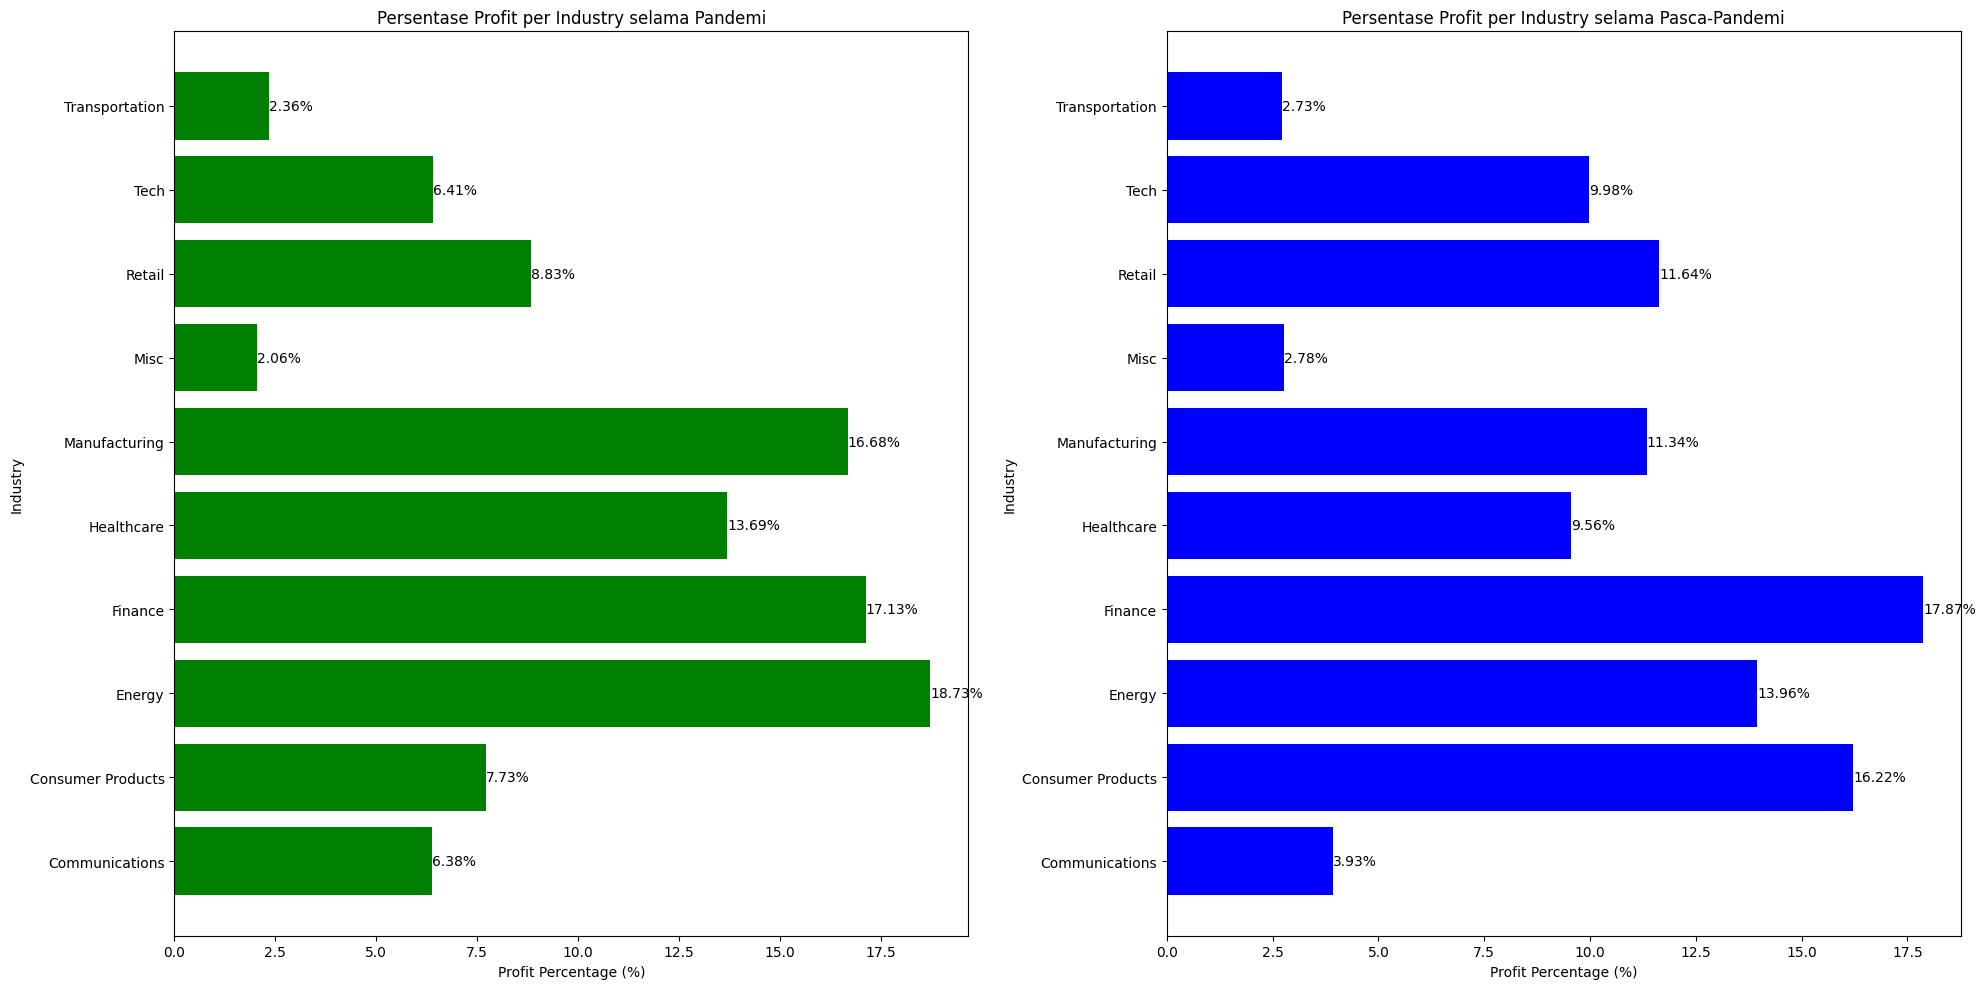

In [134]:
# Menghitung total profit dan persentase profit untuk setiap industry selama periode pandemi
pandemic_df = df[df['Periode'] == 'Pandemi']
pandemic_profit_percent = pandemic_df.groupby("Industry")[["Profit"]].sum()
total_pandemic_profit = pandemic_profit_percent["Profit"].sum()
pandemic_profit_percent["Profit_Percentage"] = (pandemic_profit_percent["Profit"] / total_pandemic_profit) * 100

# Menghitung total profit dan persentase profit untuk setiap industry selama periode pasca-pandemi
post_pandemic_df = df[df['Periode'] == 'Pasca-Pandemi']
post_pandemic_profit_percent = post_pandemic_df.groupby("Industry")[["Profit"]].sum()
total_post_pandemic_profit = post_pandemic_profit_percent["Profit"].sum()
post_pandemic_profit_percent["Profit_Percentage"] = (post_pandemic_profit_percent["Profit"] / total_post_pandemic_profit) * 100

# Menampilkan hasil dalam bentuk dataframe
pandemic_profit_percent_df = pandemic_profit_percent.reset_index()
post_pandemic_profit_percent_df = post_pandemic_profit_percent.reset_index()

# Membuat subplot untuk periode pandemi dan pasca-pandemi
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# Bar chart horizontal untuk periode pandemi
axes[0].barh(pandemic_profit_percent_df['Industry'], pandemic_profit_percent_df['Profit_Percentage'], color='green')
axes[0].set_ylabel('Industry')
axes[0].set_xlabel('Profit Percentage (%)')
axes[0].set_title('Persentase Profit per Industry selama Pandemi')

# Menampilkan nilai persentase di atas setiap bar
for index, value in enumerate(pandemic_profit_percent_df['Profit_Percentage']):
    axes[0].text(value, index, f'{value:.2f}%', ha='left', va='center', color='black')

# Bar chart horizontal untuk periode pasca-pandemi
axes[1].barh(post_pandemic_profit_percent_df['Industry'], post_pandemic_profit_percent_df['Profit_Percentage'], color='blue')
axes[1].set_ylabel('Industry')
axes[1].set_xlabel('Profit Percentage (%)')
axes[1].set_title('Persentase Profit per Industry selama Pasca-Pandemi')

# Menampilkan nilai persentase di atas setiap bar
for index, value in enumerate(post_pandemic_profit_percent_df['Profit_Percentage']):
    axes[1].text(value, index, f'{value:.2f}%', ha='left', va='center', color='black')

plt.tight_layout()
plt.show()


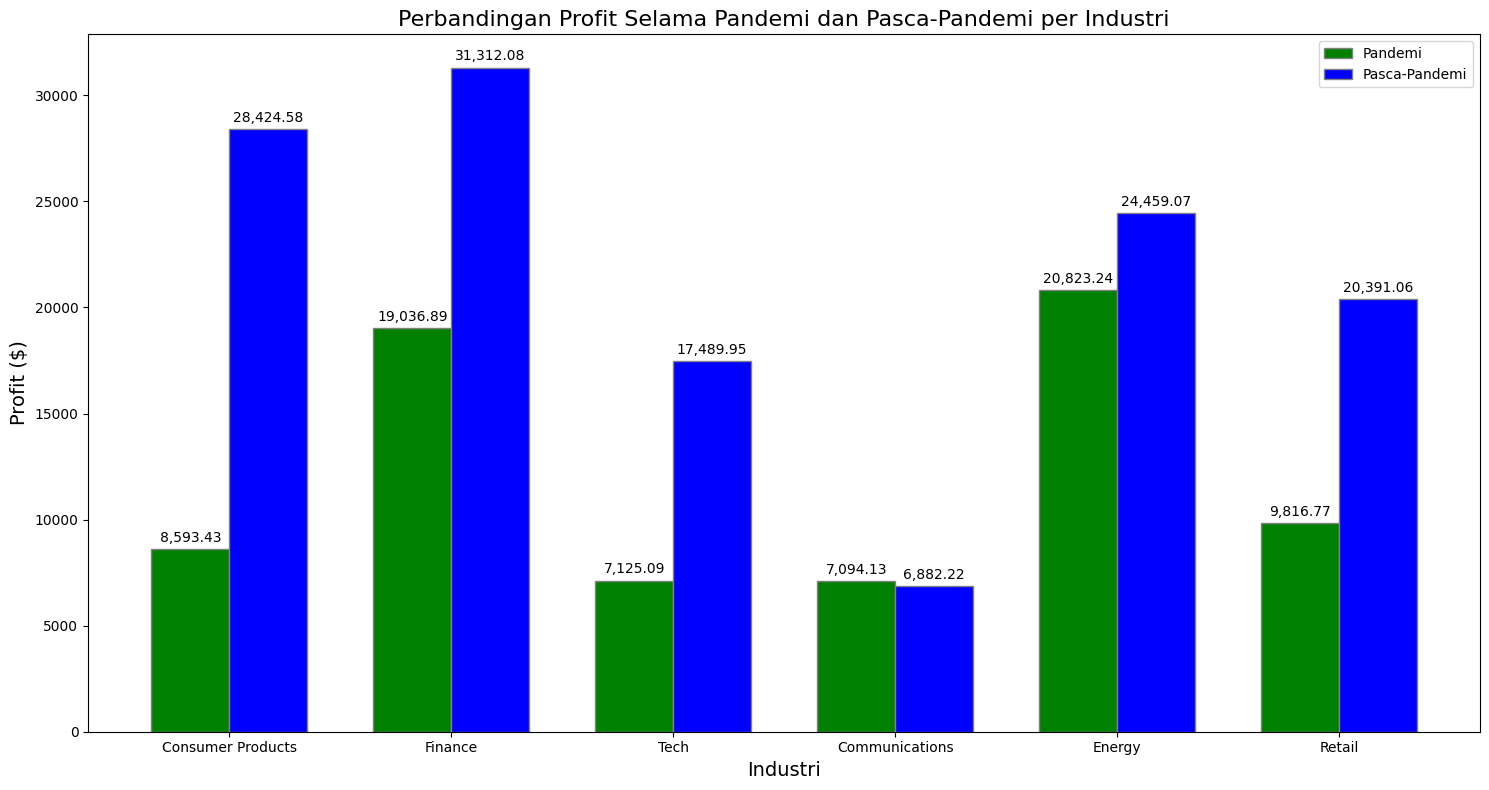

In [172]:
import matplotlib.pyplot as plt
import numpy as np

# Data
industries = ['Consumer Products', 'Finance', 'Tech', 'Communications', 'Energy', 'Retail']
pandemic_profits = [8593.43, 19036.89, 7125.09, 7094.13, 20823.24, 9816.77]
post_pandemic_profits = [28424.58, 31312.08, 17489.95, 6882.22, 24459.07, 20391.06]

# Setting the position of bars on x-axis
bar_width = 0.35
r1 = np.arange(len(industries))
r2 = [x + bar_width for x in r1]

# Plotting
fig, ax = plt.subplots(figsize=(15, 8))

# Creating bars for pandemic profits
bars1 = ax.bar(r1, pandemic_profits, color='green', width=bar_width, edgecolor='grey', label='Pandemi')

# Creating bars for post-pandemic profits
bars2 = ax.bar(r2, post_pandemic_profits, color='blue', width=bar_width, edgecolor='grey', label='Pasca-Pandemi')

# Adding value labels on top of the bars
for bar in bars1:
    height = bar.get_height()
    ax.annotate(f'{height:,.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

for bar in bars2:
    height = bar.get_height()
    ax.annotate(f'{height:,.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

# Adding main title and axis labels
ax.set_title('Perbandingan Profit Selama Pandemi dan Pasca-Pandemi per Industri', fontsize=16)
ax.set_xlabel('Industri', fontsize=14)
ax.set_ylabel('Profit ($)', fontsize=14)

# Adding x-ticks labels to the x-axis
ax.set_xticks([r + bar_width / 2 for r in range(len(industries))])
ax.set_xticklabels(industries)

# Adding legend
ax.legend()

plt.tight_layout()
plt.show()


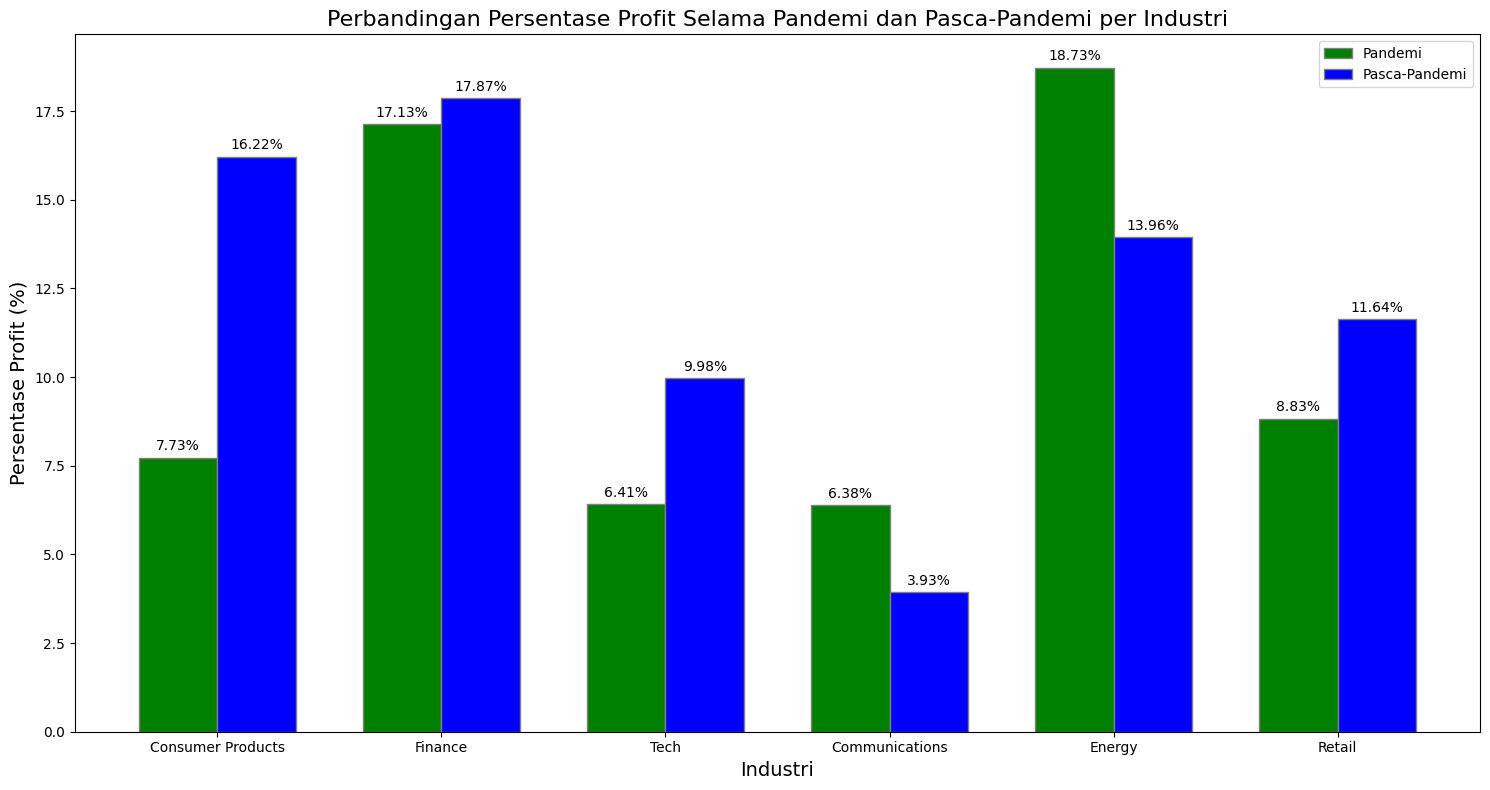

In [173]:
import matplotlib.pyplot as plt
import numpy as np

# Data
industries = ['Consumer Products', 'Finance', 'Tech', 'Communications', 'Energy', 'Retail']
pandemic_percentage = [7.73, 17.13, 6.41, 6.38, 18.73, 8.83]
post_pandemic_percentage = [16.22, 17.87, 9.98, 3.93, 13.96, 11.64]

# Setting the position of bars on x-axis
bar_width = 0.35
bar_positions = np.arange(len(industries))

# Plotting
fig, ax = plt.subplots(figsize=(15, 8))

# Creating bars for pandemic and post-pandemic profit percentages
bars1 = ax.bar(bar_positions - bar_width/2, pandemic_percentage, color='green', width=bar_width, edgecolor='grey', label='Pandemi')
bars2 = ax.bar(bar_positions + bar_width/2, post_pandemic_percentage, color='blue', width=bar_width, edgecolor='grey', label='Pasca-Pandemi')

# Adding value labels on top of the bars
for bar in bars1:
    height = bar.get_height()
    ax.annotate(f'{height:,.2f}%',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

for bar in bars2:
    height = bar.get_height()
    ax.annotate(f'{height:,.2f}%',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

# Adding main title and axis labels
ax.set_title('Perbandingan Persentase Profit Selama Pandemi dan Pasca-Pandemi per Industri', fontsize=16)
ax.set_xlabel('Industri', fontsize=14)
ax.set_ylabel('Persentase Profit (%)', fontsize=14)

# Adding x-ticks labels to the x-axis
ax.set_xticks(bar_positions)
ax.set_xticklabels(industries)

# Adding legend
ax.legend()

plt.tight_layout()
plt.show()


#### Insight Pola 
1. **Consumer Products**:
    - **Pandemi**: Profit sebesar $8,593.43 dengan persentase profit 7.73%.
    - **Pasca-Pandemi**: Profit meningkat menjadi $28,424.58 dengan persentase profit 16.22%.
    - **Insight**:  Sektor Consumer Products mengalami kenaikan proporsi Profit yang signifikan, dimana indsutri ini persentase profitnya meningkat dari 7.73% selama pandemi menjadi 16.22% setelah pandemi. Ini menunjukkan hampir dua kali lipat peningkatan proporsi profit, mencerminkan tingginya lonjakan permintaan produk konsumen setelah pandemi. Selain itu dari sisi profit sendiri terjadi peningkatan sebesar 230.77% dibandingkan dengan tahun pandemi.

2. **Finance**:
    - **Pandemi**: Profit sebesar $19,036.89 dengan persentase profit 17.13%.
    - **Pasca-Pandemi**: Profit meningkat menjadi $31,312.08 dengan persentase profit 17.87%.
    - **Insight**: Sektor Finance mengalami peningkatan profit yang signifikan dari $19,036.89 selama pandemi menjadi $31,312.08 setelah pandemi. Ini menunjukkan penguatan yang luar biasa dalam sektor keuangan dengan peningkatan profit yang mencapai 64.48%.

3. **Tech**:
    - **Pandemi**: Profit sebesar $7,125.09 dengan persentase profit 6.41%.
    - **Pasca-Pandemi**: Profit meningkat menjadi $17,489.95 dengan persentase profit 9.98%.
    - **Insight**: Sektor Tech menunjukkan peningkatan profit yang signifikan sebesar dimana profit dari industri ini hampir dua kali lipat bertambah di industri Tech dari $7,125.09 selama pandemi menjadi $17,489.95 setelah pandemi (bertambah sebesar 145.47%), mencerminkan tingginya permintaan teknologi pasca-pandemi.

4. **Communications**:
    - **Pandemi**: Profit sebesar $7,094.13 dengan persentase profit 6.38%
    - **Pasca-Pandemi**: Profit menurun menjadi $6,882.22 dengan persentase profit 3.93%.
    - **Insight**: Industri Communications adalah satu-satunya sektor yang mengalami penurunan profit setelah pandemi sebesar -2.99%

5. **Energy**:
    - **Insight**: Selama periode pandemi, industri energi berada di urutan teratas dengan profit sebesar \$20,823.24 dan persentase profit 18.73%. Namun, selama pasca-pandemi, meskipun industri energi masih menunjukkan profit sebesar \$24,459.07 dan persentase profit 13.96%, peningkatan sebesar 17.46% ini tidak sebanding dengan industri lain seperti finance, consumer products, retail, dan tech yang mengalami peningkatan signifikan.

6. **Retail**:
    - **Pandemi**: Profit sebesar \$9,816.77 dengan persentase profit 8.83%.
    - **Pasca-Pandemi**:Profit meningkat menjadi \$20,391.06 dengan persentase profit 11.64%.
    - **Insight**: elama periode pandemi, profit industri retail berada di level menengah dengan profit sebesar \$9,816.77 dan persentase profit 8.83%. Namun, pada periode pasca-pandemi, industri retail mengalami peningkatan yang signifikan. Profit meningkat menjadi \$20,391.06, menunjukkan peningkatan dalam profit sebesar 107.72%.

#### Uji Statistik Pola Industry

In [174]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

# Data selama pandemi dan pasca-pandemi
pandemic_data = {
    'Industry': ['Energy', 'Finance', 'Manufacturing', 'Healthcare', 'Retail', 
                 'Consumer Products', 'Tech', 'Communications', 'Transportation', 'Misc'],
    'Profit': [20823.24, 19036.89, 18543.47, 15218.52, 9816.77, 8593.43, 7125.09, 7094.13,
               2621.07, 2289.99]
}

post_pandemic_data = {
    'Industry': ['Finance', 'Consumer Products', 'Energy', 'Retail', 'Manufacturing', 
                 'Tech', 'Healthcare', 'Communications', 'Misc', 'Transportation'],
    'Profit': [31312.08, 28424.58, 24459.07, 20391.06, 19869.64, 17489.95, 16750.57, 6882.22, 
               4873.64, 4781.63]
}

# Total profits selama pandemi dan pasca-pandemi dari semua industri
total_profits_pandemic = sum(pandemic_data['Profit'])
total_profits_post_pandemic = sum(post_pandemic_data['Profit'])

# Data industri yang diuji: Finance dan Tech
industries = ['Finance', 'Tech']
pandemic_profits = [pandemic_data['Profit'][pandemic_data['Industry'].index(ind)] for ind in industries]
post_pandemic_profits = [post_pandemic_data['Profit'][post_pandemic_data['Industry'].index(ind)] for ind in industries]

# Hitung proporsi laba selama dan pasca-pandemi
proportion_pandemic = [profit / total_profits_pandemic for profit in pandemic_profits]
proportion_post_pandemic = [profit / total_profits_post_pandemic for profit in post_pandemic_profits]

# Fungsi untuk menentukan apakah perbedaan signifikan dengan p-value 0.01
def is_significant(p_value):
    return "berbeda" if p_value < 0.01 else "tidak berbeda"

# Uji Z untuk industri Finance
successes_finance = [np.round(proportion_post_pandemic[0] * total_profits_post_pandemic),
                     np.round(proportion_pandemic[0] * total_profits_pandemic)]
counts_finance = [total_profits_post_pandemic, total_profits_pandemic]
z_stat_finance, p_val_finance = proportions_ztest(successes_finance, counts_finance)
result_finance = is_significant(p_val_finance)
print(f"Industri Finance:  Perbedaan: {result_finance}")


Industri Finance:  Perbedaan: tidak berbeda


Dari hasil script diatas dapat dilihat bahwa saat z test proportion data tidak berbeda secara signifikan proporsi profit dari industri finance

### Analysis Pola Segment dan Profit Saat Pandemi dan Setelah Pandemi 

In [ ]:
# Menghitung total profit dan persentase profit untuk setiap segmen selama periode pandemi
pandemic_df = df[df['Periode'] == 'Pandemi']
pandemic_profit_percent = pandemic_df.groupby("Segment")[["Profit"]].sum()
total_pandemic_profit = pandemic_profit_percent["Profit"].sum()
pandemic_profit_percent["Profit_Percentage"] = (pandemic_profit_percent["Profit"] / total_pandemic_profit) * 100

# Menghitung total profit dan persentase profit untuk setiap segmen selama periode pasca-pandemi
post_pandemic_df = df[df['Periode'] == 'Pasca-Pandemi']
post_pandemic_profit_percent = post_pandemic_df.groupby("Segment")[["Profit"]].sum()
total_post_pandemic_profit = post_pandemic_profit_percent["Profit"].sum()
post_pandemic_profit_percent["Profit_Percentage"] = (post_pandemic_profit_percent["Profit"] / total_post_pandemic_profit) * 100

# Menghitung persentase kenaikan profit
increase_percent = (post_pandemic_profit_percent["Profit"] - pandemic_profit_percent["Profit"]) / pandemic_profit_percent["Profit"] * 100

# Menambahkan kolom persentase kenaikan profit
post_pandemic_profit_percent["Increase_Percentage"] = increase_percent.round(2)

# Membulatkan ke dua tempat desimal
pandemic_profit_percent["Profit_Percentage"] = pandemic_profit_percent["Profit_Percentage"].round(2)
post_pandemic_profit_percent["Profit_Percentage"] = post_pandemic_profit_percent["Profit_Percentage"].round(2)

# Format kolom Profit supaya memiliki separator ribuan dan dua tempat desimal
pandemic_profit_percent["Profit"] = pandemic_profit_percent["Profit"].map('{:,.2f}'.format)
post_pandemic_profit_percent["Profit"] = post_pandemic_profit_percent["Profit"].map('{:,.2f}'.format)

# Menyortir berdasarkan persentase profit dalam urutan menurun
pandemic_profit_percent = pandemic_profit_percent.sort_values("Profit_Percentage", ascending=False)
post_pandemic_profit_percent = post_pandemic_profit_percent.sort_values("Profit_Percentage", ascending=False)

# Menampilkan hasil dalam bentuk dataframe
pandemic_profit_percent_df = pandemic_profit_percent.reset_index()
post_pandemic_profit_percent_df = post_pandemic_profit_percent.reset_index()

# Menampilkan dataframes
print("Profit dan Persentase Profit Selama Pandemi:")
display(pandemic_profit_percent_df)
print("\nProfit dan Persentase Profit Selama Pasca-Pandemi:")
display(post_pandemic_profit_percent_df)


Profit dan Persentase Profit Selama Pandemi:


,Segment,Profit,Profit_Percentage
0,SMB,"52,780.02",47.48
1,Strategic,"34,201.60",30.77
2,Enterprise,"24,180.96",21.75



Profit dan Persentase Profit Selama Pasca-Pandemi:


,Segment,Profit,Profit_Percentage,Increase_Percentage
0,SMB,"81,339.19",46.42,54.11
1,Strategic,"57,777.53",32.97,68.93
2,Enterprise,"36,117.72",20.61,49.36


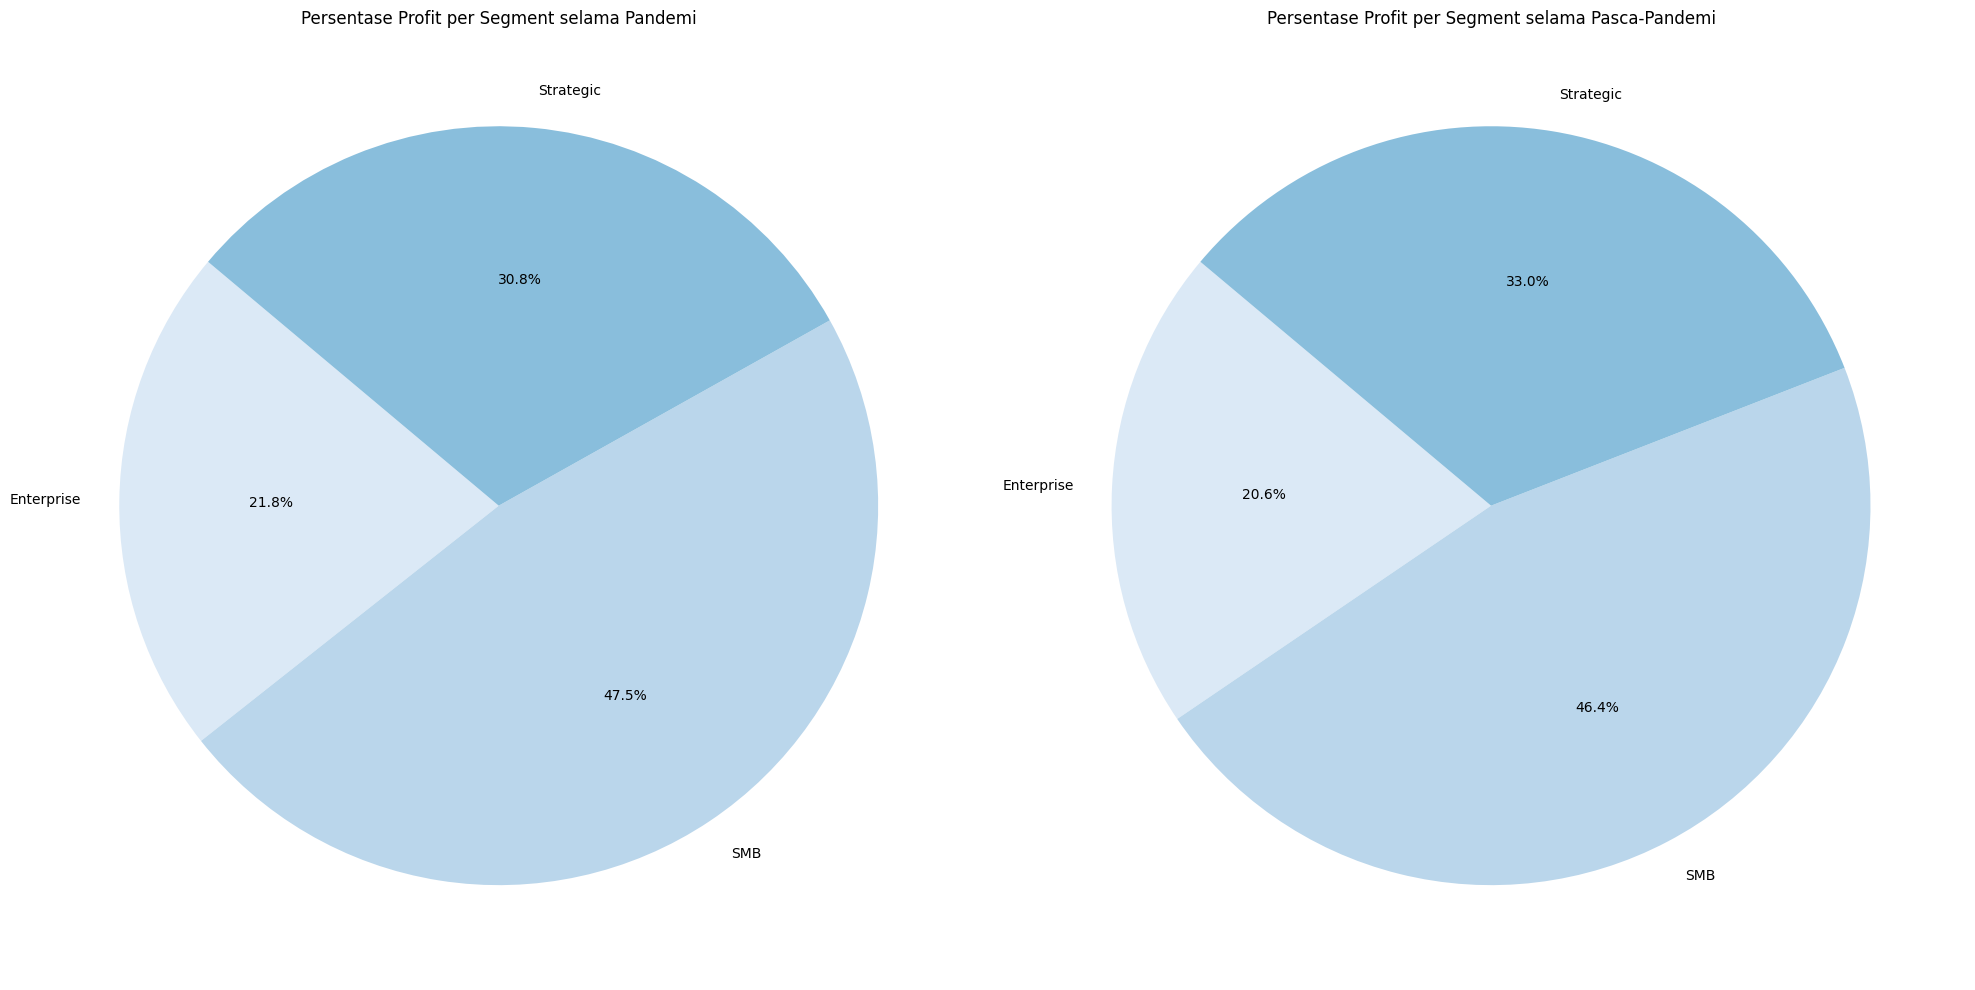

In [ ]:
# Menghitung total profit dan persentase profit untuk setiap segment selama periode pandemi
pandemic_df = df[df['Periode'] == 'Pandemi']
pandemic_profit_percent = pandemic_df.groupby("Segment")[["Profit"]].sum()
total_pandemic_profit = pandemic_profit_percent["Profit"].sum()
pandemic_profit_percent["Profit_Percentage"] = (pandemic_profit_percent["Profit"] / total_pandemic_profit) * 100

# Menghitung total profit dan persentase profit untuk setiap segment selama periode pasca-pandemi
post_pandemic_df = df[df['Periode'] == 'Pasca-Pandemi']
post_pandemic_profit_percent = post_pandemic_df.groupby("Segment")[["Profit"]].sum()
total_post_pandemic_profit = post_pandemic_profit_percent["Profit"].sum()
post_pandemic_profit_percent["Profit_Percentage"] = (post_pandemic_profit_percent["Profit"] / total_post_pandemic_profit) * 100

# Menampilkan hasil dalam bentuk dataframe
pandemic_profit_percent_df = pandemic_profit_percent.reset_index()
post_pandemic_profit_percent_df = post_pandemic_profit_percent.reset_index()

# Membuat subplot untuk periode pandemi dan pasca-pandemi
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# Pie chart untuk periode pandemi menggunakan warna default
axes[0].pie(pandemic_profit_percent["Profit_Percentage"], labels=pandemic_profit_percent_df['Segment'], autopct='%1.1f%%', startangle=140)
axes[0].set_title('Persentase Profit per Segment selama Pandemi')

# Pie chart untuk periode pasca-pandemi menggunakan warna default
axes[1].pie(post_pandemic_profit_percent["Profit_Percentage"], labels=post_pandemic_profit_percent_df['Segment'], autopct='%1.1f%%', startangle=140)
axes[1].set_title('Persentase Profit per Segment selama Pasca-Pandemi')

plt.tight_layout()
plt.show()


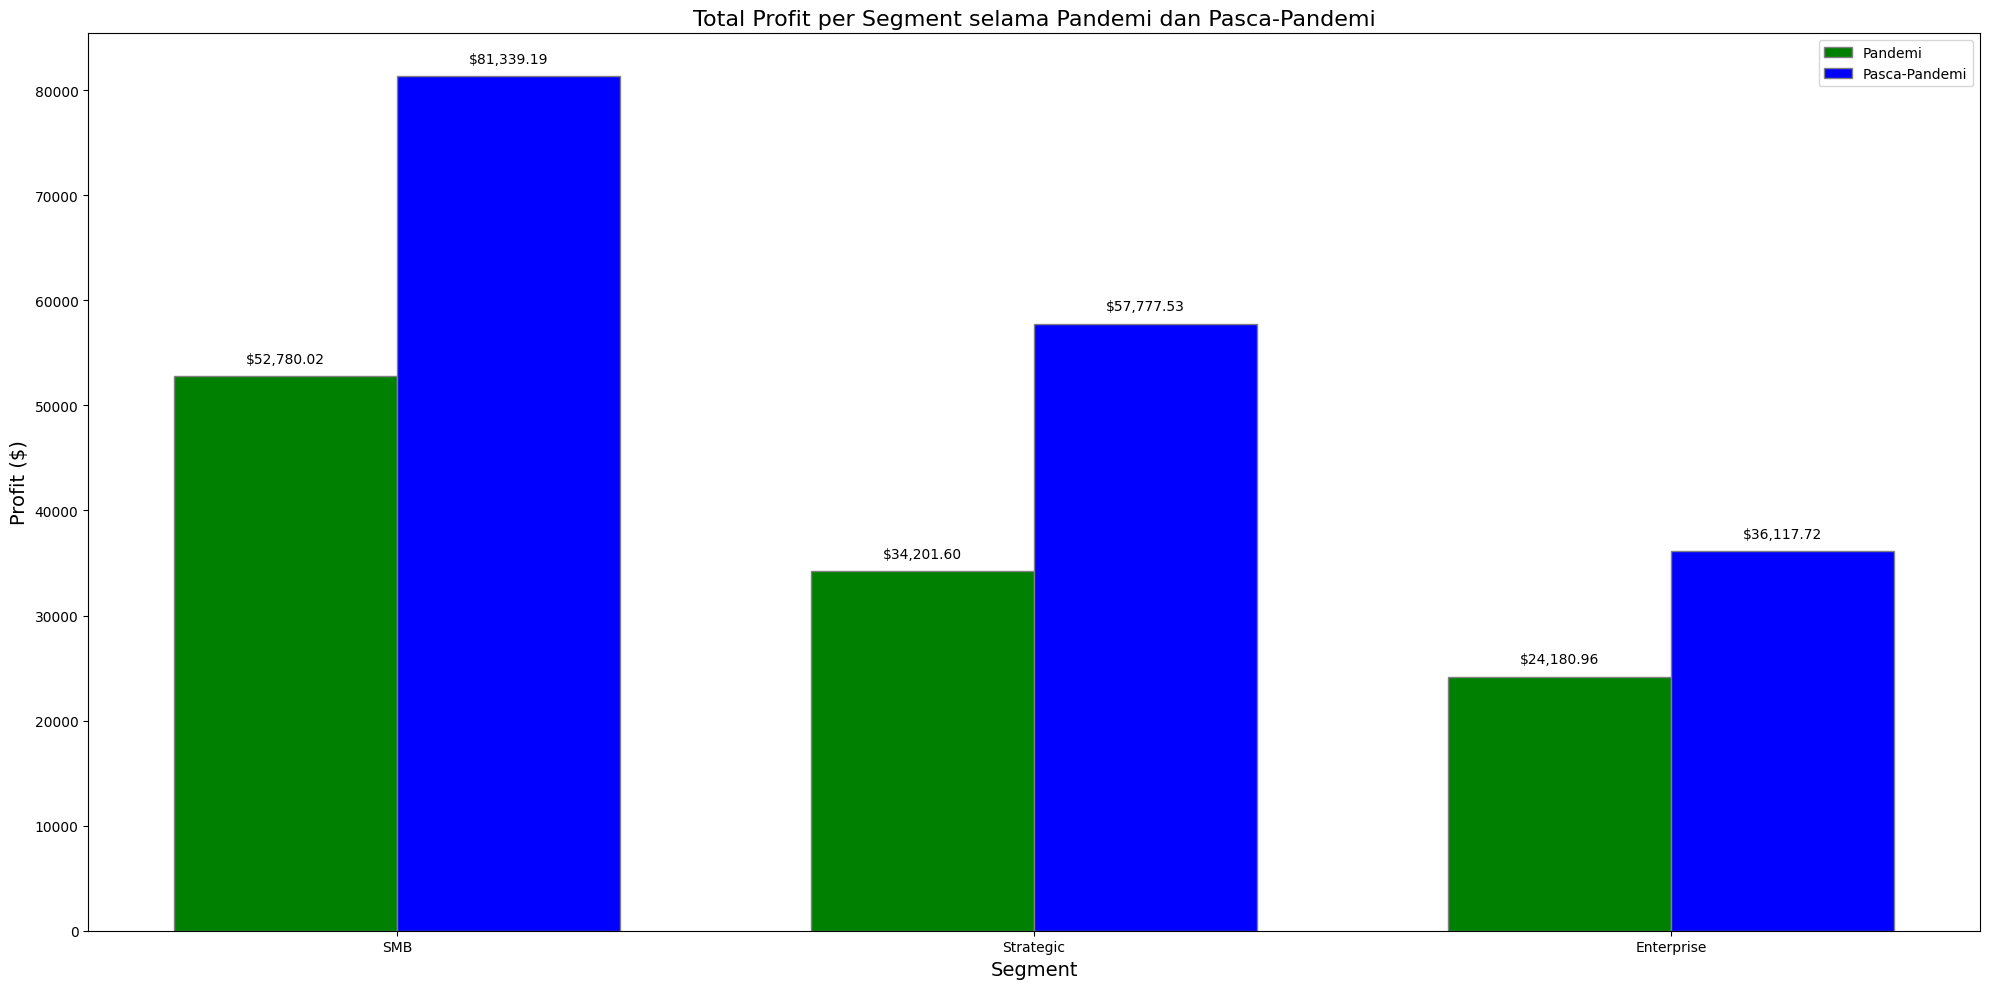

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Menghitung total profit untuk setiap segment selama periode pandemi
pandemic_df = df[df['Periode'] == 'Pandemi']
pandemic_profit = pandemic_df.groupby("Segment")[["Profit"]].sum().sort_values(by="Profit", ascending=False)

# Menghitung total profit untuk setiap segment selama periode pasca-pandemi
post_pandemic_df = df[df['Periode'] == 'Pasca-Pandemi']
post_pandemic_profit = post_pandemic_df.groupby("Segment")[["Profit"]].sum().sort_values(by="Profit", ascending=False)

# Mendefinisikan segment unik
segments = pandemic_profit.index.union(post_pandemic_profit.index)

# Mengatur posisi bar pada sumbu x
bar_width = 0.35
r1 = np.arange(len(segments))
r2 = [x + bar_width for x in r1]

# Membuat bar chart
plt.figure(figsize=(20, 10))

# Menambahkan bar untuk profit selama pandemi
plt.bar(r1, pandemic_profit.reindex(segments)["Profit"], color='green', width=bar_width, edgecolor='grey', label='Pandemi')

# Menambahkan bar untuk profit selama pasca-pandemi
plt.bar(r2, post_pandemic_profit.reindex(segments)["Profit"], color='blue', width=bar_width, edgecolor='grey', label='Pasca-Pandemi')

# Menambahkan value labels pada setiap bar
for i in range(len(r1)):
    plt.text(r1[i], pandemic_profit.reindex(segments)["Profit"].iloc[i] + 1000, f'${pandemic_profit.reindex(segments)["Profit"].iloc[i]:,.2f}', ha='center', va='bottom', fontsize=10, color='black')
    plt.text(r2[i], post_pandemic_profit.reindex(segments)["Profit"].iloc[i] + 1000, f'${post_pandemic_profit.reindex(segments)["Profit"].iloc[i]:,.2f}', ha='center', va='bottom', fontsize=10, color='black')

# Menambahkan judul dan label sumbu
plt.title('Total Profit per Segment selama Pandemi dan Pasca-Pandemi', fontsize=16)
plt.xlabel('Segment', fontsize=14)
plt.ylabel('Profit ($)', fontsize=14)
plt.xticks([r + bar_width / 2 for r in range(len(segments))], segments)

# Menambahkan legenda
plt.legend()

plt.tight_layout()
plt.show()


#### Insight Perubahan 

1. **Segmen SMB**:
    - **Pandemi**: Profit sebesar $52,780.02 dengan persentase profit 47.48%.
    - **Pasca-Pandemi**: Profit meningkat menjadi $81,339.19 dengan persentase profit 46.42%.
    - **Insight**: Segmen SMB mengalami peningkatan profit yang signifikan sebesar $28,559.17, tetapi persentase profit menurun sebesar 1.06%. Meskipun ada peningkatan dalam nilai profit, kontribusi total profit dari segmen SMB sedikit menurun.

2. **Segmen Strategic**:
    - **Pandemi**: Profit sebesar $34,201.60 dengan persentase profit 30.77%.
    - **Pasca-Pandemi**: Profit meningkat menjadi $57,777.53 dengan persentase profit 32.97%.
    - **Insight**: Segmen Strategic mencatat peningkatan profit yang signifikan sebesar $23,575.93, dan persentase profit meningkat sebesar 2.20%. Hal ini menunjukkan segmen Strategic telah tumbuh lebih cepat dan memiliki kontribusi lebih besar terhadap total profit dalam periode pasca-pandemi.

3. **Segmen Enterprise**:
    - **Pandemi**: Profit sebesar $24,180.96 dengan persentase profit 21.75%.
    - **Pasca-Pandemi**: Profit meningkat menjadi $36,117.72 dengan persentase profit 20.61%.
    - **Insight**: Segmen Enterprise mengalami peningkatan profit sebesar $11,936.76, tetapi persentase profit menurun sebesar 1.14%. Meskipun ada peningkatan dalam nilai profit, kontribusi total profit dari segmen Enterprise sedikit menurun.

In [175]:
def z_test_proportion(p1, n1, p2, n2):
    p_combined = (p1 * n1 + p2 * n2) / (n1 + n2)
    standard_error = np.sqrt(p_combined * (1 - p_combined) * (1/n1 + 1/n2))
    z = (p1 - p2) / standard_error
    p_value = stats.norm.sf(abs(z)) * 2  # two-tailed test
    return z, p_value

# Data
pandemic_profits = [52780.02, 34201.60, 24180.96]
post_pandemic_profits = [81339.19, 57777.53, 36117.72]
pandemic_percentages = [0.4748, 0.3077, 0.2175]
post_pandemic_percentages = [0.4642, 0.3297, 0.2061]

segments = ['SMB', 'Strategic', 'Enterprise']

# Perform Z-test for each segment
for i, segment in enumerate(segments):
    z, p = z_test_proportion(pandemic_percentages[i], pandemic_profits[i], post_pandemic_percentages[i], post_pandemic_profits[i])
    print(f'Segment: {segment}')
    print(f'Z-Score: {z:.2f}')
    print(f'P-Value: {p:.4f}')
    if p < 0.05:
        print("Significant difference in profit percentages between pandemic and post-pandemic periods.\n")
    else:
        print("No significant difference in profit percentages between pandemic and post-pandemic periods.\n")


Segment: SMB
Z-Score: 3.80
P-Value: 0.0001
Significant difference in profit percentages between pandemic and post-pandemic periods.

Segment: Strategic
Z-Score: -6.90
P-Value: 0.0000
Significant difference in profit percentages between pandemic and post-pandemic periods.

Segment: Enterprise
Z-Score: 3.36
P-Value: 0.0008
Significant difference in profit percentages between pandemic and post-pandemic periods.



Terdapat perbedaan proporsi profit yang signifikan untuk ketiga segment

### Analysis Pola Product dan Profit Saat Pandemi dan Setelah Pandemi

In [ ]:
import numpy as np

# Menghitung total profit dan persentase profit untuk setiap produk selama periode pandemi
pandemic_df = df[df['Periode'] == 'Pandemi']
pandemic_profit_percent = pandemic_df.groupby("Product")[["Profit"]].sum()
total_pandemic_profit = pandemic_profit_percent["Profit"].sum()
pandemic_profit_percent["Profit_Percentage"] = (pandemic_profit_percent["Profit"] / total_pandemic_profit) * 100

# Menghitung total profit dan persentase profit untuk setiap produk selama periode pasca-pandemi
post_pandemic_df = df[df['Periode'] == 'Pasca-Pandemi']
post_pandemic_profit_percent = post_pandemic_df.groupby("Product")[["Profit"]].sum()
total_post_pandemic_profit = post_pandemic_profit_percent["Profit"].sum()
post_pandemic_profit_percent["Profit_Percentage"] = (post_pandemic_profit_percent["Profit"] / total_post_pandemic_profit) * 100

# Menghitung persentase kenaikan profit, menangani kasus dengan penurunan profit
increase_percent = ((post_pandemic_profit_percent["Profit"] - pandemic_profit_percent["Profit"]) / abs(pandemic_profit_percent["Profit"])) * 100

# Menambahkan kolom persentase kenaikan profit
post_pandemic_profit_percent["Increase_Percentage"] = increase_percent.round(2)

# Membulatkan ke dua tempat desimal
pandemic_profit_percent["Profit_Percentage"] = pandemic_profit_percent["Profit_Percentage"].round(2)
post_pandemic_profit_percent["Profit_Percentage"] = post_pandemic_profit_percent["Profit_Percentage"].round(2)

# Format kolom Profit supaya memiliki separator ribuan dan dua tempat desimal
pandemic_profit_percent["Profit"] = pandemic_profit_percent["Profit"].map('{:,.2f}'.format)
post_pandemic_profit_percent["Profit"] = post_pandemic_profit_percent["Profit"].map('{:,.2f}'.format)

# Menyortir berdasarkan persentase profit dalam urutan menurun
pandemic_profit_percent = pandemic_profit_percent.sort_values("Profit_Percentage", ascending=False)
post_pandemic_profit_percent = post_pandemic_profit_percent.sort_values("Profit_Percentage", ascending=False)

# Menampilkan hasil dalam bentuk dataframe
pandemic_profit_percent_df = pandemic_profit_percent.reset_index()
post_pandemic_profit_percent_df = post_pandemic_profit_percent.reset_index()

# Menampilkan dataframes
print("Profit dan Persentase Profit Selama Pandemi:")
display(pandemic_profit_percent_df)
print("\nProfit dan Persentase Profit Selama Pasca-Pandemi:")
display(post_pandemic_profit_percent_df)


Profit dan Persentase Profit Selama Pandemi:


,Product,Profit,Profit_Percentage
0,Site Analytics,"22,206.81",19.98
1,Data Smasher,"16,599.99",14.93
2,FinanceHub,"15,792.50",14.21
3,Support,"13,406.37",12.06
4,Alchemy,"12,843.24",11.55
5,Marketing Suite - Gold,"7,671.74",6.90
6,ContactMatcher,"5,702.54",5.13
7,SaaS Connector Pack,"5,024.71",4.52
8,OneView,"4,971.40",4.47
9,SaaS Connector Pack - Gold,"3,455.67",3.11



Profit dan Persentase Profit Selama Pasca-Pandemi:


,Product,Profit,Profit_Percentage,Increase_Percentage
0,Alchemy,"42,774.58",24.41,233.05
1,Data Smasher,"25,336.65",14.46,52.63
2,Site Analytics,"22,308.92",12.73,0.46
3,Support,"19,458.10",11.10,45.14
4,FinanceHub,"16,343.92",9.33,3.49
5,Marketing Suite - Gold,"13,607.09",7.77,77.37
6,OneView,"13,166.61",7.51,164.85
7,SaaS Connector Pack,"8,034.43",4.58,59.90
8,ContactMatcher,"6,793.74",3.88,19.14
9,ChatBot Plugin,"3,635.93",2.07,25.73


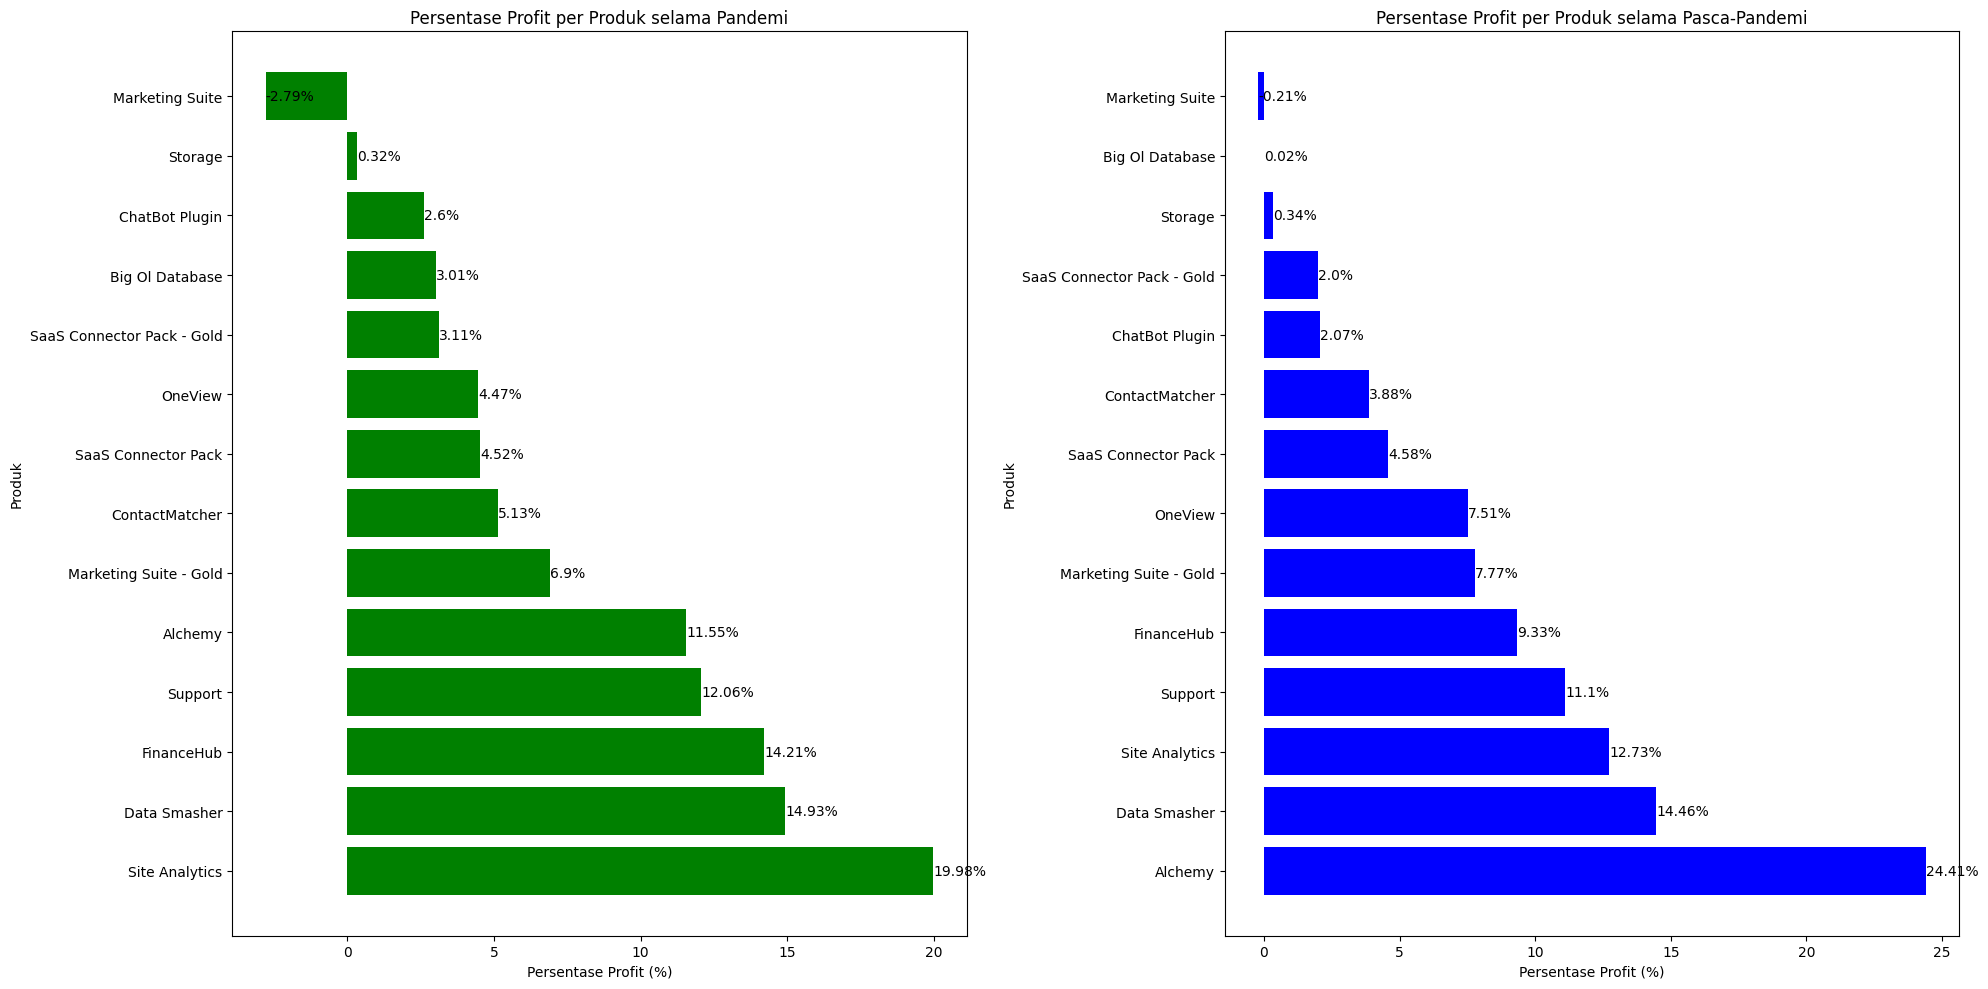

In [ ]:
# Menghitung total profit dan persentase profit untuk setiap produk selama periode pandemi
pandemic_df = df[df['Periode'] == 'Pandemi']
pandemic_profit_percent = pandemic_df.groupby("Product")[["Profit"]].sum()
total_pandemic_profit = pandemic_profit_percent["Profit"].sum()
pandemic_profit_percent["Profit_Percentage"] = (pandemic_profit_percent["Profit"] / total_pandemic_profit) * 100

# Rounding to 2 decimal places
pandemic_profit_percent["Profit_Percentage"] = pandemic_profit_percent["Profit_Percentage"].round(2)

# Formatting Profit column to include thousand separator and two decimal places
pandemic_profit_percent["Profit"] = pandemic_profit_percent["Profit"].map('{:,.2f}'.format)

# Sorting by Profit Percentage in descending order
pandemic_profit_percent = pandemic_profit_percent.sort_values("Profit_Percentage", ascending=False)

# Menghitung total profit dan persentase profit untuk setiap produk selama periode pasca-pandemi
post_pandemic_df = df[df['Periode'] == 'Pasca-Pandemi']
post_pandemic_profit_percent = post_pandemic_df.groupby("Product")[["Profit"]].sum()
total_post_pandemic_profit = post_pandemic_profit_percent["Profit"].sum()
post_pandemic_profit_percent["Profit_Percentage"] = (post_pandemic_profit_percent["Profit"] / total_post_pandemic_profit) * 100

# Rounding to 2 decimal places
post_pandemic_profit_percent["Profit_Percentage"] = post_pandemic_profit_percent["Profit_Percentage"].round(2)

# Formatting Profit column to include thousand separator and two decimal places
post_pandemic_profit_percent["Profit"] = post_pandemic_profit_percent["Profit"].map('{:,.2f}'.format)

# Sorting by Profit Percentage in descending order
post_pandemic_profit_percent = post_pandemic_profit_percent.sort_values("Profit_Percentage", ascending=False)

# Menampilkan hasil dalam bentuk dataframe
pandemic_profit_percent_df = pandemic_profit_percent.reset_index()
post_pandemic_profit_percent_df = post_pandemic_profit_percent.reset_index()

# Membuat subplot untuk periode pandemi dan pasca-pandemi
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# Barplot horizontal untuk periode pandemi
axes[0].barh(pandemic_profit_percent_df['Product'], pandemic_profit_percent_df['Profit_Percentage'], color='green')
axes[0].set_xlabel('Persentase Profit (%)')
axes[0].set_ylabel('Produk')
axes[0].set_title('Persentase Profit per Produk selama Pandemi')

# Menampilkan nilai persentase profit di atas setiap bar
for index, value in enumerate(pandemic_profit_percent_df['Profit_Percentage']):
    axes[0].text(value, index, f'{value}%', ha='left', va='center', color='black')

# Barplot horizontal untuk periode pasca-pandemi
axes[1].barh(post_pandemic_profit_percent_df['Product'], post_pandemic_profit_percent_df['Profit_Percentage'], color='blue')
axes[1].set_xlabel('Persentase Profit (%)')
axes[1].set_ylabel('Produk')
axes[1].set_title('Persentase Profit per Produk selama Pasca-Pandemi')

# Menampilkan nilai persentase profit di atas setiap bar
for index, value in enumerate(post_pandemic_profit_percent_df['Profit_Percentage']):
    axes[1].text(value, index, f'{value}%', ha='left', va='center', color='black')

plt.tight_layout()
plt.show()


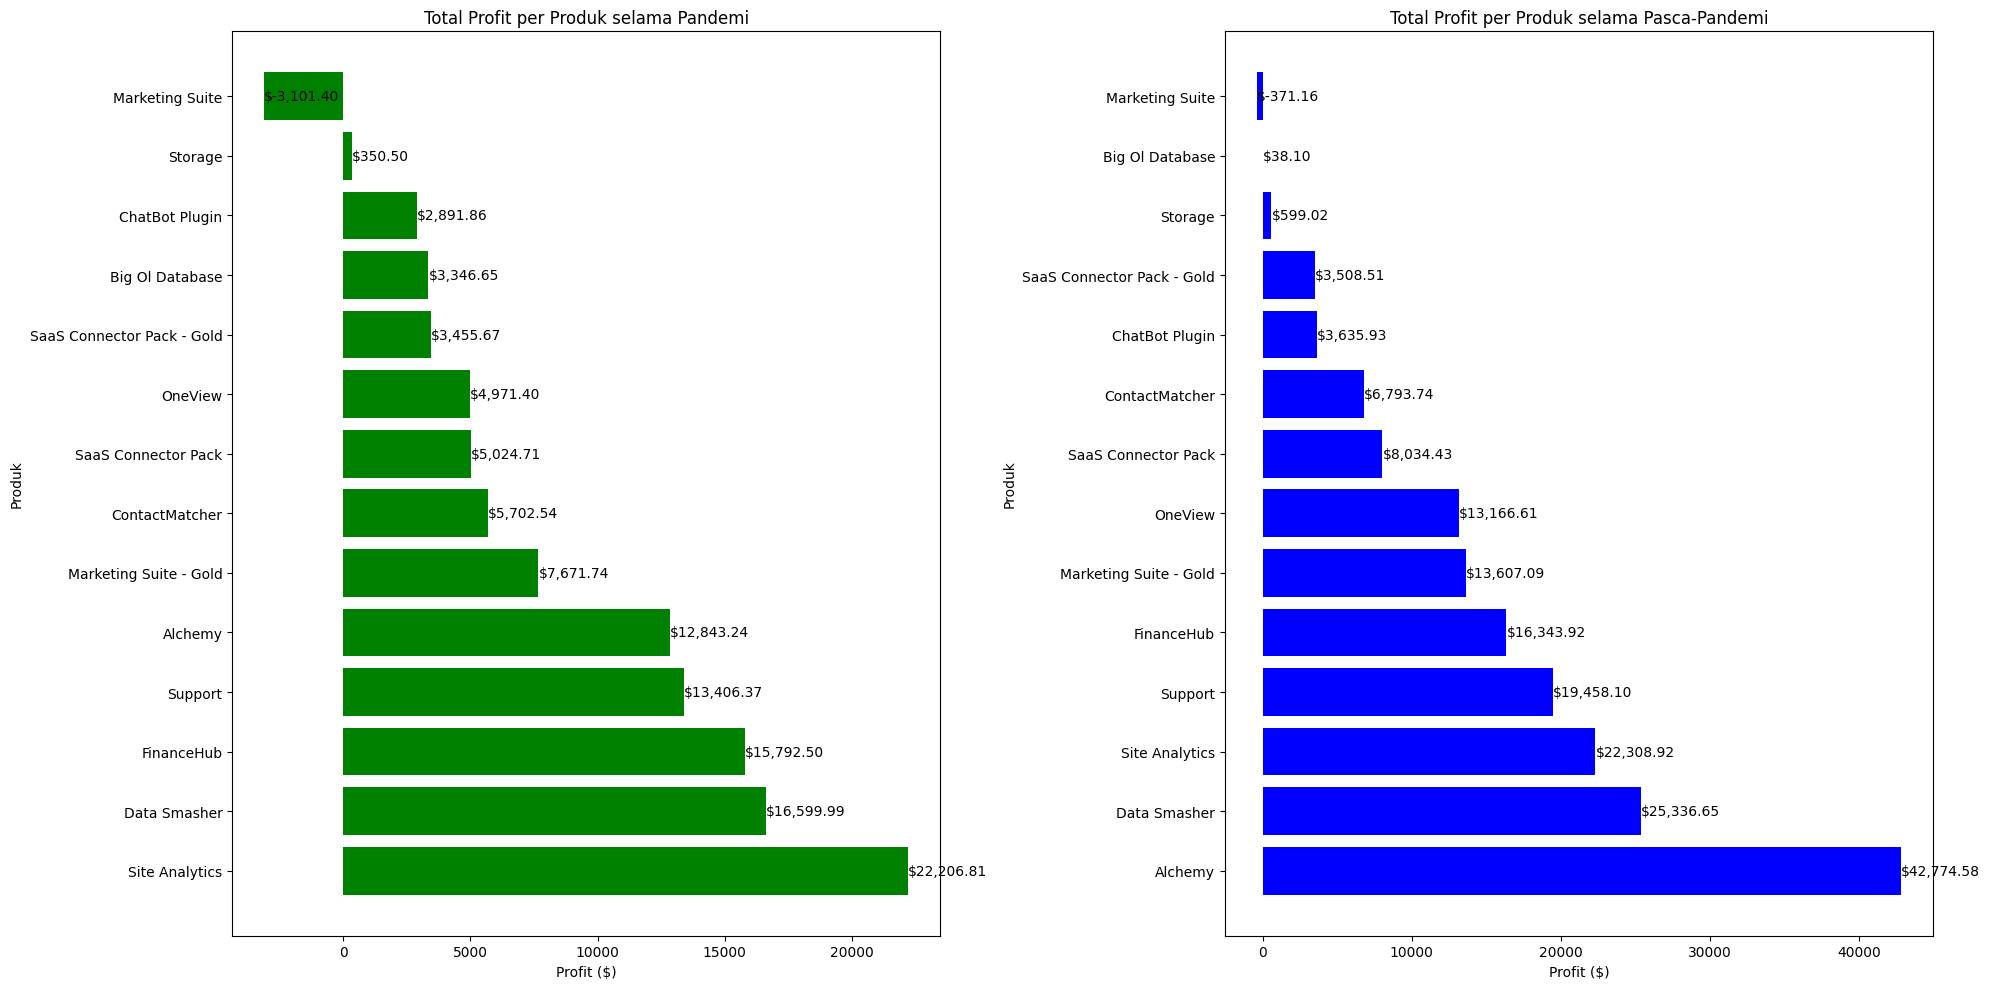

In [ ]:
# Menghitung total profit untuk setiap produk selama periode pandemi
pandemic_df = df[df['Periode'] == 'Pandemi']
pandemic_profit = pandemic_df.groupby("Product")[["Profit"]].sum().sort_values(by="Profit", ascending=False)

# Menghitung total profit untuk setiap produk selama periode pasca-pandemi
post_pandemic_df = df[df['Periode'] == 'Pasca-Pandemi']
post_pandemic_profit = post_pandemic_df.groupby("Product")[["Profit"]].sum().sort_values(by="Profit", ascending=False)

# Menampilkan hasil dalam bentuk dataframe
pandemic_profit_df = pandemic_profit.reset_index()
post_pandemic_profit_df = post_pandemic_profit.reset_index()

# Membuat subplot untuk periode pandemi dan pasca-pandemi
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# Barplot horizontal untuk periode pandemi
axes[0].barh(pandemic_profit_df['Product'], pandemic_profit['Profit'], color='green')
axes[0].set_xlabel('Profit ($)')
axes[0].set_ylabel('Produk')
axes[0].set_title('Total Profit per Produk selama Pandemi')

# Menampilkan nilai profit di atas setiap bar
for index, value in enumerate(pandemic_profit['Profit']):
    axes[0].text(value, index, f'${value:,.2f}', ha='left', va='center', color='black')

# Barplot horizontal untuk periode pasca-pandemi
axes[1].barh(post_pandemic_profit_df['Product'], post_pandemic_profit['Profit'], color='blue')
axes[1].set_xlabel('Profit ($)')
axes[1].set_ylabel('Produk')
axes[1].set_title('Total Profit per Produk selama Pasca-Pandemi')

# Menampilkan nilai profit di atas setiap bar
for index, value in enumerate(post_pandemic_profit['Profit']):
    axes[1].text(value, index, f'${value:,.2f}', ha='left', va='center', color='black')

plt.tight_layout()
plt.show()


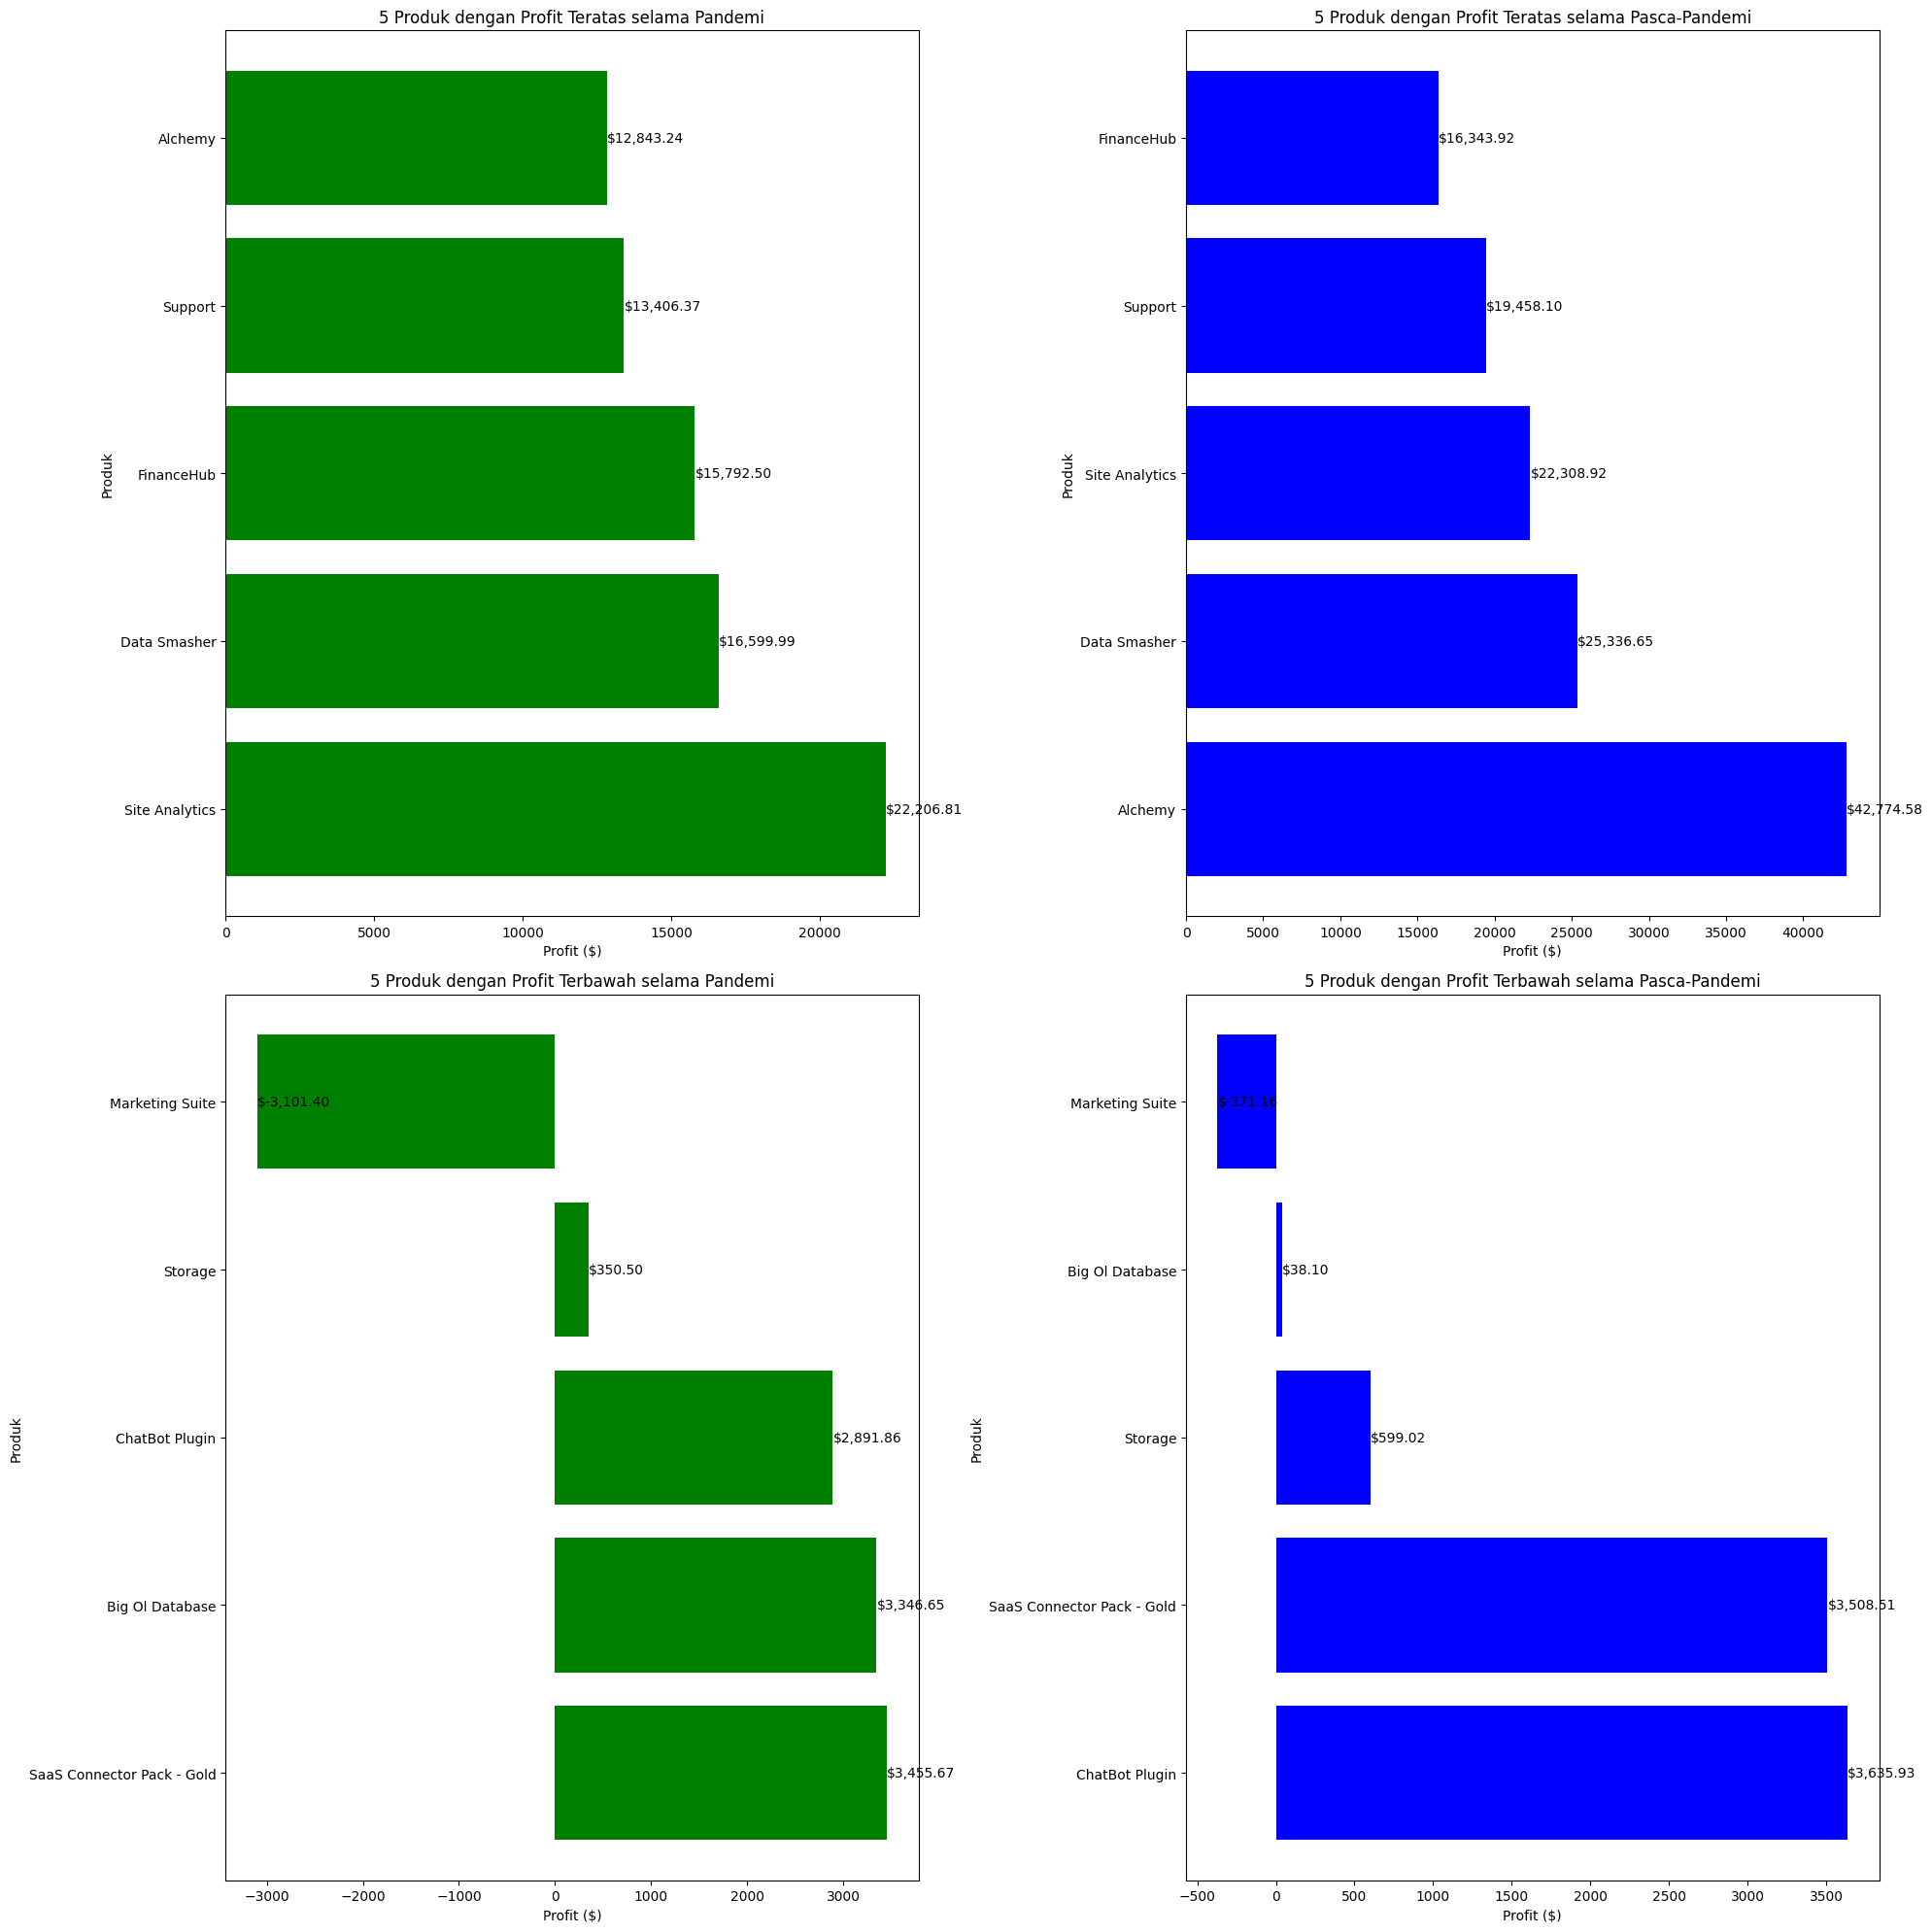

In [176]:
# Menghitung total profit untuk setiap produk selama periode pandemi
pandemic_df = df[df['Periode'] == 'Pandemi']
pandemic_profit = pandemic_df.groupby("Product")[["Profit"]].sum().sort_values(by="Profit", ascending=False)

# Menghitung total profit untuk setiap produk selama periode pasca-pandemi
post_pandemic_df = df[df['Periode'] == 'Pasca-Pandemi']
post_pandemic_profit = post_pandemic_df.groupby("Product")[["Profit"]].sum().sort_values(by="Profit", ascending=False)

# Mendapatkan 5 teratas dan 5 terbawah produk selama periode pandemi
top_5_pandemic = pandemic_profit.head(5)
bottom_5_pandemic = pandemic_profit.tail(5)

# Mendapatkan 5 teratas dan 5 terbawah produk selama periode pasca-pandemi
top_5_post_pandemic = post_pandemic_profit.head(5)
bottom_5_post_pandemic = post_pandemic_profit.tail(5)

# Membuat subplot untuk periode pandemi dan pasca-pandemi
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))

# Barplot horizontal untuk 5 teratas periode pandemi
axes[0, 0].barh(top_5_pandemic.index, top_5_pandemic['Profit'], color='green')
axes[0, 0].set_xlabel('Profit ($)')
axes[0, 0].set_ylabel('Produk')
axes[0, 0].set_title('5 Produk dengan Profit Teratas selama Pandemi')

# Menampilkan nilai profit di atas setiap bar
for index, value in enumerate(top_5_pandemic['Profit']):
    axes[0, 0].text(value, index, f'${value:,.2f}', ha='left', va='center', color='black')

# Barplot horizontal untuk 5 terbawah periode pandemi
axes[1, 0].barh(bottom_5_pandemic.index, bottom_5_pandemic['Profit'], color='green')
axes[1, 0].set_xlabel('Profit ($)')
axes[1, 0].set_ylabel('Produk')
axes[1, 0].set_title('5 Produk dengan Profit Terbawah selama Pandemi')

# Menampilkan nilai profit di atas setiap bar
for index, value in enumerate(bottom_5_pandemic['Profit']):
    axes[1, 0].text(value, index, f'${value:,.2f}', ha='left', va='center', color='black')

# Barplot horizontal untuk 5 teratas periode pasca-pandemi
axes[0, 1].barh(top_5_post_pandemic.index, top_5_post_pandemic['Profit'], color='blue')
axes[0, 1].set_xlabel('Profit ($)')
axes[0, 1].set_ylabel('Produk')
axes[0, 1].set_title('5 Produk dengan Profit Teratas selama Pasca-Pandemi')

# Menampilkan nilai profit di atas setiap bar
for index, value in enumerate(top_5_post_pandemic['Profit']):
    axes[0, 1].text(value, index, f'${value:,.2f}', ha='left', va='center', color='black')

# Barplot horizontal untuk 5 terbawah periode pasca-pandemi
axes[1, 1].barh(bottom_5_post_pandemic.index, bottom_5_post_pandemic['Profit'], color='blue')
axes[1, 1].set_xlabel('Profit ($)')
axes[1, 1].set_ylabel('Produk')
axes[1, 1].set_title('5 Produk dengan Profit Terbawah selama Pasca-Pandemi')

# Menampilkan nilai profit di atas setiap bar
for index, value in enumerate(bottom_5_post_pandemic['Profit']):
    axes[1, 1].text(value, index, f'${value:,.2f}', ha='left', va='center', color='black')

plt.tight_layout()
plt.show()


### Insight Perubahan

#### Big Ol Database
- **Pandemi**: Profit sebesar \$3,346.65 (3.01%).
- **Pasca-Pandemi**: Profit turun drastis menjadi \$38.10 (0.02%).
- **Insight**: Produk Big Ol Database mengalami penurunan profit yang sangat signifikan selama periode pasca-pandemi, menunjukkan tantangan besar dalam mempertahankan performa produk ini.



#### Marketing Suite
- **Pandemi**: Profit sebesar -\$3,101.40 (-2.79%).
- **Pasca-Pandemi**: Profit meningkat menjadi -\$371.16 (-0.21%).
- **Insight**: Meskipun masih menghasilkan profit negatif, Marketing Suite menunjukkan perbaikan signifikan selama pasca-pandemi dengan peningkatan profit sebesar 88.03%.



#### Alchemy
- **Pandemi**: Profit sebesar \$12,843.24 (11.55%).
- **Pasca-Pandemi**: Profit melonjak menjadi \$42,774.58 (24.41%).
- **Insight**: Alchemy mengalami pertumbuhan pesat dengan peningkatan profit sebesar 233.05%, menjadikannya produk dengan potensi pertumbuhan yang sangat besar.


#### One View
- **Pandemi**: Profit sebesar \$4,971.40 (4.47%).
- **Pasca-Pandemi**: Profit meningkat menjadi \$13,166.61 (7.51%).
- **Insight**: One View mencatat peningkatan profit sebesar 164.85%, menunjukkan kinerja luar biasa selama pasca-pandemi.



#### Site Analytics dan FinanceHub
- **Site Analytics**:
  - **Pandemi**: Profit sebesar \$22,206.81 (19.98%).
  - **Pasca-Pandemi**: Profit tetap stabil sebesar \$22,308.92 (12.73%).
- **FinanceHub**:
  - **Pandemi**: Profit sebesar \$15,792.50 (14.21%).
  - **Pasca-Pandemi**: Profit tetap stabil sebesar \$16,343.92 (9.33%).
- **Insight**: Kedua produk ini menunjukkan stabilitas dalam nominal profit, meskipun persentase profit sedikit menurun.



#### Data Smasher dan Support
- **Data Smasher**:
  - **Pandemi**: Profit sebesar \$16,599.99 (14.93%).
  - **Pasca-Pandemi**: Profit meningkat menjadi \$25,336.65 (14.46%).
- **Support**:
  - **Pandemi**: Profit sebesar \$13,406.37 (12.06%).
  - **Pasca-Pandemi**: Profit meningkat menjadi \$19,458.10 (11.10%).
- **Insight**: Kedua produk ini menunjukkan peningkatan profit yang sehat selama pasca-pandemi, dengan pertumbuhan berkisar antara 45% hingga 50%.


### Analysis Pola Region dan Profit Saat Pandemi dan Setelah Pandemi 

In [138]:
# Menghitung total profit dan persentase profit untuk setiap region selama periode pandemi
pandemic_df = df[df['Periode'] == 'Pandemi']
pandemic_profit_percent = pandemic_df.groupby("Region")[["Profit"]].sum()
total_pandemic_profit = pandemic_profit_percent["Profit"].sum()
pandemic_profit_percent["Profit_Percentage"] = (pandemic_profit_percent["Profit"] / total_pandemic_profit) * 100

# Menghitung total profit dan persentase profit untuk setiap region selama periode pasca-pandemi
post_pandemic_df = df[df['Periode'] == 'Pasca-Pandemi']
post_pandemic_profit_percent = post_pandemic_df.groupby("Region")[["Profit"]].sum()
total_post_pandemic_profit = post_pandemic_profit_percent["Profit"].sum()
post_pandemic_profit_percent["Profit_Percentage"] = (post_pandemic_profit_percent["Profit"] / total_post_pandemic_profit) * 100

# Menghitung persentase kenaikan profit
increase_percent = (post_pandemic_profit_percent["Profit"] - pandemic_profit_percent["Profit"]) / pandemic_profit_percent["Profit"] * 100

# Menambahkan kolom persentase kenaikan profit
post_pandemic_profit_percent["Increase_Percentage"] = increase_percent.round(2)

# Membulatkan ke dua tempat desimal
pandemic_profit_percent["Profit_Percentage"] = pandemic_profit_percent["Profit_Percentage"].round(2)
post_pandemic_profit_percent["Profit_Percentage"] = post_pandemic_profit_percent["Profit_Percentage"].round(2)

# Format kolom Profit supaya memiliki separator ribuan dan dua tempat desimal
pandemic_profit_percent["Profit"] = pandemic_profit_percent["Profit"].map('{:,.2f}'.format)
post_pandemic_profit_percent["Profit"] = post_pandemic_profit_percent["Profit"].map('{:,.2f}'.format)

# Menyortir berdasarkan persentase profit dalam urutan menurun
pandemic_profit_percent = pandemic_profit_percent.sort_values("Profit_Percentage", ascending=False)
post_pandemic_profit_percent = post_pandemic_profit_percent.sort_values("Profit_Percentage", ascending=False)

# Menampilkan hasil dalam bentuk dataframe
pandemic_profit_percent_df = pandemic_profit_percent.reset_index()
post_pandemic_profit_percent_df = post_pandemic_profit_percent.reset_index()

# Menampilkan dataframes
print("Profit dan Persentase Profit Selama Pandemi:")
display(pandemic_profit_percent_df)
print("\nProfit dan Persentase Profit Selama Pasca-Pandemi:")
display(post_pandemic_profit_percent_df)


Profit dan Persentase Profit Selama Pandemi:


,Region,Profit,Profit_Percentage
0,EMEA,"68,648.20",61.75
1,AMER,"41,781.11",37.59
2,APJ,733.26,0.66



Profit dan Persentase Profit Selama Pasca-Pandemi:


,Region,Profit,Profit_Percentage,Increase_Percentage
0,AMER,"85,645.88",48.88,104.99
1,EMEA,"78,807.84",44.97,14.80
2,APJ,"10,780.73",6.15,1370.25


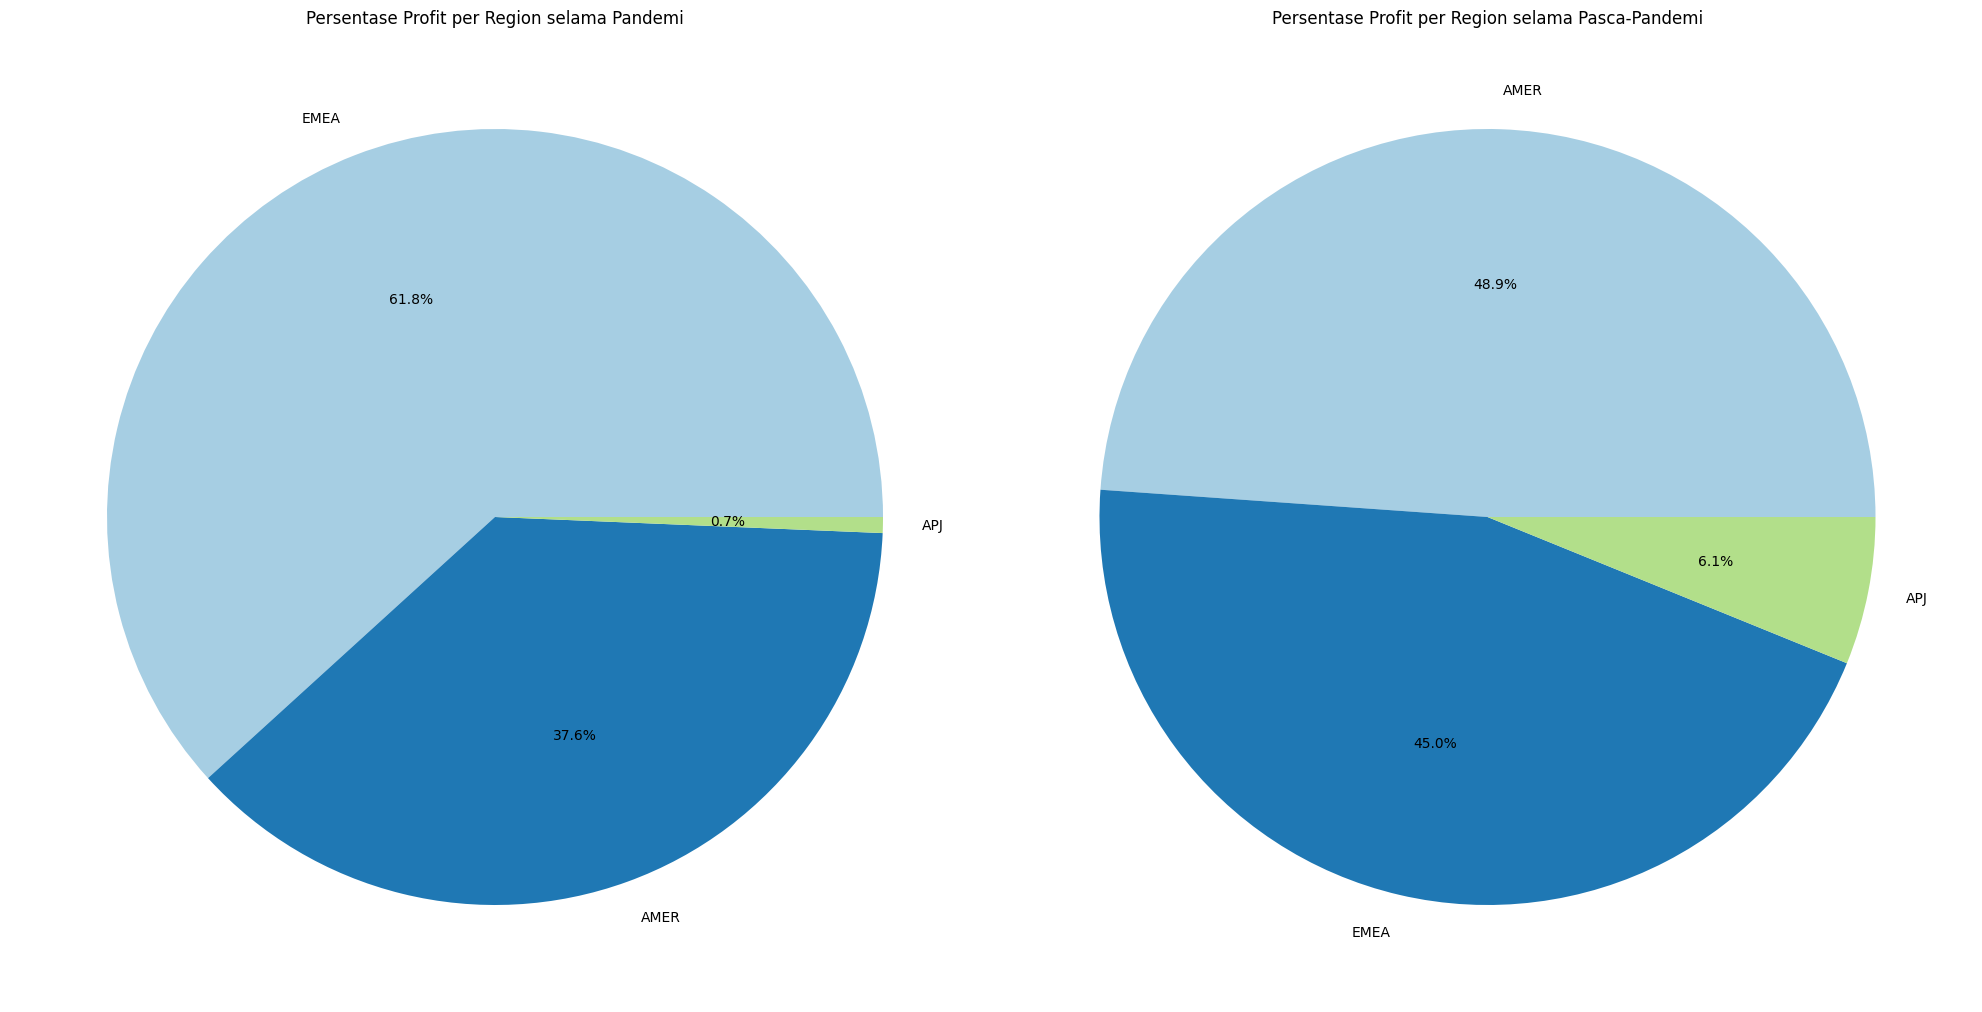

In [139]:
# Menghitung total profit dan persentase profit untuk setiap region selama periode pandemi
pandemic_df = df[df['Periode'] == 'Pandemi']
pandemic_profit_percent = pandemic_df.groupby("Region")[["Profit"]].sum()
total_pandemic_profit = pandemic_profit_percent["Profit"].sum()
pandemic_profit_percent["Profit_Percentage"] = (pandemic_profit_percent["Profit"] / total_pandemic_profit) * 100
pandemic_profit_percent["Profit_Percentage"] = pandemic_profit_percent["Profit_Percentage"].round(2)
pandemic_profit_percent["Profit"] = pandemic_profit_percent["Profit"].map('{:,.2f}'.format)
pandemic_profit_percent = pandemic_profit_percent.sort_values("Profit_Percentage", ascending=False)

# Menghitung total profit dan persentase profit untuk setiap region selama periode pasca-pandemi
post_pandemic_df = df[df['Periode'] == 'Pasca-Pandemi']
post_pandemic_profit_percent = post_pandemic_df.groupby("Region")[["Profit"]].sum()
total_post_pandemic_profit = post_pandemic_profit_percent["Profit"].sum()
post_pandemic_profit_percent["Profit_Percentage"] = (post_pandemic_profit_percent["Profit"] / total_post_pandemic_profit) * 100
post_pandemic_profit_percent["Profit_Percentage"] = post_pandemic_profit_percent["Profit_Percentage"].round(2)
post_pandemic_profit_percent["Profit"] = post_pandemic_profit_percent["Profit"].map('{:,.2f}'.format)
post_pandemic_profit_percent = post_pandemic_profit_percent.sort_values("Profit_Percentage", ascending=False)

# Membuat subplot untuk periode pandemi dan pasca-pandemi
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# Pie chart untuk periode pandemi
axes[0].pie(pandemic_profit_percent['Profit_Percentage'], labels=pandemic_profit_percent.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
axes[0].set_title('Persentase Profit per Region selama Pandemi')

# Pie chart untuk periode pasca-pandemi
axes[1].pie(post_pandemic_profit_percent['Profit_Percentage'], labels=post_pandemic_profit_percent.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
axes[1].set_title('Persentase Profit per Region selama Pasca-Pandemi')

plt.tight_layout()
plt.show()


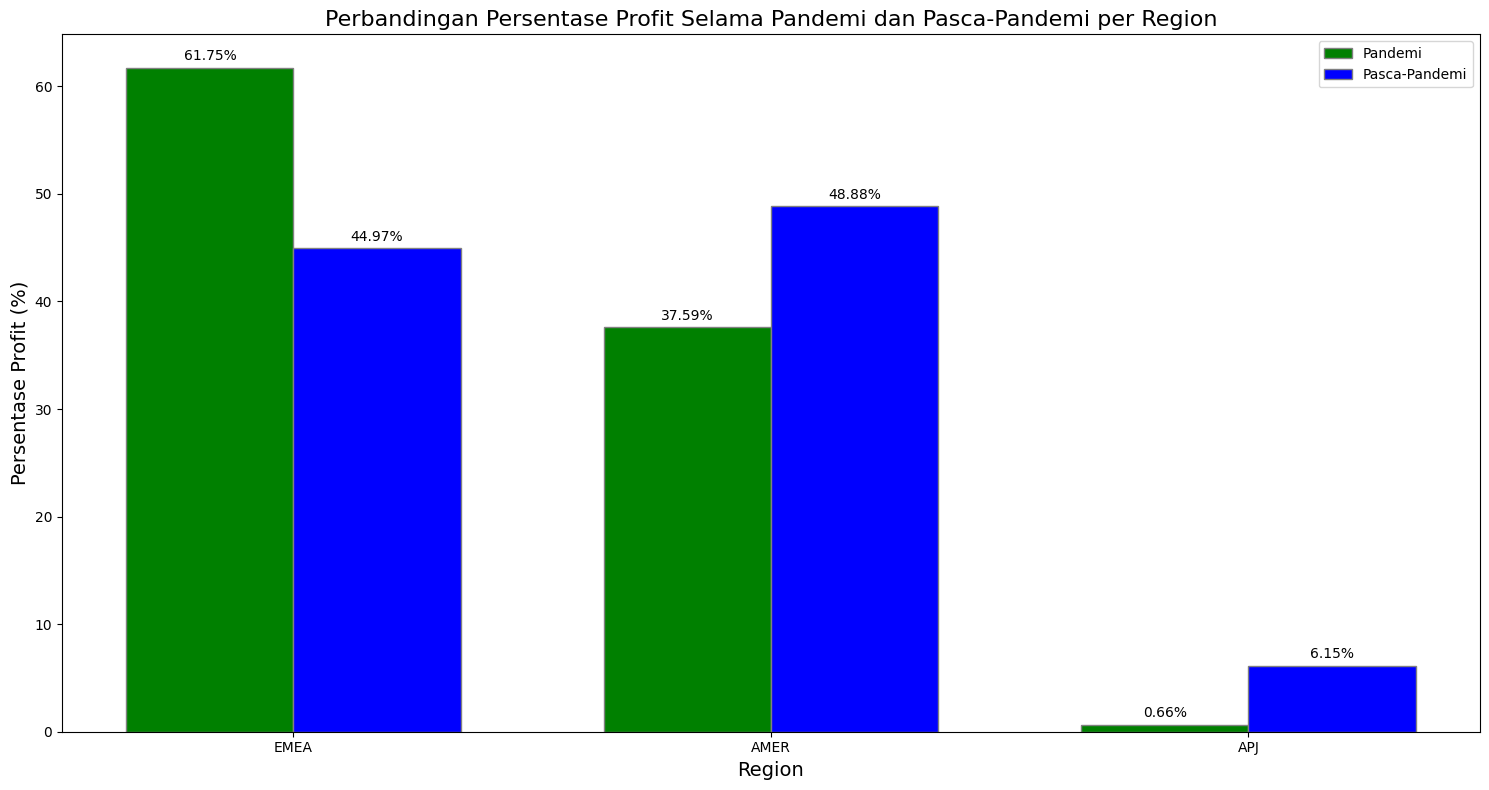

In [140]:
import matplotlib.pyplot as plt
import numpy as np

# Data untuk region selama pandemi dan pasca-pandemi
regions = ['EMEA', 'AMER', 'APJ']
pandemic_percentage = [61.75, 37.59, 0.66]
post_pandemic_percentage = [44.97, 48.88, 6.15]

# Mengatur posisi bar pada sumbu x
bar_width = 0.35
bar_positions = np.arange(len(regions))

# Plotting
fig, ax = plt.subplots(figsize=(15, 8))

# Membuat bar untuk persentase profit selama pandemi dan pasca-pandemi
bars1 = ax.bar(bar_positions - bar_width/2, pandemic_percentage, color='green', width=bar_width, edgecolor='grey', label='Pandemi')
bars2 = ax.bar(bar_positions + bar_width/2, post_pandemic_percentage, color='blue', width=bar_width, edgecolor='grey', label='Pasca-Pandemi')

# Menambahkan label nilai di atas bar
for bar in bars1:
    height = bar.get_height()
    ax.annotate(f'{height:,.2f}%',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

for bar in bars2:
    height = bar.get_height()
    ax.annotate(f'{height:,.2f}%',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

# Menambahkan judul utama dan label sumbu
ax.set_title('Perbandingan Persentase Profit Selama Pandemi dan Pasca-Pandemi per Region', fontsize=16)
ax.set_xlabel('Region', fontsize=14)
ax.set_ylabel('Persentase Profit (%)', fontsize=14)

# Menambahkan label x-ticks pada sumbu x
ax.set_xticks(bar_positions)
ax.set_xticklabels(regions)

# Menambahkan legenda
ax.legend()

plt.tight_layout()
plt.show()

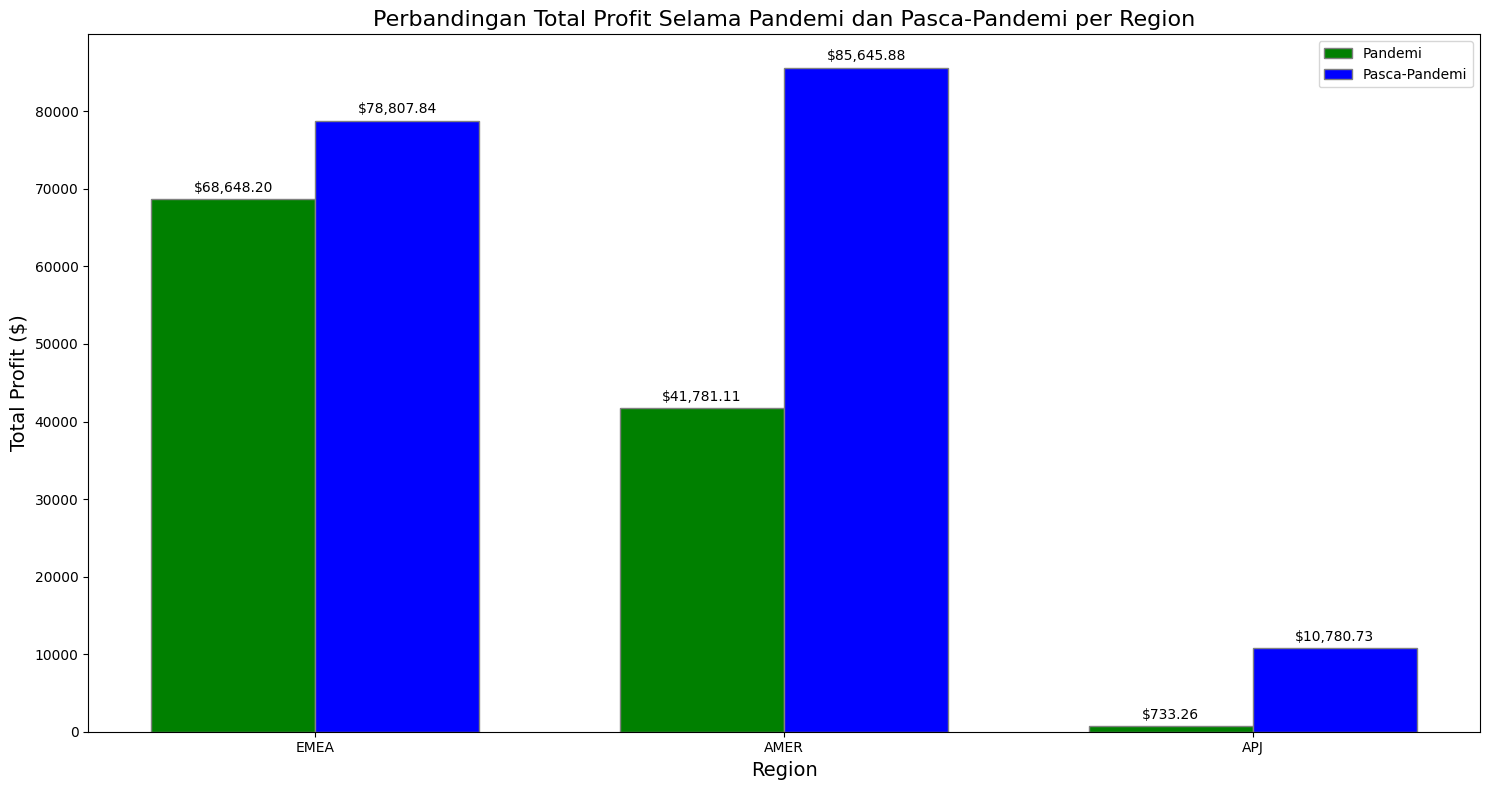

In [141]:
import matplotlib.pyplot as plt
import numpy as np

# Data untuk region selama pandemi dan pasca-pandemi
regions = ['EMEA', 'AMER', 'APJ']
pandemic_profit = [68648.20, 41781.11, 733.26]
post_pandemic_profit = [78807.84, 85645.88, 10780.73]

# Mengatur posisi bar pada sumbu x
bar_width = 0.35
bar_positions = np.arange(len(regions))

# Plotting
fig, ax = plt.subplots(figsize=(15, 8))

# Membuat bar untuk total profit selama pandemi dan pasca-pandemi
bars1 = ax.bar(bar_positions - bar_width/2, pandemic_profit, color='green', width=bar_width, edgecolor='grey', label='Pandemi')
bars2 = ax.bar(bar_positions + bar_width/2, post_pandemic_profit, color='blue', width=bar_width, edgecolor='grey', label='Pasca-Pandemi')

# Menambahkan label nilai di atas bar
for bar in bars1:
    height = bar.get_height()
    ax.annotate(f'${height:,.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

for bar in bars2:
    height = bar.get_height()
    ax.annotate(f'${height:,.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

# Menambahkan judul utama dan label sumbu
ax.set_title('Perbandingan Total Profit Selama Pandemi dan Pasca-Pandemi per Region', fontsize=16)
ax.set_xlabel('Region', fontsize=14)
ax.set_ylabel('Total Profit ($)', fontsize=14)

# Menambahkan label x-ticks pada sumbu x
ax.set_xticks(bar_positions)
ax.set_xticklabels(regions)

# Menambahkan legenda
ax.legend()

plt.tight_layout()
plt.show()


#### Insight Perubahan 

1. **Region APJ**:
    - **Pandemi**: Profit sebesar $733.26 dengan persentase profit 0.66%.
    - **Pasca-Pandemi**: Profit meningkat menjadi $10,780.73 dengan persentase profit 6.15%.
    - **Insight**: Region APJ mengalami peningkatan profit yang sangat signifikan sebesar $10,047.47 dan persentase profit meningkat sebesar 5.49%. APJ mengalami lonjakan luar biasa dalam profit, menunjukkan kebangkitan pasar yang kuat di region ini setelah pandemi.

2. **Region AMER**:
    - **Pandemi**: Profit sebesar $41,781.11 dengan persentase profit 37.59%.
    - **Pasca-Pandemi**: Profit meningkat menjadi $85,645.88 dengan persentase profit 48.88%.
    - **Insight**: Region AMER mengalami peningkatan profit yang signifikan dari $41,781.11 selama pandemi menjadi $85,645.88 setelah pandemi. Ini menunjukkan penguatan luar biasa dalam Region AMER dengan peningkatan profit yang hampir mencapai 2.05 kali lipat. Keberhasilan ini mencerminkan stabilitas dan pertumbuhan dalam industri di AMER selama pemulihan ekonomi.

3. **Region EMEA**:
    - **Pandemi**: Profit sebesar $68,648.20 dengan persentase profit 61.75%.
    - **Pasca-Pandemi**: Profit meningkat mencapai $78,807.84 dengan persentase profit 44.97%.
    - **Insight**: Region EMEA mengalami peningkatan profit sebesar $10,159.64, namun persentase profit turun sebesar 16.78%. Ini menunjukkan bahwa, meskipun ada peningkatan profit nominal, kontribusi EMEA terhadap total profit menurun, mengindikasikan bahwa pertumbuhannya tidak secepat AMER dan APJ.

Dari data di atas, **Region APJ** menunjukkan perubahan terbesar dengan peningkatan profit yang sangat signifikan setelah pandemi. Produk ini mengalami peningkatan profit sebesar $10,047.47. atau mengalami peningkata sebanyak 1370% dibanding saat pandemi


### Uji Hipotesis Profit tiap Region saat dan setelah pandemi

In [142]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

# Menghitung total profit dan persentase profit untuk setiap region selama periode pandemi
pandemic_df = df[df['Periode'] == 'Pandemi']
pandemic_profit_percent = pandemic_df.groupby("Region")[["Profit"]].sum()
total_pandemic_profit = pandemic_profit_percent["Profit"].sum()
pandemic_profit_percent["Profit_Percentage"] = (pandemic_profit_percent["Profit"] / total_pandemic_profit) * 100

# Menghitung total profit dan persentase profit untuk setiap region selama periode pasca-pandemi
post_pandemic_df = df[df['Periode'] == 'Pasca-Pandemi']
post_pandemic_profit_percent = post_pandemic_df.groupby("Region")[["Profit"]].sum()
total_post_pandemic_profit = post_pandemic_profit_percent["Profit"].sum()
post_pandemic_profit_percent["Profit_Percentage"] = (post_pandemic_profit_percent["Profit"] / total_post_pandemic_profit) * 100

# Menghitung persentase kenaikan profit
increase_percent = (post_pandemic_profit_percent["Profit"] - pandemic_profit_percent["Profit"]) / pandemic_profit_percent["Profit"] * 100

# Menambahkan kolom persentase kenaikan profit
post_pandemic_profit_percent["Increase_Percentage"] = increase_percent.round(2)

# Membulatkan ke dua tempat desimal
pandemic_profit_percent["Profit_Percentage"] = pandemic_profit_percent["Profit_Percentage"].round(2)
post_pandemic_profit_percent["Profit_Percentage"] = post_pandemic_profit_percent["Profit_Percentage"].round(2)

# Format kolom Profit supaya memiliki separator ribuan dan dua tempat desimal
pandemic_profit_percent["Profit"] = pandemic_profit_percent["Profit"].map('{:,.2f}'.format)
post_pandemic_profit_percent["Profit"] = post_pandemic_profit_percent["Profit"].map('{:,.2f}'.format)

# Menyortir berdasarkan persentase profit dalam urutan menurun
pandemic_profit_percent = pandemic_profit_percent.sort_values("Profit_Percentage", ascending=False)
post_pandemic_profit_percent = post_pandemic_profit_percent.sort_values("Profit_Percentage", ascending=False)

# Menampilkan hasil dalam bentuk dataframe
pandemic_profit_percent_df = pandemic_profit_percent.reset_index()
post_pandemic_profit_percent_df = post_pandemic_profit_percent.reset_index()

# Melakukan Z-test untuk perbedaan proporsi profit pada semua region
regions = pandemic_profit_percent_df["Region"]

for region in regions:
    pandemic_profit = pandemic_profit_percent_df[pandemic_profit_percent_df["Region"] == region]["Profit_Percentage"].values[0]
    post_pandemic_profit = post_pandemic_profit_percent_df[post_pandemic_profit_percent_df["Region"] == region]["Profit_Percentage"].values[0]
    
    successes = [post_pandemic_profit * total_post_pandemic_profit / 100, pandemic_profit * total_pandemic_profit / 100]
    counts = [total_post_pandemic_profit, total_pandemic_profit]
    
    z_stat, p_val = proportions_ztest(successes, counts)
    result = "berbeda" if p_val < 0.01 else "tidak berbeda"
    
    print(f"Region {region}: Z-statistik: {z_stat:.5f}, P-value: {p_val:.5f}, Perbedaan: {result}")


Region EMEA: Z-statistik: -87.56244, P-value: 0.00000, Perbedaan: berbeda
Region AMER: Z-statistik: 59.24808, P-value: 0.00000, Perbedaan: berbeda
Region APJ: Z-statistik: 72.89876, P-value: 0.00000, Perbedaan: berbeda


Setelah uji hipotesis dapat dikatakan bahwa proporsi profit dari tiap region dari saat pandemi dan pasca pandemi memiliki proporsi (persentase profit) yang berbeda semua

### Insight akhir pola Profit pandemi dan pasca pandemi Tiap region
Berdasarkan analisis proporsi profit untuk tiap region, ditemukan bahwa persentase profit berbeda secara signifikan antara periode pandemi dan pasca-pandemi. Dimana region EMEA bahwa pertumbuhannya tidak secepat AMER dan APJ. Dan **Region APJ** menunjukkan perubahan terbesar dengan peningkatan profit yang sangat signifikan setelah pandemi. Produk ini mengalami peningkatan profit sebesar $10,047.47. atau mengalami peningkata sebanyak 1370% dibanding saat pandemi

### Pola Profit tiap Sub-Region saat dan setelah pandemi

In [153]:
# Calculate total profit and profit percentage for each subregion during the pandemic period
pandemic_df = df[df['Periode'] == 'Pandemi']
pandemic_profit_percent = pandemic_df.groupby(["Region", "Subregion"])[["Profit"]].sum()
total_pandemic_profit = pandemic_profit_percent["Profit"].sum()
pandemic_profit_percent["Profit_Percentage"] = (pandemic_profit_percent["Profit"] / total_pandemic_profit) * 100

# Calculate total profit and profit percentage for each subregion during the post-pandemic period
post_pandemic_df = df[df['Periode'] == 'Pasca-Pandemi']
post_pandemic_profit_percent = post_pandemic_df.groupby(["Region", "Subregion"])[["Profit"]].sum()
total_post_pandemic_profit = post_pandemic_profit_percent["Profit"].sum()
post_pandemic_profit_percent["Profit_Percentage"] = (post_pandemic_profit_percent["Profit"] / total_post_pandemic_profit) * 100

# Calculate the percentage increase in profit
increase_percent = (post_pandemic_profit_percent["Profit"] - pandemic_profit_percent["Profit"]) / pandemic_profit_percent["Profit"] * 100

# Add the increase percentage column
post_pandemic_profit_percent["Increase_Percentage"] = increase_percent.round(2)

# Round to two decimal places
pandemic_profit_percent["Profit_Percentage"] = pandemic_profit_percent["Profit_Percentage"].round(2)
post_pandemic_profit_percent["Profit_Percentage"] = post_pandemic_profit_percent["Profit_Percentage"].round(2)

# Format the Profit column to have thousand separators and two decimal places
pandemic_profit_percent["Profit"] = pandemic_profit_percent["Profit"].map('{:,.2f}'.format)
post_pandemic_profit_percent["Profit"] = post_pandemic_profit_percent["Profit"].map('{:,.2f}'.format)

# Sort by region and then profit percentage within each region in descending order
pandemic_profit_percent = pandemic_profit_percent.sort_values(by=["Region", "Profit_Percentage"], ascending=[True, False])
post_pandemic_profit_percent = post_pandemic_profit_percent.sort_values(by=["Region", "Profit_Percentage"], ascending=[True, False])

# Display results as dataframes
pandemic_profit_percent_df = pandemic_profit_percent.reset_index()
post_pandemic_profit_percent_df = post_pandemic_profit_percent.reset_index()

# Display dataframes
print("Profit dan Persentase Profit Selama Pandemi:")
display(pandemic_profit_percent_df)
print("\nProfit dan Persentase Profit Selama Pasca-Pandemi:")
display(post_pandemic_profit_percent_df)


Profit dan Persentase Profit Selama Pandemi:


,Region,Subregion,Profit,Profit_Percentage
0,AMER,NAMER,"38,945.21",35.03
1,AMER,LATAM,"2,835.91",2.55
2,APJ,APAC,"12,274.64",11.04
3,APJ,IND,"2,858.28",2.57
4,APJ,ANZ,"-2,748.46",-2.47
5,APJ,JAPN,"-11,651.20",-10.48
6,EMEA,UKIR,"38,257.84",34.42
7,EMEA,EU-WEST,"15,285.06",13.75
8,EMEA,NOR,"5,250.58",4.72
9,EMEA,MEA,"4,117.00",3.70



Profit dan Persentase Profit Selama Pasca-Pandemi:


,Region,Subregion,Profit,Profit_Percentage,Increase_Percentage
0,AMER,NAMER,"70,838.83",40.43,81.89
1,AMER,LATAM,"14,807.05",8.45,422.13
2,APJ,APAC,"18,036.54",10.29,46.94
3,APJ,IND,"15,524.66",8.86,443.15
4,APJ,ANZ,"-8,702.31",-4.97,216.63
5,APJ,JAPN,"-14,078.16",-8.03,20.83
6,EMEA,UKIR,"46,980.41",26.81,22.80
7,EMEA,EU-WEST,"11,421.55",6.52,-25.28
8,EMEA,NOR,"10,794.18",6.16,105.58
9,EMEA,EU,"5,252.56",3.00,66.79


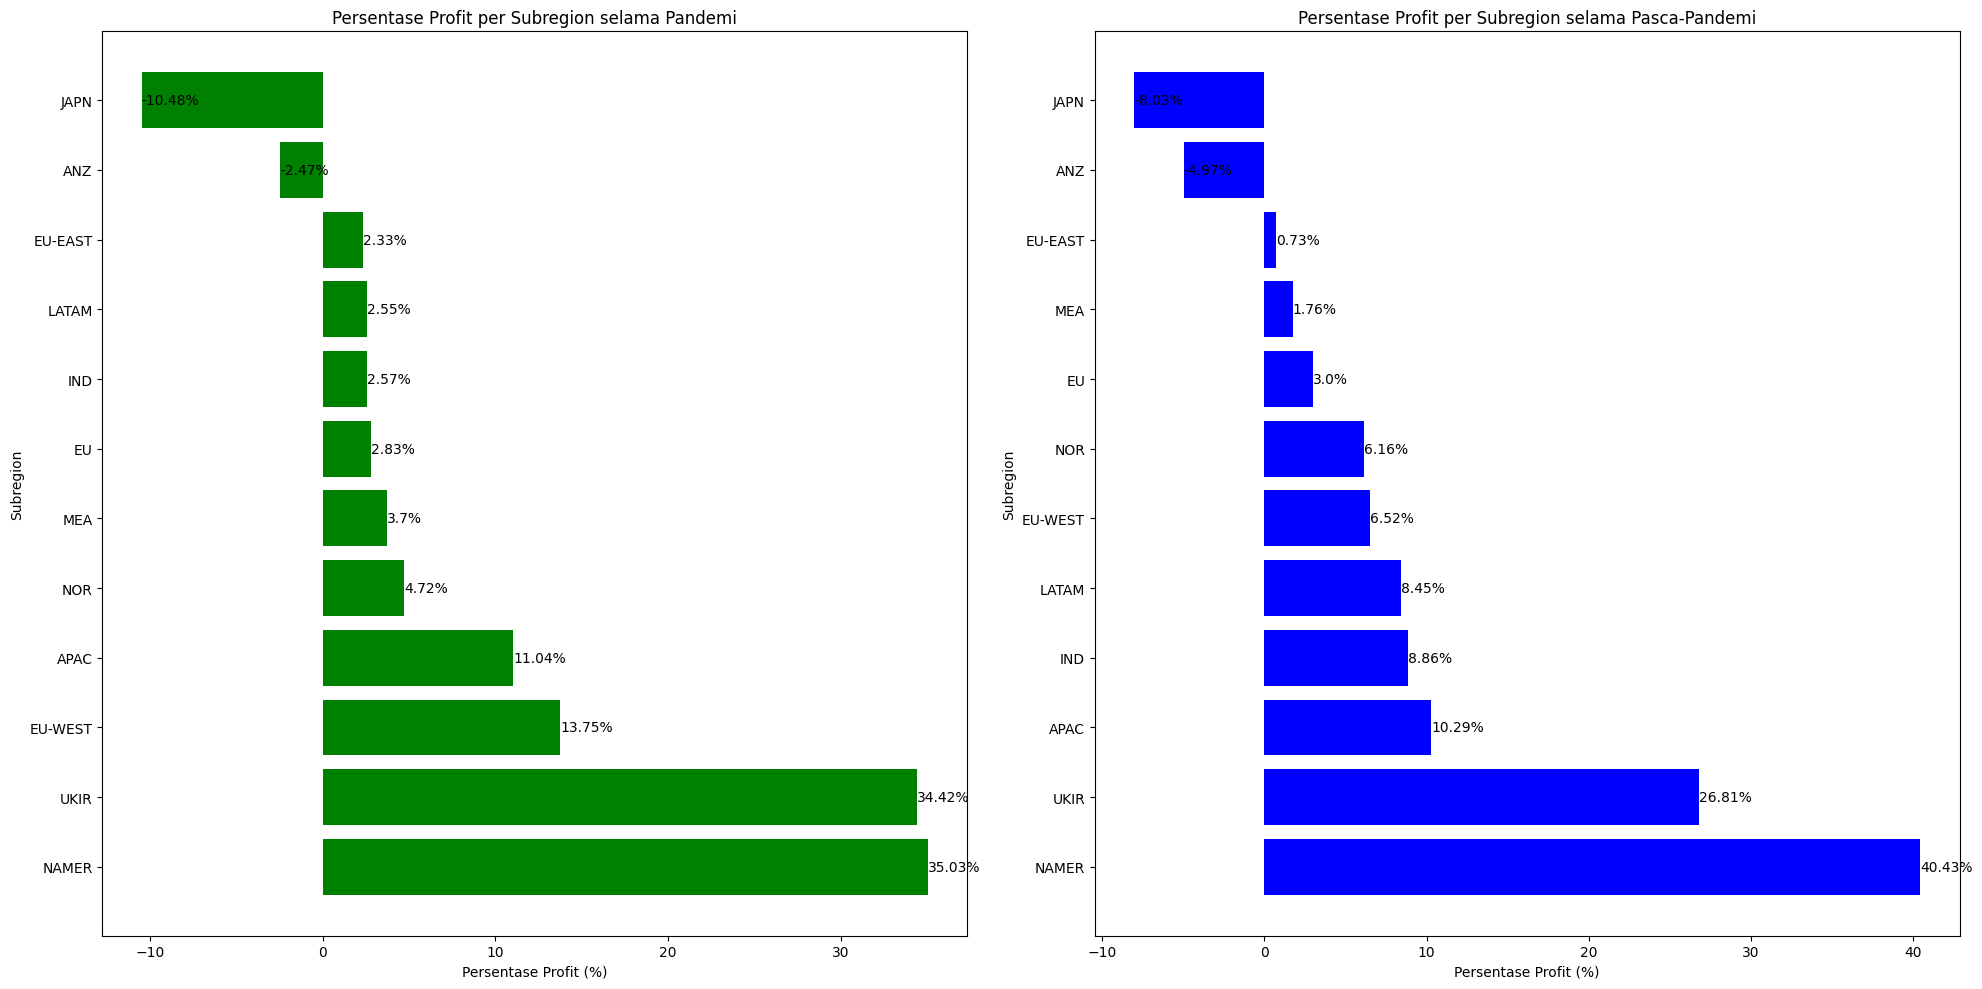

In [154]:
# Menghitung total profit dan persentase profit untuk setiap subregion selama periode pandemi
pandemic_df = df[df['Periode'] == 'Pandemi']
pandemic_profit_percent = pandemic_df.groupby(["Region", "Subregion"])[["Profit"]].sum()
total_pandemic_profit = pandemic_profit_percent["Profit"].sum()
pandemic_profit_percent["Profit_Percentage"] = (pandemic_profit_percent["Profit"] / total_pandemic_profit) * 100

# Membulatkan ke dua tempat desimal
pandemic_profit_percent["Profit_Percentage"] = pandemic_profit_percent["Profit_Percentage"].round(2)

# Memformat kolom Profit supaya memiliki separator ribuan dan dua tempat desimal
pandemic_profit_percent["Profit"] = pandemic_profit_percent["Profit"].map('{:,.2f}'.format)

# Menyortir berdasarkan persentase profit dalam urutan menurun
pandemic_profit_percent = pandemic_profit_percent.sort_values("Profit_Percentage", ascending=False)

# Menghitung total profit dan persentase profit untuk setiap subregion selama periode pasca-pandemi
post_pandemic_df = df[df['Periode'] == 'Pasca-Pandemi']
post_pandemic_profit_percent = post_pandemic_df.groupby(["Region", "Subregion"])[["Profit"]].sum()
total_post_pandemic_profit = post_pandemic_profit_percent["Profit"].sum()
post_pandemic_profit_percent["Profit_Percentage"] = (post_pandemic_profit_percent["Profit"] / total_post_pandemic_profit) * 100

# Membulatkan ke dua tempat desimal
post_pandemic_profit_percent["Profit_Percentage"] = post_pandemic_profit_percent["Profit_Percentage"].round(2)

# Memformat kolom Profit supaya memiliki separator ribuan dan dua tempat desimal
post_pandemic_profit_percent["Profit"] = post_pandemic_profit_percent["Profit"].map('{:,.2f}'.format)

# Menyortir berdasarkan persentase profit dalam urutan menurun
post_pandemic_profit_percent = post_pandemic_profit_percent.sort_values("Profit_Percentage", ascending=False)

# Menampilkan hasil dalam bentuk dataframe
pandemic_profit_percent_df = pandemic_profit_percent.reset_index()
post_pandemic_profit_percent_df = post_pandemic_profit_percent.reset_index()

# Membuat subplot untuk periode pandemi dan pasca-pandemi
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# Barplot horizontal untuk periode pandemi
axes[0].barh(pandemic_profit_percent_df['Subregion'], pandemic_profit_percent_df['Profit_Percentage'], color='green')
axes[0].set_xlabel('Persentase Profit (%)')
axes[0].set_ylabel('Subregion')
axes[0].set_title('Persentase Profit per Subregion selama Pandemi')

# Menampilkan nilai persentase profit di atas setiap bar
for index, value in enumerate(pandemic_profit_percent_df['Profit_Percentage']):
    axes[0].text(value, index, f'{value}%', ha='left', va='center', color='black')

# Barplot horizontal untuk periode pasca-pandemi
axes[1].barh(post_pandemic_profit_percent_df['Subregion'], post_pandemic_profit_percent_df['Profit_Percentage'], color='blue')
axes[1].set_xlabel('Persentase Profit (%)')
axes[1].set_ylabel('Subregion')
axes[1].set_title('Persentase Profit per Subregion selama Pasca-Pandemi')

# Menampilkan nilai persentase profit di atas setiap bar
for index, value in enumerate(post_pandemic_profit_percent_df['Profit_Percentage']):
    axes[1].text(value, index, f'{value}%', ha='left', va='center', color='black')

plt.tight_layout()
plt.show()


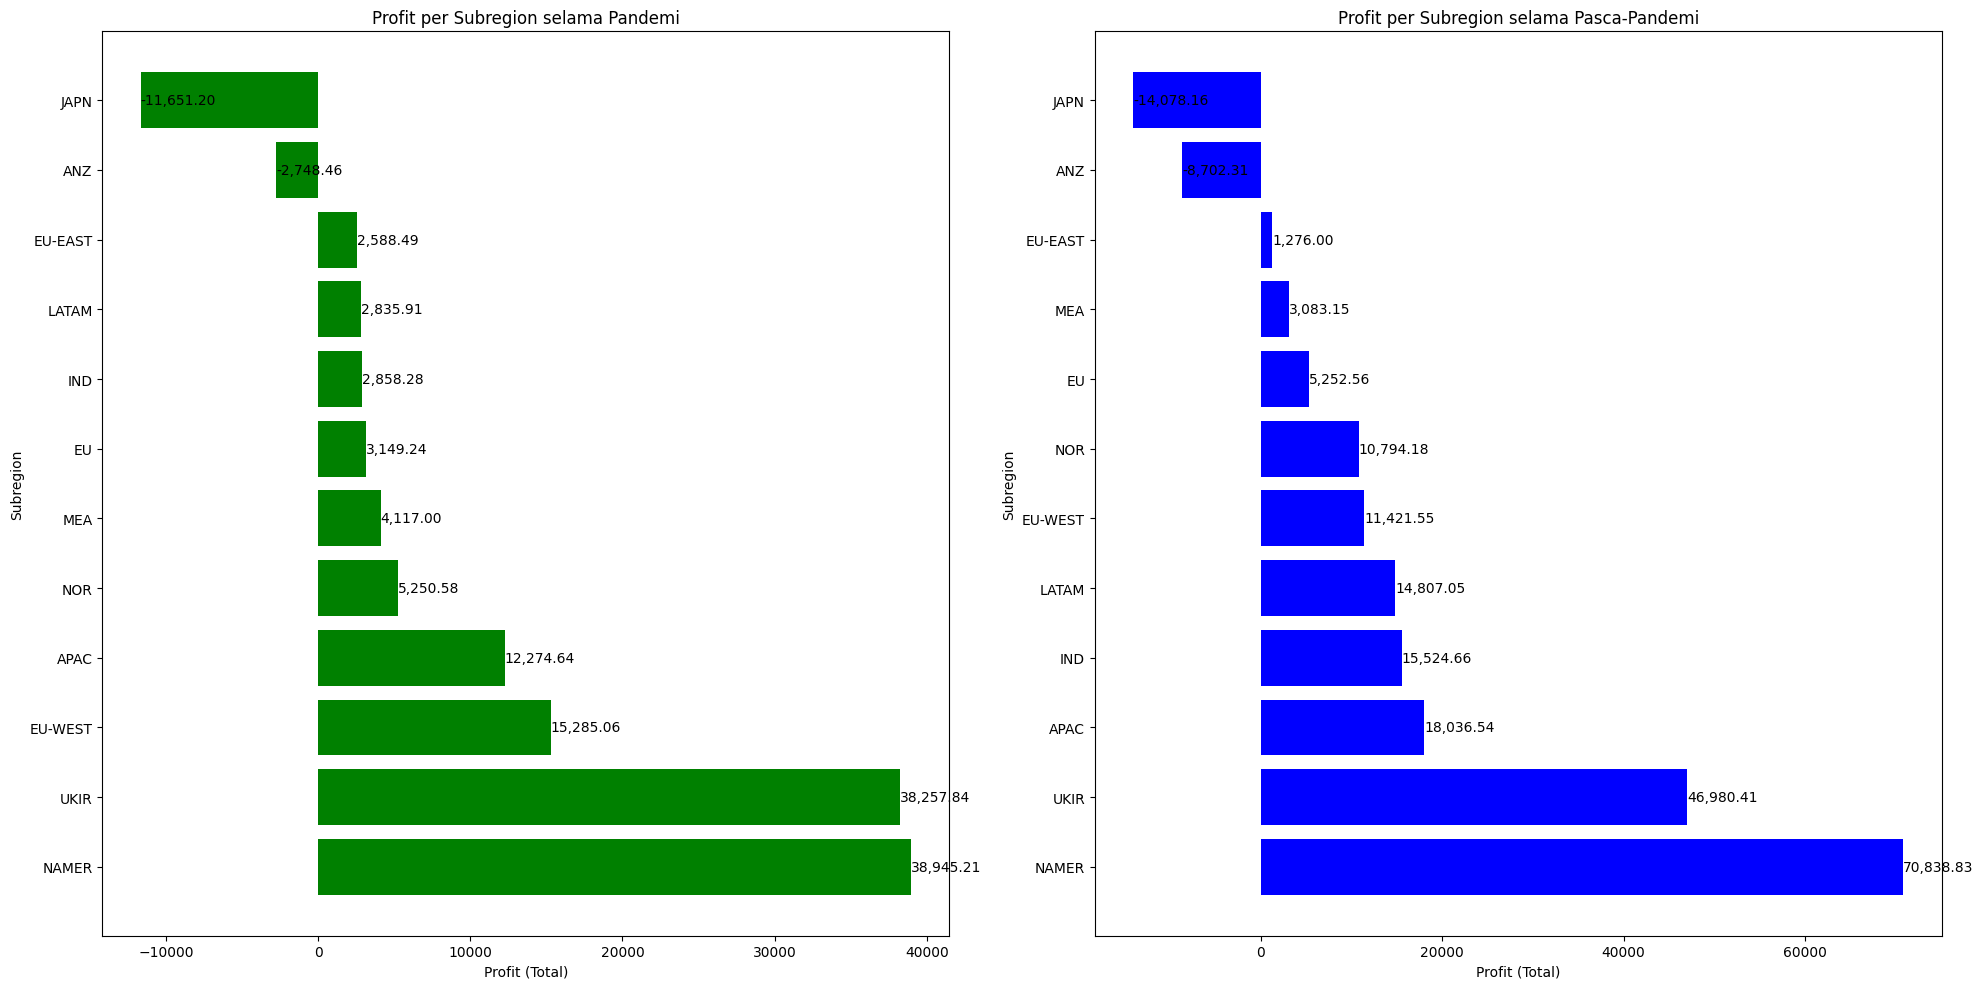

In [162]:
import pandas as pd
import matplotlib.pyplot as plt

# Menghitung total profit untuk setiap subregion selama periode pandemi
pandemic_df = df[df['Periode'] == 'Pandemi']
pandemic_profit = pandemic_df.groupby(["Region", "Subregion"])[["Profit"]].sum()

# Menyortir berdasarkan profit dalam urutan menurun
pandemic_profit = pandemic_profit.sort_values("Profit", ascending=False)

# Menghitung total profit untuk setiap subregion selama periode pasca-pandemi
post_pandemic_df = df[df['Periode'] == 'Pasca-Pandemi']
post_pandemic_profit = post_pandemic_df.groupby(["Region", "Subregion"])[["Profit"]].sum()

# Menyortir berdasarkan profit dalam urutan menurun
post_pandemic_profit = post_pandemic_profit.sort_values("Profit", ascending=False)

# Menampilkan hasil dalam bentuk dataframe
pandemic_profit_df = pandemic_profit.reset_index()
post_pandemic_profit_df = post_pandemic_profit.reset_index()

# Membuat subplot untuk periode pandemi dan pasca-pandemi
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# Barplot horizontal untuk periode pandemi
axes[0].barh(pandemic_profit_df['Subregion'], pandemic_profit_df['Profit'], color='green')
axes[0].set_xlabel('Profit (Total)')
axes[0].set_ylabel('Subregion')
axes[0].set_title('Profit per Subregion selama Pandemi')

# Menampilkan nilai profit di atas setiap bar
for index, value in enumerate(pandemic_profit_df['Profit']):
    axes[0].text(value, index, f'{value:,.2f}', ha='left', va='center', color='black')

# Barplot horizontal untuk periode pasca-pandemi
axes[1].barh(post_pandemic_profit_df['Subregion'], post_pandemic_profit_df['Profit'], color='blue')
axes[1].set_xlabel('Profit (Total)')
axes[1].set_ylabel('Subregion')
axes[1].set_title('Profit per Subregion selama Pasca-Pandemi')

# Menampilkan nilai profit di atas setiap bar
for index, value in enumerate(post_pandemic_profit_df['Profit']):
    axes[1].text(value, index, f'{value:,.2f}', ha='left', va='center', color='black')

plt.tight_layout()
plt.show()


Profit dan Persentase Profit Selama Pandemi:


,Region,Subregion,Profit,Profit_Percentage
0,AMER,NAMER,38945.21,93.212461
1,AMER,LATAM,2835.91,6.787539
2,APJ,APAC,12274.64,1673.981944
3,APJ,IND,2858.28,389.804435
4,APJ,ANZ,-2748.46,-374.827483
5,APJ,JAPN,-11651.20,-1588.958896
6,EMEA,UKIR,38257.84,55.730281
7,EMEA,EU-WEST,15285.06,22.265781
8,EMEA,NOR,5250.58,7.648532
9,EMEA,MEA,4117.00,5.997243



Profit dan Persentase Profit Selama Pasca-Pandemi:


,Region,Subregion,Profit,Profit_Percentage,Increase_Percentage
0,AMER,NAMER,70838.83,82.711311,81.89
1,AMER,LATAM,14807.05,17.288689,422.13
2,APJ,APAC,18036.54,167.303513,46.94
3,APJ,IND,15524.66,144.003792,443.15
4,APJ,ANZ,-8702.31,-80.720972,216.62
5,APJ,JAPN,-14078.16,-130.586333,20.83
6,EMEA,UKIR,46980.41,59.613871,22.80
7,EMEA,EU-WEST,11421.55,14.492909,-25.28
8,EMEA,NOR,10794.18,13.696834,105.58
9,EMEA,MEA,3083.15,3.912237,-25.11


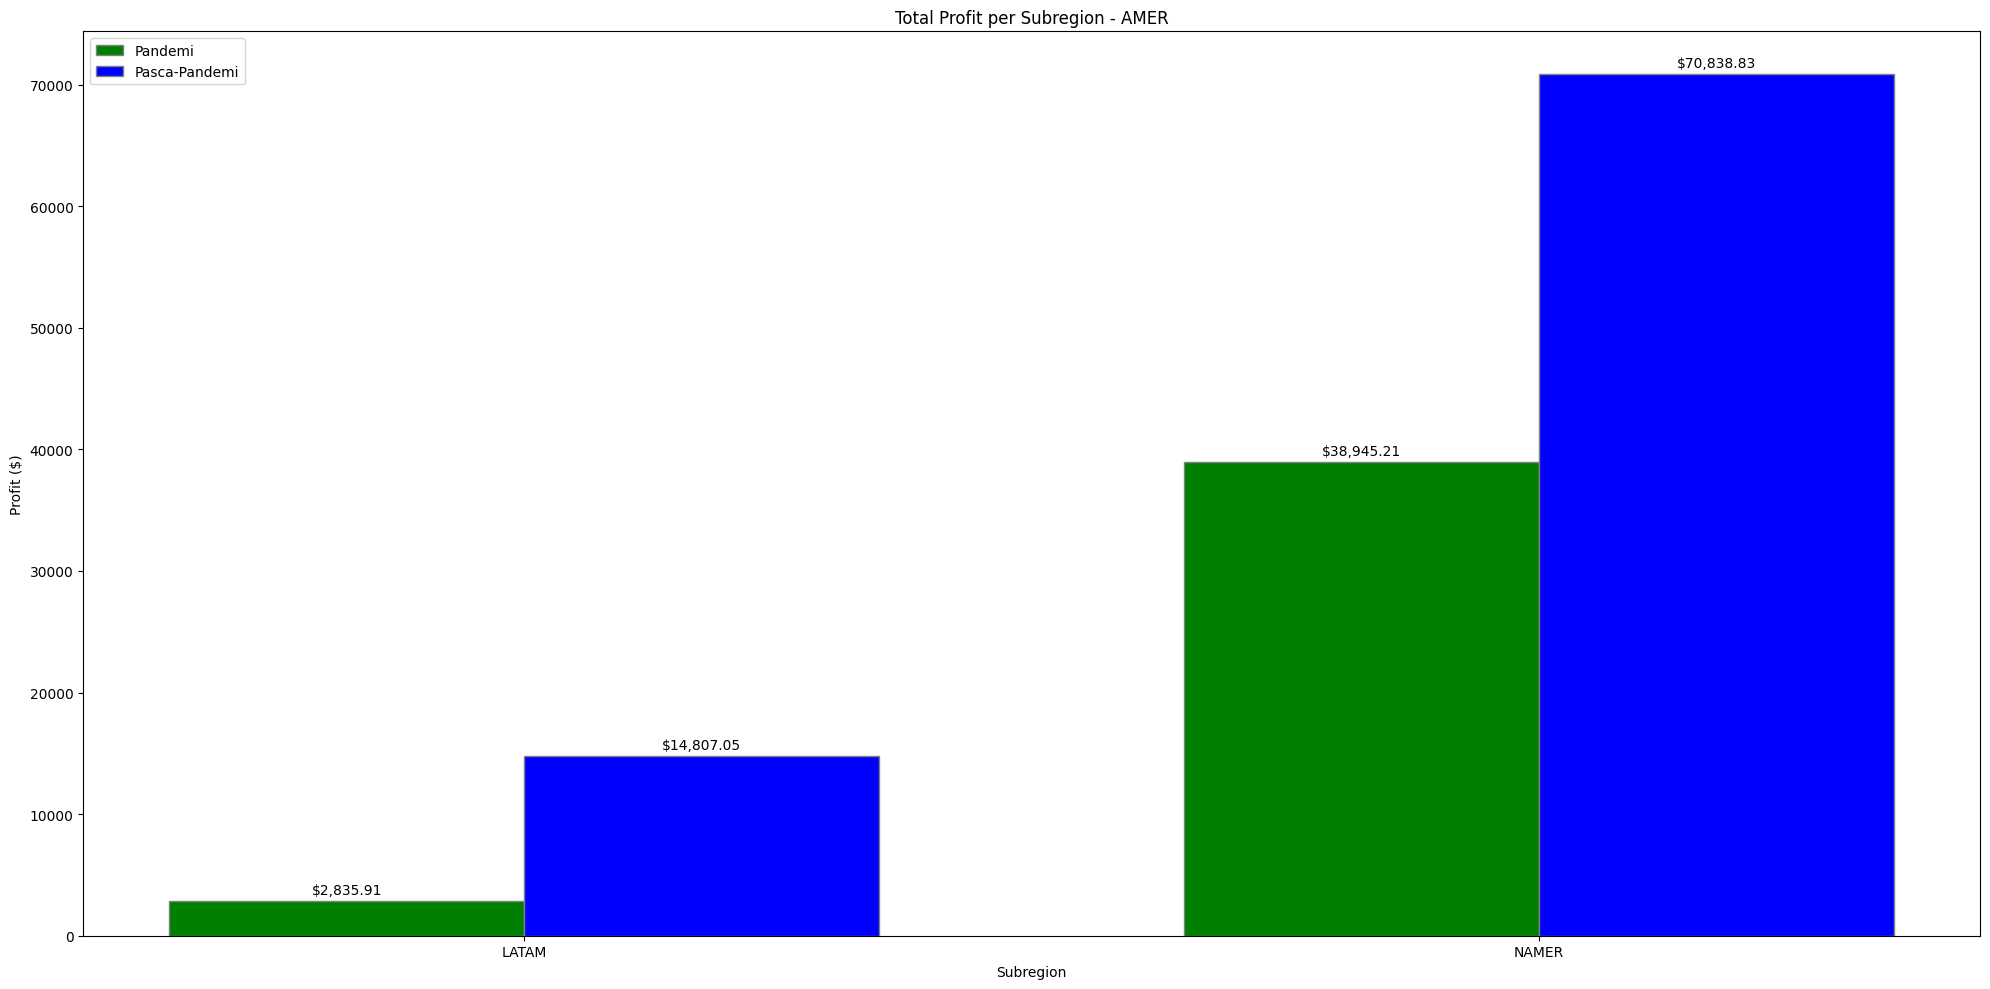

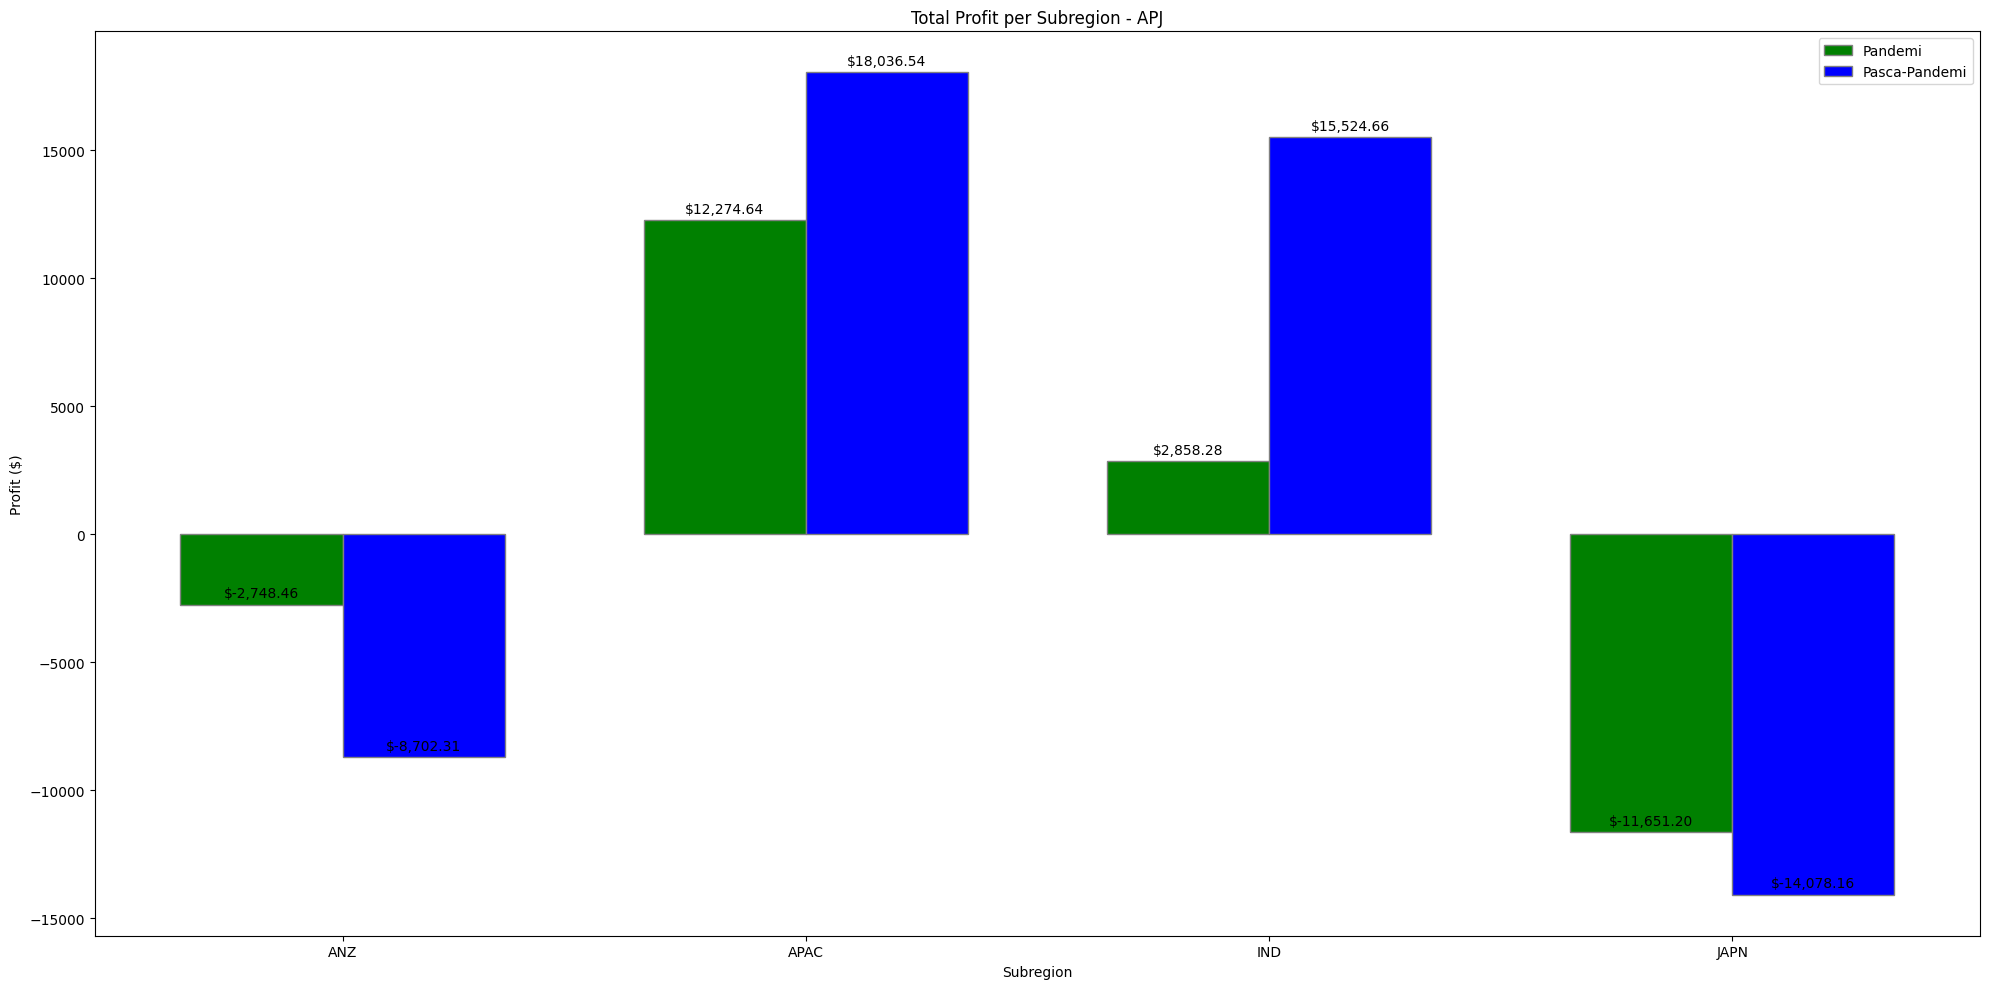

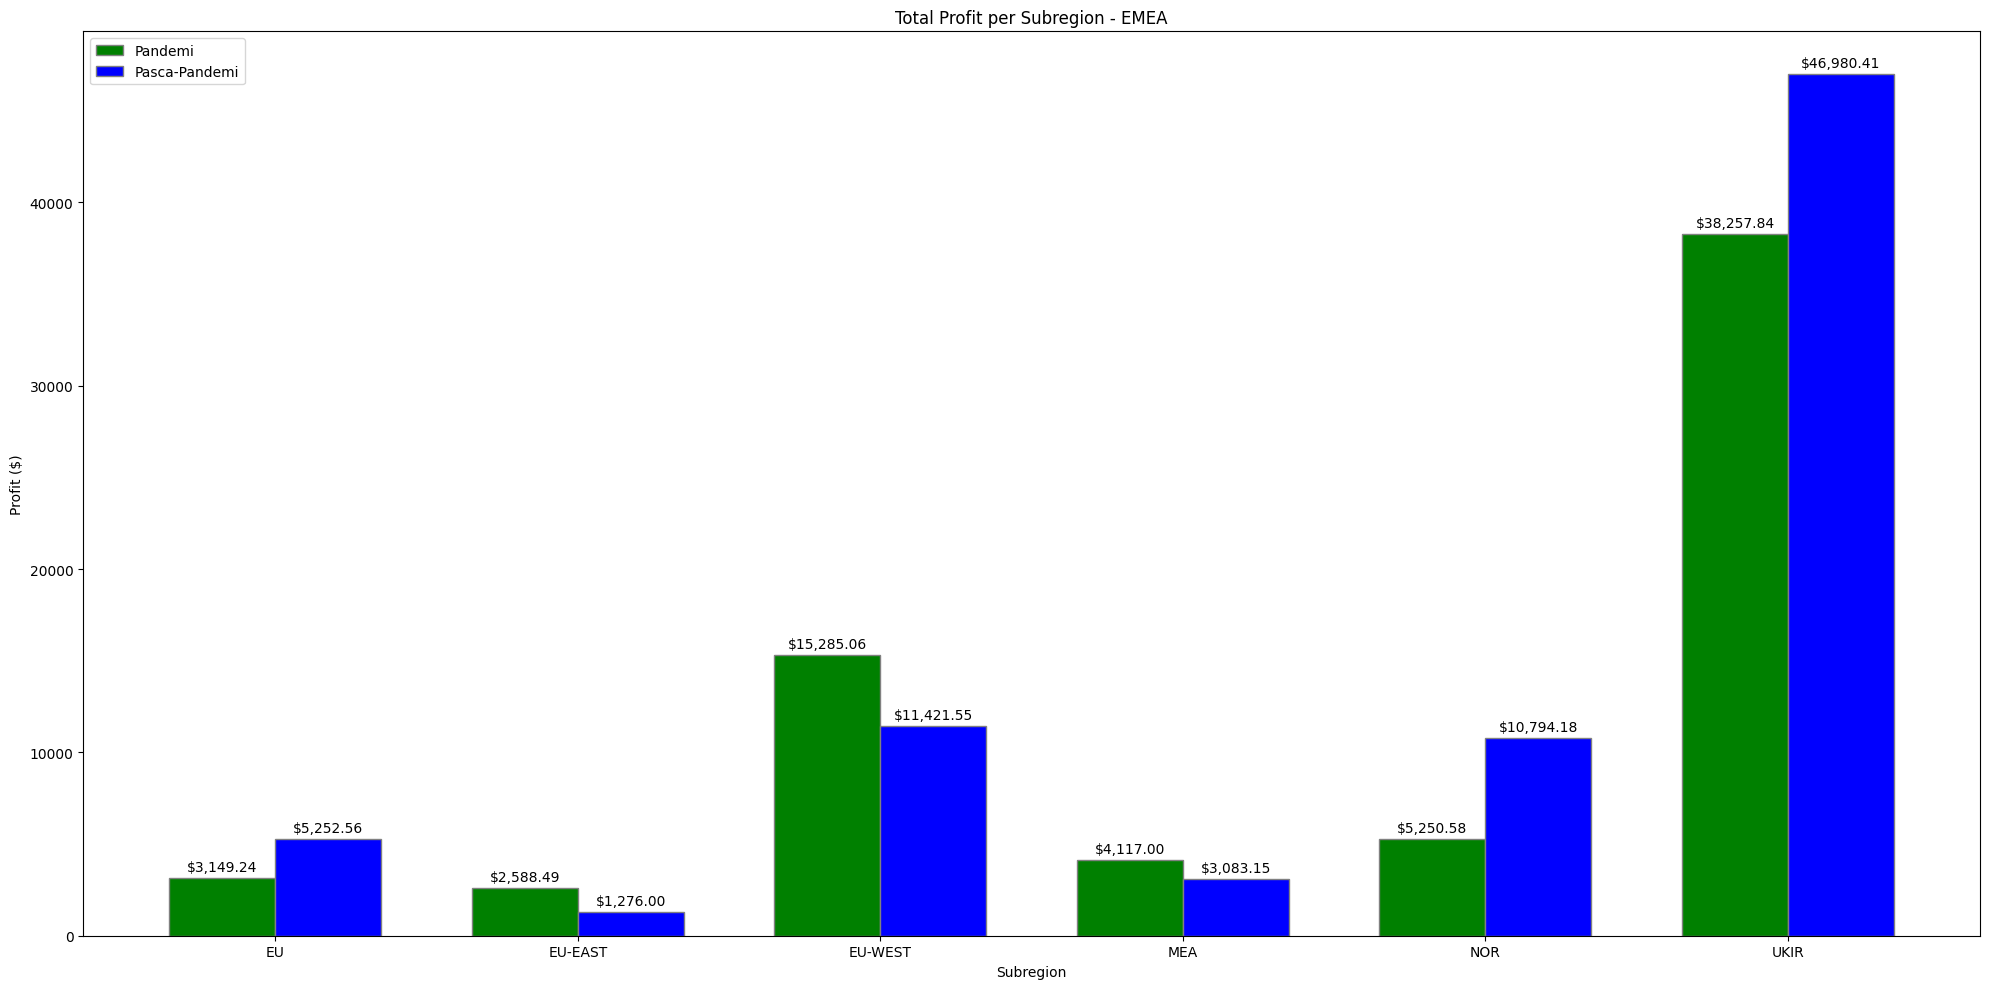

In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data provided
pandemic_data = {
    'Region': ['AMER', 'AMER', 'APJ', 'APJ', 'APJ', 'APJ', 'EMEA', 'EMEA', 'EMEA', 'EMEA', 'EMEA', 'EMEA'],
    'Subregion': ['NAMER', 'LATAM', 'APAC', 'IND', 'ANZ', 'JAPN', 'UKIR', 'EU-WEST', 'NOR', 'MEA', 'EU', 'EU-EAST'],
    'Profit': [38945.21, 2835.91, 12274.64, 2858.28, -2748.46, -11651.20, 38257.84, 15285.06, 5250.58, 4117.00, 3149.24, 2588.49],
    'Profit_Percentage': [35.03, 2.55, 11.04, 2.57, -2.47, -10.48, 34.42, 13.75, 4.72, 3.70, 2.83, 2.30]
}

post_pandemic_data = {
    'Region': ['AMER', 'AMER', 'APJ', 'APJ', 'APJ', 'APJ', 'EMEA', 'EMEA', 'EMEA', 'EMEA', 'EMEA', 'EMEA'],
    'Subregion': ['NAMER', 'LATAM', 'APAC', 'IND', 'ANZ', 'JAPN', 'UKIR', 'EU-WEST', 'NOR', 'MEA', 'EU', 'EU-EAST'],
    'Profit': [70838.83, 14807.05, 18036.54, 15524.66, -8702.31, -14078.16, 46980.41, 11421.55, 10794.18, 3083.15, 5252.56, 1276.00],
    'Profit_Percentage': [40.43, 8.45, 10.29, 8.86, -4.97, -8.03, 26.81, 6.52, 6.16, 1.76, 3.00, 0.73],
    'Increase_Percentage': [81.89, 422.13, 46.94, 443.15, 216.63, 20.83, 22.80, -25.28, 105.58, -25.11, 66.79, -50.70]
}

# Create DataFrames
pandemic_df = pd.DataFrame(pandemic_data)
post_pandemic_df = pd.DataFrame(post_pandemic_data)

# Function to calculate profit percentages relative to their total region profit
def calculate_region_percentages(df):
    region_totals = df.groupby('Region')['Profit'].sum().reset_index()
    region_totals.rename(columns={'Profit': 'Total_Profit'}, inplace=True)
    df = df.merge(region_totals, on='Region', how='left')
    df['Profit_Percentage'] = (df['Profit'] / df['Total_Profit']) * 100
    return df

# Calculate percentage for pandemic and post-pandemic dataframes
pandemic_df = calculate_region_percentages(pandemic_df)
post_pandemic_df = calculate_region_percentages(post_pandemic_df)

# Calculate increase percentage
increase_percentage = ((post_pandemic_df['Profit'] - pandemic_df['Profit']) / pandemic_df['Profit']) * 100
post_pandemic_df['Increase_Percentage'] = increase_percentage.round(2)

# Display dataframes
print("\nProfit dan Persentase Profit Selama Pandemi:")
display(pandemic_df[['Region', 'Subregion', 'Profit', 'Profit_Percentage']])
print("\nProfit dan Persentase Profit Selama Pasca-Pandemi:")
display(post_pandemic_df[['Region', 'Subregion', 'Profit', 'Profit_Percentage', 'Increase_Percentage']])

# Function to plot the bar charts for each region
def plot_region_bars(region):
    region_pandemic_df = pandemic_df[pandemic_df['Region'] == region]
    region_post_pandemic_df = post_pandemic_df[post_pandemic_df['Region'] == region]
    
    subregions = region_pandemic_df['Subregion'].tolist() + region_post_pandemic_df['Subregion'].tolist()
    subregions = sorted(set(subregions))
    
    pandemic_profits = region_pandemic_df.set_index('Subregion').reindex(subregions)['Profit'].fillna(0)
    post_pandemic_profits = region_post_pandemic_df.set_index('Subregion').reindex(subregions)['Profit'].fillna(0)
    
    bar_width = 0.35
    r1 = np.arange(len(subregions))
    r2 = [x + bar_width for x in r1]

    fig, ax = plt.subplots(figsize=(20, 10))

    ax.bar(r1, pandemic_profits, color='green', width=bar_width, edgecolor='grey', label='Pandemi')
    ax.bar(r2, post_pandemic_profits, color='blue', width=bar_width, edgecolor='grey', label='Pasca-Pandemi')

    ax.set_xlabel('Subregion')
    ax.set_ylabel('Profit ($)')
    ax.set_title(f'Total Profit per Subregion - {region}')
    ax.set_xticks([r + bar_width / 2 for r in range(len(r1))])
    ax.set_xticklabels(subregions)
    ax.legend()

    for bar in ax.patches:
        height = bar.get_height()
        if height != 0:
            ax.annotate(f'${height:,.2f}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

# Plot for each region
regions = ['AMER', 'APJ', 'EMEA']
for region in regions:
    plot_region_bars(region)


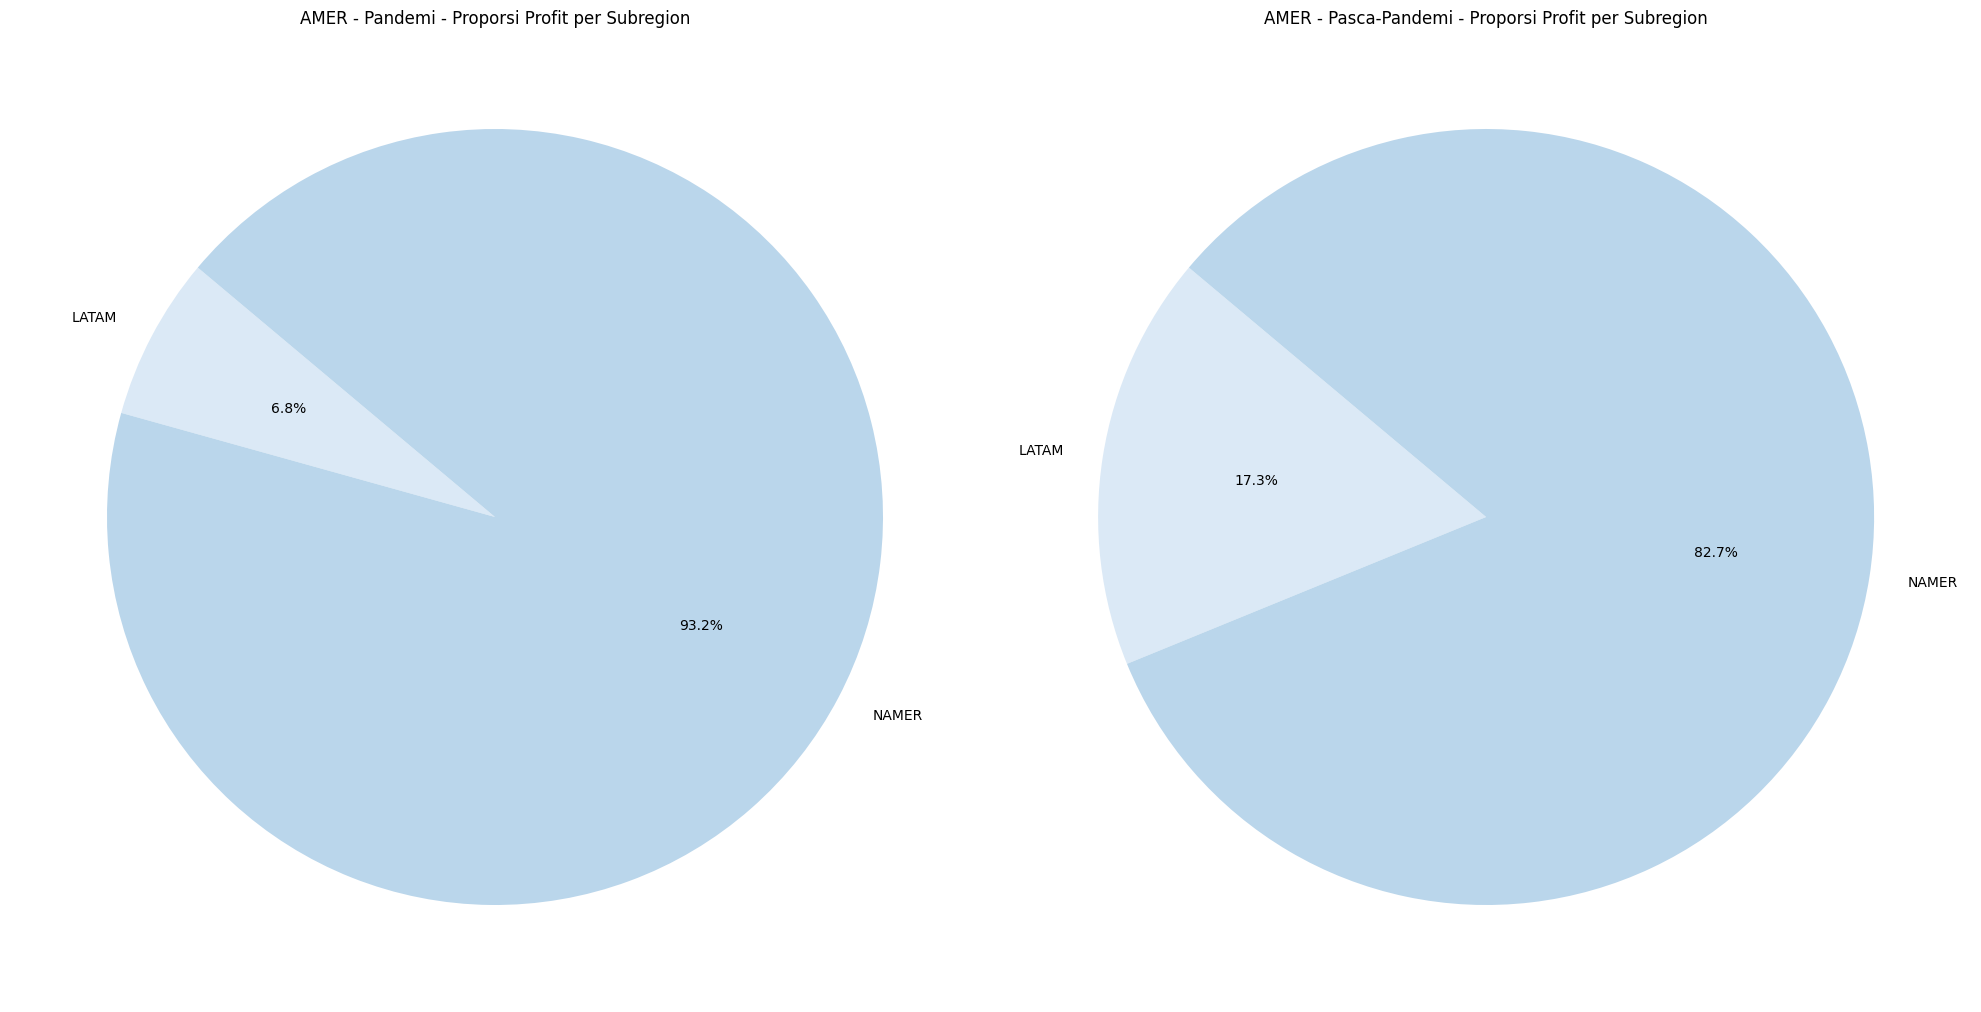

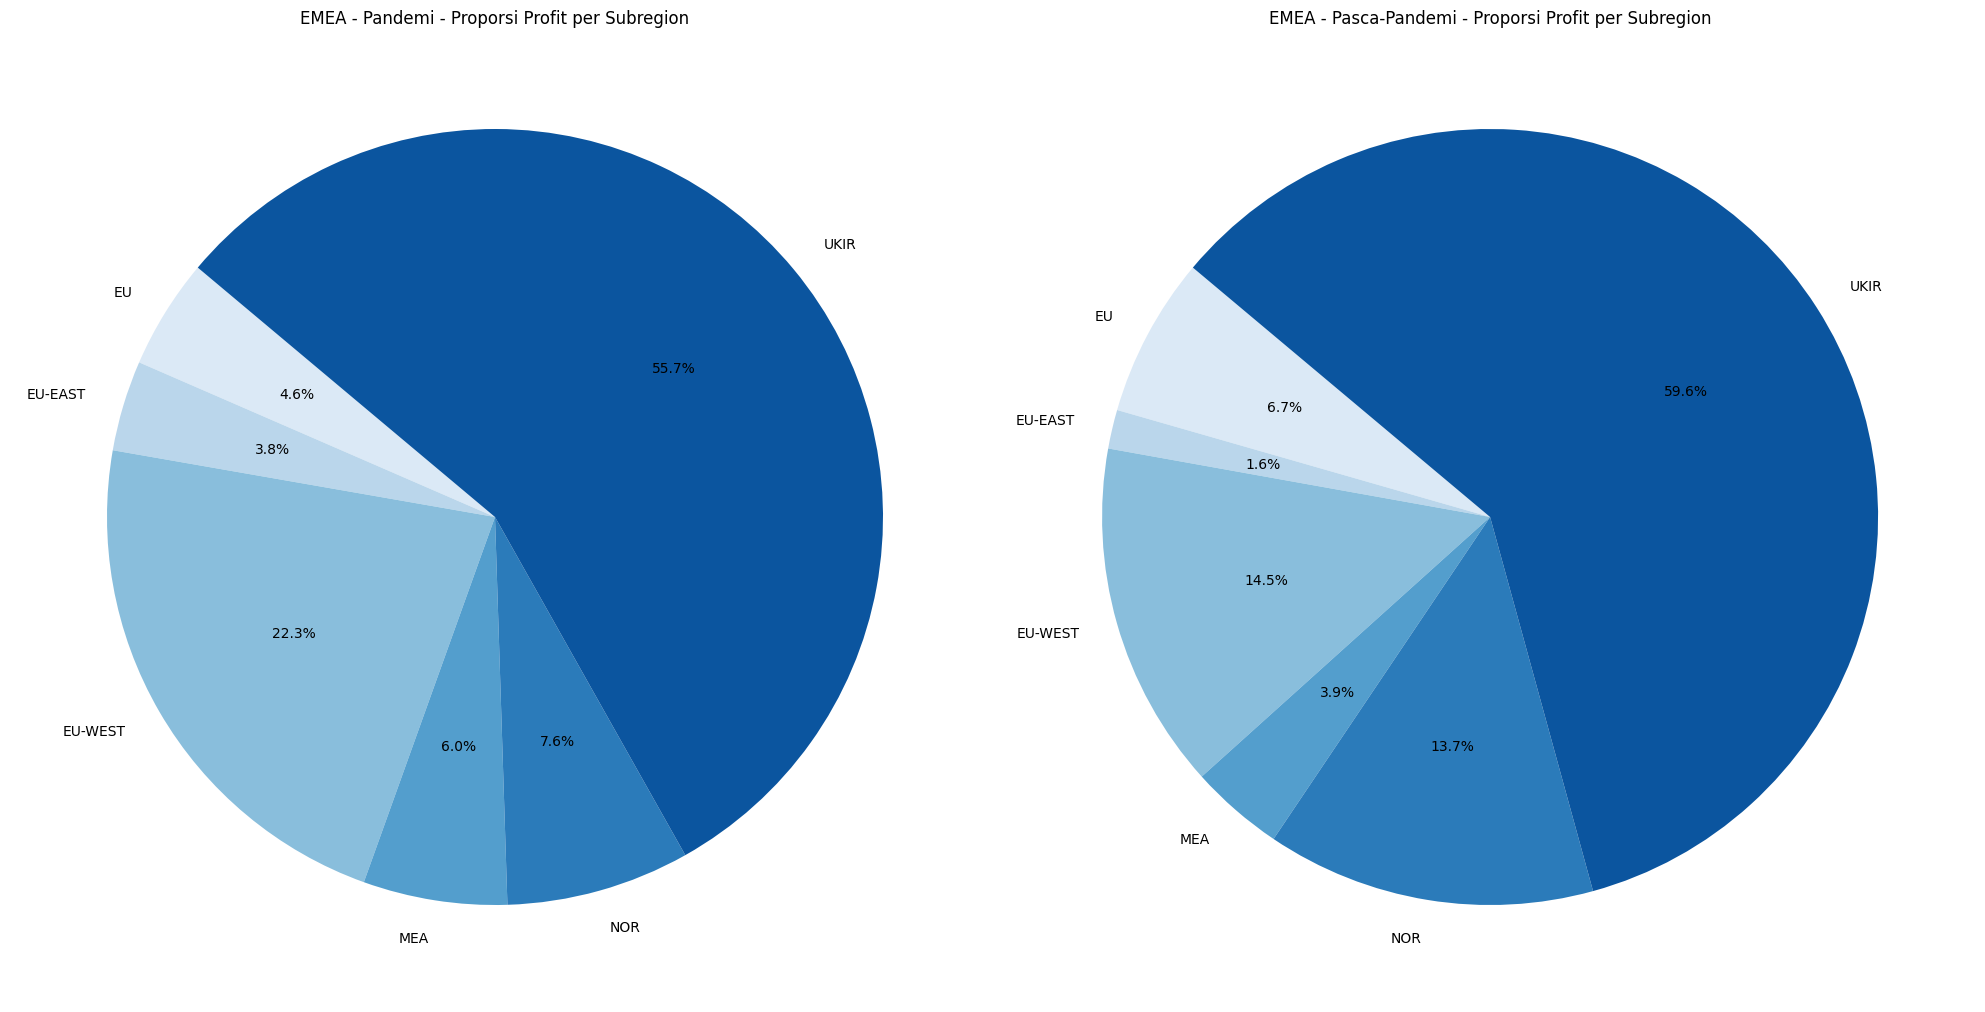

In [169]:
# Data provided
pandemic_data = {
    'Region': ['AMER', 'AMER', 'APJ', 'APJ', 'APJ', 'APJ', 'EMEA', 'EMEA', 'EMEA', 'EMEA', 'EMEA', 'EMEA'],
    'Subregion': ['NAMER', 'LATAM', 'APAC', 'IND', 'ANZ', 'JAPN', 'UKIR', 'EU-WEST', 'NOR', 'MEA', 'EU', 'EU-EAST'],
    'Profit': [38945.21, 2835.91, 12274.64, 2858.28, -2748.46, -11651.20, 38257.84, 15285.06, 5250.58, 4117.00, 3149.24, 2588.49],
}

post_pandemic_data = {
    'Region': ['AMER', 'AMER', 'APJ', 'APJ', 'APJ', 'APJ', 'EMEA', 'EMEA', 'EMEA', 'EMEA', 'EMEA', 'EMEA'],
    'Subregion': ['NAMER', 'LATAM', 'APAC', 'IND', 'ANZ', 'JAPN', 'UKIR', 'EU-WEST', 'NOR', 'MEA', 'EU', 'EU-EAST'],
    'Profit': [70838.83, 14807.05, 18036.54, 15524.66, -8702.31, -14078.16, 46980.41, 11421.55, 10794.18, 3083.15, 5252.56, 1276.00],
}

# Create DataFrames
pandemic_df = pd.DataFrame(pandemic_data)
post_pandemic_df = pd.DataFrame(post_pandemic_data)

# Function to plot pie charts for each region except APJ
def plot_region_pies(region):
    region_pandemic_df = pandemic_df[pandemic_df['Region'] == region]
    region_post_pandemic_df = post_pandemic_df[post_pandemic_df['Region'] == region]
    
    subregions = region_pandemic_df['Subregion'].tolist() + region_post_pandemic_df['Subregion'].tolist()
    subregions = sorted(set(subregions))
    
    pandemic_profits = region_pandemic_df.set_index('Subregion').reindex(subregions)['Profit'].fillna(0)
    post_pandemic_profits = region_post_pandemic_df.set_index('Subregion').reindex(subregions)['Profit'].fillna(0)
    
    # Mengubah nilai negatif menjadi nol untuk pie chart
    pandemic_profits_positive = pandemic_profits.apply(lambda x: max(x, 0))
    post_pandemic_profits_positive = post_pandemic_profits.apply(lambda x: max(x, 0))

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

    # Pie chart for pandemic period
    total_pandemic_profit = pandemic_profits_positive.sum()
    pandemic_proportion = pandemic_profits_positive / total_pandemic_profit

    axes[0].pie(pandemic_proportion, labels=subregions, autopct='%1.1f%%', startangle=140)
    axes[0].set_title(f'{region} - Pandemi - Proporsi Profit per Subregion')

    # Pie chart for post-pandemic period
    total_post_pandemic_profit = post_pandemic_profits_positive.sum()
    post_pandemic_proportion = post_pandemic_profits_positive / total_post_pandemic_profit

    axes[1].pie(post_pandemic_proportion, labels=subregions, autopct='%1.1f%%', startangle=140)
    axes[1].set_title(f'{region} - Pasca-Pandemi - Proporsi Profit per Subregion')

    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
    plt.tight_layout()
    plt.show()

regions = ['AMER', 'EMEA']
for region in regions:
    plot_region_pies(region)


# Rekomendasi

etelah dilakukan analisis, terlihat bahwa tren profit perusahaan mengalami kenaikan setiap tahunnya. Terdapat perbedaan signifikan dalam profitabilitas antara periode pandemi COVID-19 (2020-2021) dan pasca-pandemi (2022-2023). Selama periode pandemi, profitabilitas perusahaan lebih rendah dibandingkan dengan periode pasca-pandemi. Profit pada periode pasca-pandemi menunjukkan peningkatan signifikan sebesar 57,64% dibandingkan dengan periode pandemi dan sebelum pandemi. Selain itu, terdapat perubahan pola pembelian yang jelas antara periode pandemi dan pasca-pandemi. Berikut merupakan pola pembelian yang ditemukan serta strategi yang dapat digunakan untuk memaksimalkan profit dari pola tersebut.

# Rekomendasi Strategi Berdasarkan Pola yang Ditemukan

## 1. **Pola Industri**
### Pola yang Ada:
- Industri keuangan (finance), produk konsumen (consumer products), ritel (retail), dan teknologi (tech) menunjukkan peningkatan profit yang sangat signifikan selama periode pasca-pandemi. Khususnya, sektor produk konsumen mengalami lonjakan yang luar biasa dalam profit. Meskipun industri energi (energy) juga mencatat pertumbuhan, tingkat pertumbuhannya tidak sebaik sektor-sektor lain. Akibatnya, industri energi tidak lagi menempati posisi teratas sebagai penghasil profit terbesar, terlewati oleh sektor-sektor yang mengalami pertumbuhan lebih tinggi.
- Setelah pandemi, industri komunikasi (communications) menjadi satu-satunya sektor yang mengalami penurunan profit, dengan penurunan sebesar -2.99%.
- produk konsumen (consumer products) tidak hanya menunjukkan peningkatan proporsi profit, tetapi juga menunjukkan peningkatan signifikan dalam total profit dan laju pertumbuhan profit.Bahkan Consumer Product menjadi industri yang paling banyak menghasilkan profit. Dengan kata lain, sektor produk konsumen menunjukkan potensi profitabilitas yang sangat tinggi. Oleh karena itu, sektor ini menjadi perhatian utama karena dapat memberikan kontribusi besar terhadap keseluruhan profit perusahaan pada masa yang akan datang.

### Strategi yang Dapat Digunakan:
- Strategi Utama: Mengingat sektor produk konsumen (consumer products) menjadi penghasil profit tertinggi baik dari segi nominal maupun proporsi, fokus utama perusahaan harus diarahkan pada industri ini. Langkah-langkah strategis meliputi inovasi produk yang menarik konsumen, ekspansi ke pasar-pasar baru yang belum tersentuh, serta peningkatan efisiensi produksi dan distribusi. Perusahaan juga perlu menginvestasikan sumber daya untuk memperkuat merek dan meningkatkan loyalitas pelanggan.
- Strategi Kedua: Selain sektor consumer products, perusahaan juga harus fokus pada sektor-sektor yang telah menunjukkan peningkatan signifikan selama pasca-pandemi, yaitu keuangan (finance), ritel (retail), dan teknologi (tech). Untuk sektor keuangan, penting untuk terus mengadopsi teknologi terbaru seperti kecerdasan buatan dan analitik data untuk meningkatkan efisiensi operasional. Di sektor ritel, optimasi rantai pasok dan strategi pemasaran yang efektif dapat meningkatkan margin profit dan memastikan ketersediaan produk. Sedangkan di sektor teknologi, fokus pada inovasi dan pengembangan produk baru yang relevan dengan kebutuhan pasar sangat penting untuk mempertahankan pertumbuhan profit.
- Strategi Ketiga: Perusahaan perlu melakukan evaluasi ulang terhadap strategi di sektor energi dan komunikasi. Untuk sektor energi, penting untuk menganalisis mengapa pertumbuhannya tidak sebesar industri lain. Diversifikasi sumber energi dan investasi dalam energi terbarukan bisa menjadi langkah strategis untuk meningkatkan profitabilitas. Sementara itu, sektor komunikasi yang mengalami penurunan profit membutuhkan strategi untuk mengidentifikasi penyebab penurunan dan langkah-langkah untuk mengurangi biaya operasional tanpa mengorbankan kualitas layanan.
---

## 2. **Pola Segment**
### Pola yang Ada:
- Kenaikan di Segmen Strategic: Segmen Strategic tidak hanya mencatat peningkatan signifikan dalam total profit, tetapi juga berhasil meningkatkan persentase profitnya. Peningkatan yang konsisten ini menunjukkan bahwa perusahaan telah berhasil mengimplementasikan strategi yang efektif untuk memaksimalkan profit dan meminimalkan biaya operasional di segmen Strategic.
- Pertumbuhan Sehat di Semua Segmen: Semua segmen menunjukkan peningkatan yang sehat dalam hal profit selama periode pasca-pandemi, dengan peningkatan profit berkisar antara 45% hingga 70%. Peningkatan ini mencerminkan strategi dan operasional perusahaan yang efektif dalam menghadapi tantangan selama periode tersebut. Kenaikan profit di semua segmen menunjukkan bahwa perusahaan berhasil mengoptimalkan sumber daya dan menangkap peluang pasar dengan baik.

### Strategi yang Dapat Digunakan:
- Strategi Utama: Perusahaan perlu melakukan review ulang strategi secara menyeluruh untuk segmen Strategic, karena kita tahu bahwa segmen ini mencatat peningkatan profit yang paling tinggi secara persentase, serta peningkatan proporsi profit dari total profit perusahaan. Fokus utama haruslah memperkuat strategi yang berkontribusi pada peningkatan ini, serta mencari peluang tambahan untuk lebih memaksimalkan pertumbuhan di segmen ini
- Strategi Kedua: Setelah segmen Strategic, perusahaan juga harus fokus pada segmen lain yang telah menunjukkan peningkatan signifikan selama pasca-pandemi, yaitu segmen SMB dan Enterprise. Untuk segmen SMB, penting untuk mengoptimalkan strategi pemasaran dan meningkatkan engagement pelanggan. Sedangkan untuk segmen Enterprise, fokus pada inovasi produk dan pengembangan layanan yang dapat meningkatkan efisiensi dan produktivitas pelanggan enterprise sangat penting.
- Strategi Ketiga: Terakhir, perusahaan perlu melakukan review ulang strategi secara general untuk semua segmen, karena secara keseluruhan, semua segmen menunjukkan hasil yang bagus selama pasca-pandemi. Review ini akan membantu perusahaan dalam mengidentifikasi dan memperbaiki area yang masih memerlukan peningkatan, serta memastikan bahwa semua segmen tetap dalam jalur pertumbuhan yang berkelanjutan.

---

## 3. **Pola Produk**
### Pola yang Ada:
- Produk Big Ol Database mengalami penurunan profit yang sangat signifikan. Penurunan profit sebesar 98.86% menunjukkan adanya tantangan besar dalam menjaga performa produk ini selama periode pasca-pandemi.
- Marketing Suite masih menghasilkan profit negatif,namun terdapat perbaikan yang signifikan dalam nominal profit. Profit negatif telah berkurang secara substansial selama periode pasca-pandemi, menunjukkan langkah-langkah perbaikan yang telah diambil mulai membuahkan hasil.
- Produk Alchemy mencatat peningkatan profit yang sangat pesat, baik dari segi nominal maupun persentase profit. Peningkatan profit sebesar 233.05% selama pasca-pandemi menunjukkan kinerja yang luar biasa dan pertumbuhan yang luar biasa pada produk ini.
- Produk One View mengalami peningkatan profit yang signifikan sebesar 164.85% selama pasca-pandemi. Peningkatan ini menunjukkan bahwa produk ini mampu memberikan kontribusi besar terhadap keseluruhan profit perusahaan.
- Site Analytics dan FinanceHub: Kedua produk ini menunjukkan profit yang stagnan selama pasca-pandemi. Meskipun nominal profit tetap stabil, persentase profit sedikit mengalami penurunan, menunjukkan adanya kestabilan dalam kinerja finansial, meskipun ada ruang untuk perbaikan.
-Data Smasher dan Support: Kedua produk ini mengalami peningkatan profit yang sehat selama periode pasca-pandemi, dengan kenaikan profit berkisar antara 45% hingga 50%. Peningkatan ini mencerminkan strategi dan operasional yang efektif dalam meningkatkan kinerja produk ini.

### Strategi yang Dapat Digunakan:
- Strategi Utama: Lakukan review mendalam terhadap strategi produk Alchemy. Temukan faktor-faktor yang menyebabkan Alchemy mencatat peningkatan profit yang luar biasa sebesar 233.05%. Pelajari strategi pemasaran, inovasi produk, serta proses operasional yang diterapkan. Setelah temuan ini diidentifikasi, terapkan praktik-praktik serupa ke produk lain untuk meningkatkan performa mereka.

- Perbaikan untuk Big Ol Database: Berdasarkan penurunan profit yang signifikan (98.86%), penting untuk menganalisis penyebab ketidakberhasilan Big Ol Database. Cari tahu apakah penurunan ini disebabkan oleh penurunan permintaan pasar, peningkatan biaya, atau masalah operasional lainnya. Setelah penyebab utama diidentifikasi, fokuskan pada strategi yang dapat mengembalikan profit produk ini. Ini bisa melibatkan inovasi produk, peningkatan kualitas layanan, atau strategi pemasaran yang lebih efektif.

- Evaluasi untuk Data Smasher dan Support: Mengingat kedua produk ini mengalami peningkatan profit yang sehat (45-50%), penting untuk memahami faktor yang mendorong pertumbuhan ini. Evaluasi strategi pemasaran, keefektifan tim penjualan, inovasi produk, serta umpan balik pelanggan. Jika temuan menunjukkan strategi yang berhasil, dokumentasikan dan terapkan pada produk lain untuk meningkatkan kinerja mereka.

- Analisis Site Analytics dan FinanceHub: Kedua produk ini menunjukkan profit yang stagnan. Lakukan analisis mendalam untuk memahami alasan di balik stabilitas ini. Tinjau ulang proses operasional, kualitas produk, dan strategi pemasaran. Jika ditemukan area yang memerlukan perbaikan, lakukan tindakan yang diperlukan untuk meningkatkan profit produk-produk ini. Stabilitas dapat menjadi tanda positif, namun ada ruang untuk meningkatkan efisiensi dan inovasi sehingga produk dapat tumbuh lebih lanjut.
---

## 4. **Pola Region/Subregion**
### Pola yang Ada:
- Region EMEA mencatat peningkatan profit nominal terendah dibandingkan dengan region lainnya. Hal ini menempatkan region AMER sebagai pemegang profit tertinggi dengan total profit sebesar \$85,645.88 dan persentase profit tertinggi sebesar 48.88%. Region EMEA menjadi region yang memiliki persentase pertambahan profit yang berbeda sendiri dimana kedua region lainnya mengalami peningkata profit sebanyak lebih dari 40% EMEA hanya bertambah sebesar 15%

- region APJ menunjukkan pemulihan yang paling kuat dibandingkan dengan semua region. Profit region APJ melonjak sebesar 1370%, dari \$733.26 selama pandemi menjadi \$10,780.73 setelah pandemi. Namun, meskipun peningkatan ini sangat signifikan, total profit region APJ masih cukup kecil dibandingkan dengan region lain. Ini mengindikasikan bahwa meskipun APJ pulih dengan cepat, masih ada potensi besar yang belum tergarap untuk mencapai tingkat profit yang setara dengan region lainnya.

Region AMER:
- Subregion LATAM menunjukkan persentase kenaikan profit yang lebih tinggi dibandingkan dengan NAMER. Namun, subregion NAMER tetap menjadi penghasil profit tertinggi untuk region AMER. Baik selama pandemi maupun setelah pandemi, mayoritas profit di region AMER berasal dari subregion NAMER.

Region EMEA:
- Subregion MEA, EU-WEST, dan EU-EAST mengalami penurunan profit selama pasca-pandemi. Meskipun demikian, subregion NOR menunjukkan persentase kenaikan profit tertinggi di seluruh EMEA.
- Meskipun EU-WEST mengalami penurunan profit, subregion ini tetap menjadi penghasil profit kedua terbesar di EMEA. 
- Penghasil profit terbesar di EMEA adalah subregion UKIR, yang stabil dan tetap menjadi penghasil profit terbesar dengan adanya peningkatan profit yang signifikan setelah pandemi.

Region APJ:
- Subregion JAPN dan ANZ tetap konsisten mengalami profit negatif, baik selama maupun setelah pandemi. Bahkan, profit di kedua subregion ini terus menurun selama periode pasca-pandemi.
- Subregion IND menunjukkan peningkatan profit yang signifikan dan sekarang hampir menyamai subregion APAC. Meskipun subregion APAC juga mengalami kenaikan profit sebesar 49%.
### Strategi yang Dapat Digunakan:

Region AMER:
- subregion NAMER tetap menjadi penghasil profit tertinggi untuk region AMER, penting untuk mempertahankan dan meningkatkan kontribusi profit dari subregion ini. Fokus utama adalah peningkatan kualitas layanan, inovasi produk, dan efektivitas operasional.
- persentase kenaikan profit di subregion LATAM lebih tinggi dibandingkan dengan NAMER, fokus pada peningkatan penetrasi pasar dan diversifikasi produk serta layanan.

Region EMEA:
- Subregion UKIR merupakan penghasil profit terbesar di EMEA dengan stabilitas dan peningkatan profit yang signifikan setelah pandemi. Fokus utama adalah mempertahankan kestabilan dan meningkatkan kontribusi profit dari subregion ini.
- Perbaikan stategi untuk Subregion MEA, EU-WEST, dan EU-EAST: Subregion MEA, EU-WEST, dan EU-EAST mengalami penurunan profit selama pasca-pandemi. Oleh karena itu, perlu dilakukan analisis mendalam untuk memahami penyebab penurunan ini dan mengimplementasikan langkah perbaikan yang diperlukan apalagi untuk EU-WEST.

Region APJ:
- Subregion IND menunjukkan peningkatan profit yang signifikan dan sekarang hampir menyamai subregion APAC. Fokus utama adalah mempertahankan momentum pertumbuhan dan lebih lanjut meningkatkan kontribusi profit dari subregion ini.
- Mengingat subregion JAPN dan ANZ konsisten mengalami profit negatif, perlu dilakukan analisis mendalam untuk memahami penyebab penurunan ini dan mengimplementasikan langkah perbaikan yang diperlukan.
---





In [151]:
# Save DataFrame to CSV file
df.to_csv('Saas-Sales-Final.csv', index=False)
